In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 5
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('warehouse_data.csv')
df = df.dropna()

In [3]:
df=df.rename(columns={"Sum of Order_Demand": "Order_Demand"})

df['Date'] = df['Date'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], format='%m%Y')
#df["Date"]=pd.to_datetime(df["Date"])

df["Date"] = df["Date"].dt.strftime('%Y%m')

df['Order_Demand']=df['Order_Demand'].astype(int)
df["md_Date"] = df["Date"]

df.sort_values(by=['Order_Demand'], inplace=True, ascending=True)


df

Product_Category    Date Customer_Region  Order_Demand md_Date
4300     Category_027  201605            east             0  201605
2040     Category_012  201407            east             1  201407
2258     Category_014  201504           south             1  201504
275      Category_003  201201           north             1  201201
2704     Category_018  201112           north             1  201112
...               ...     ...             ...           ...     ...
2845     Category_019  201310           north      53225242  201310
2878     Category_019  201611           north      54002579  201611
2956     Category_019  201403           north      54114693  201403
2849     Category_019  201410           north      54868633  201410
3041     Category_019  201507           north      60530514  201507

[5082 rows x 5 columns]

east


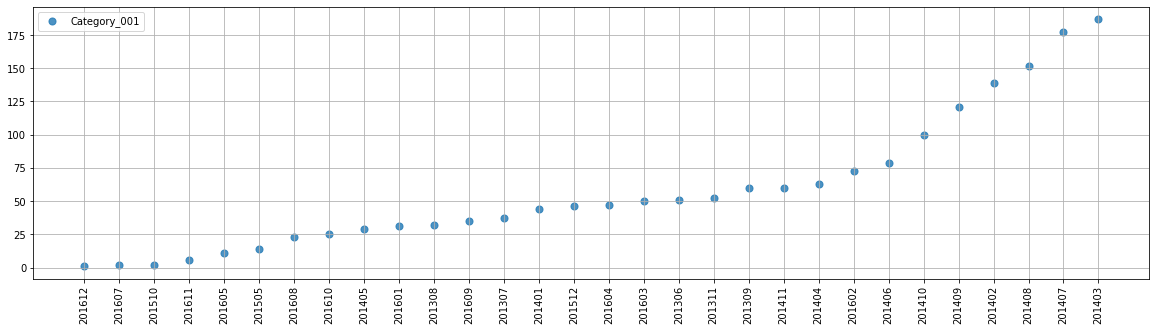

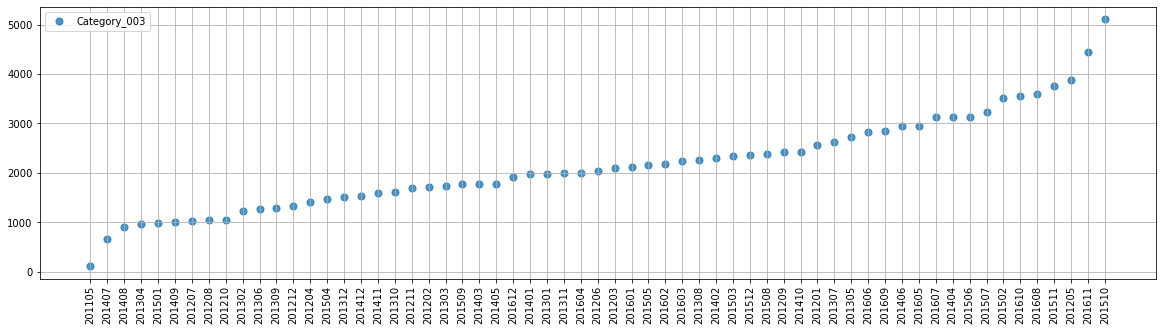

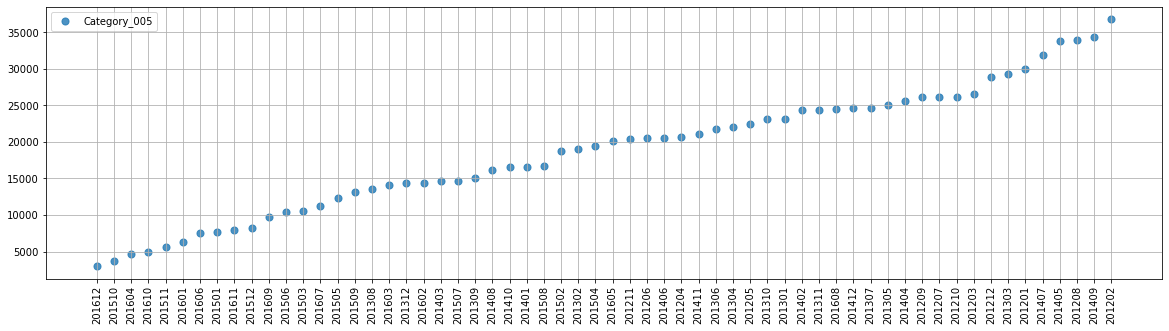

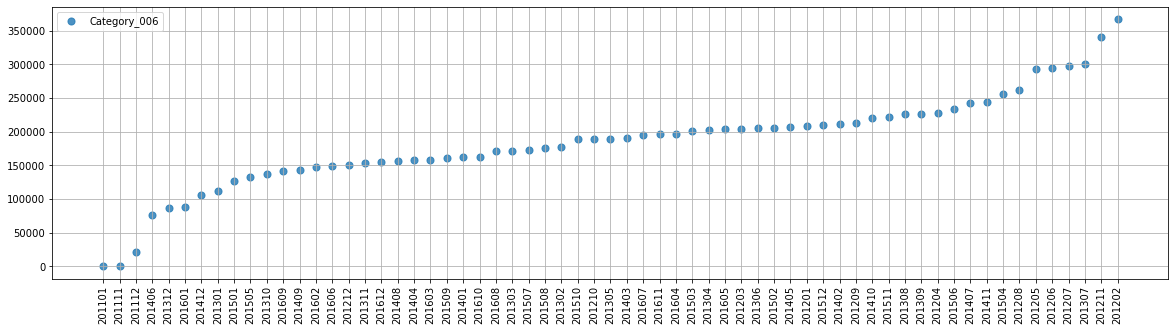

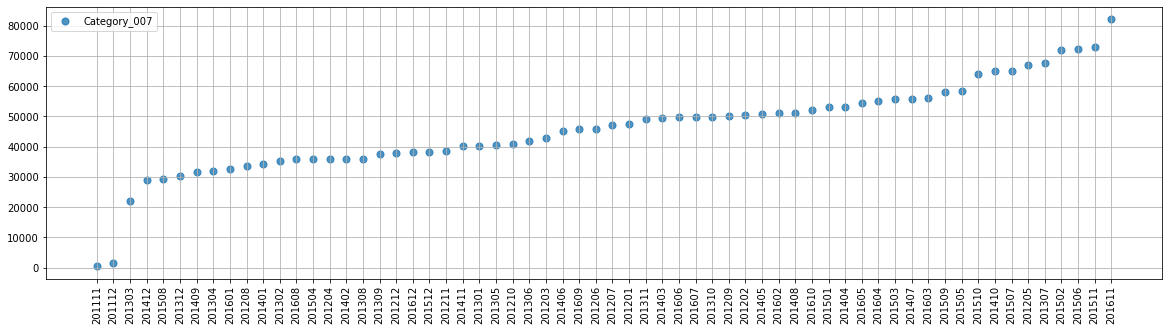

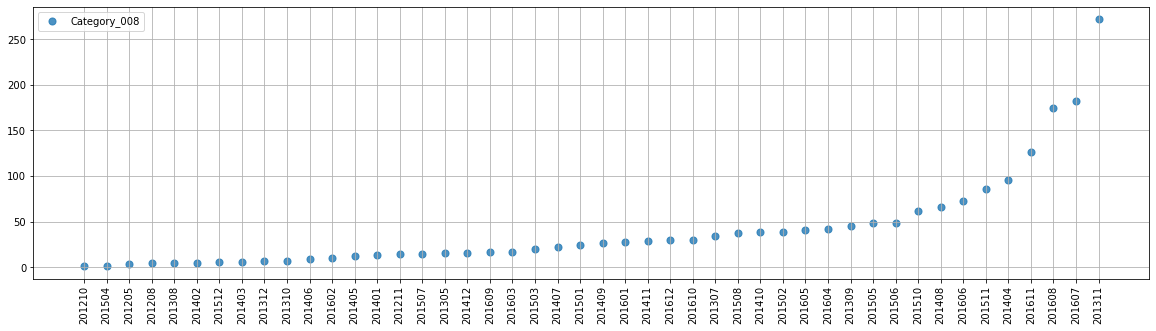

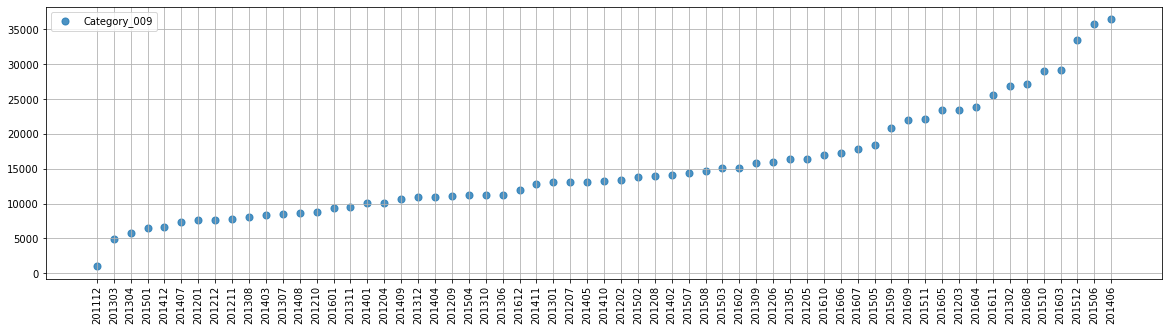

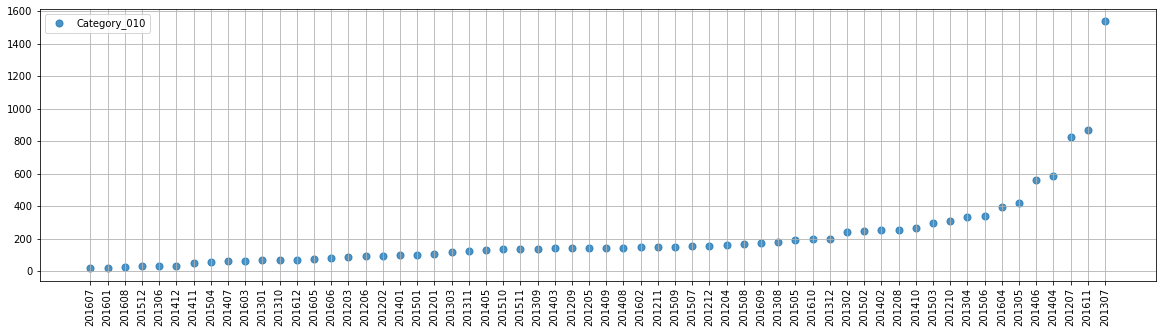

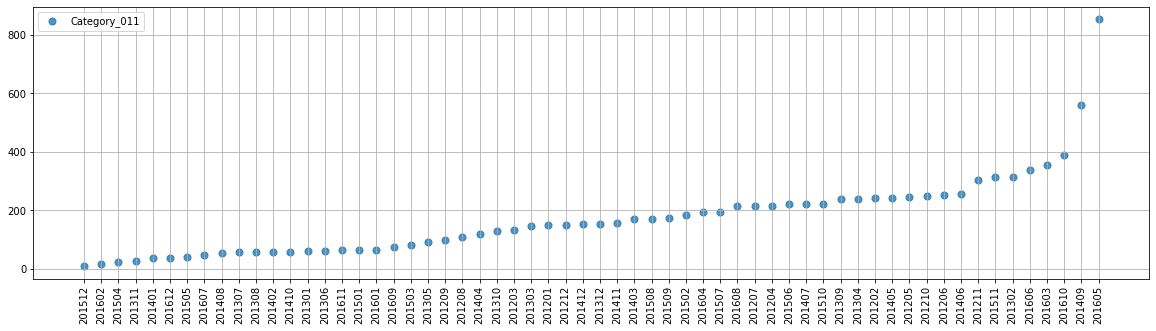

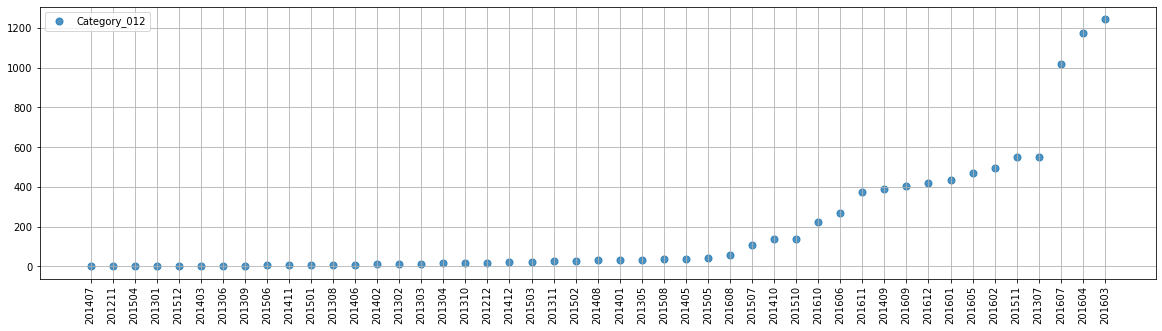

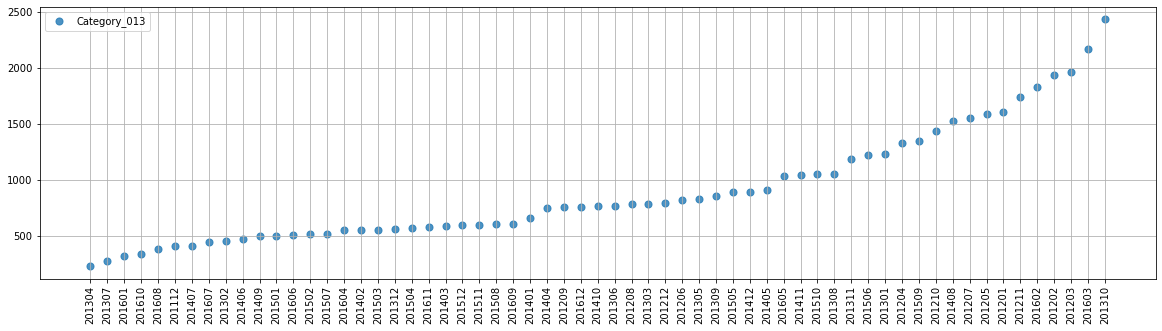

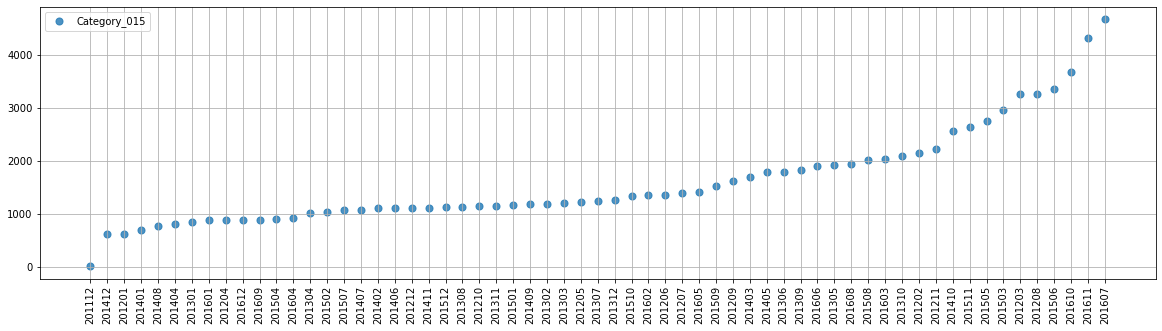

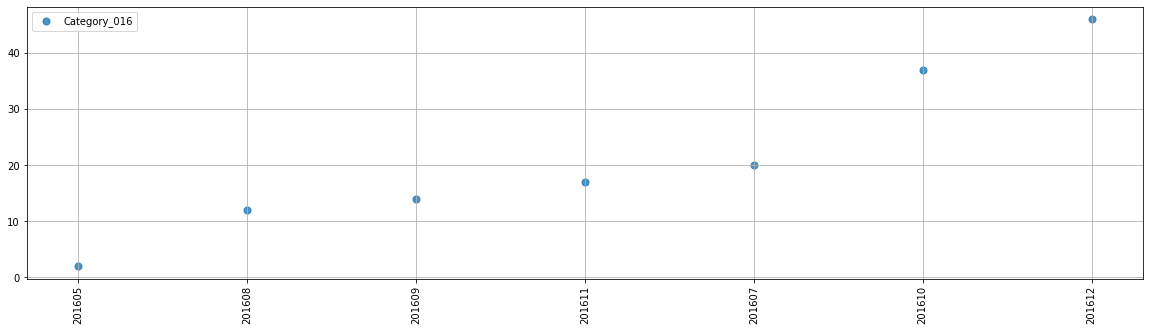

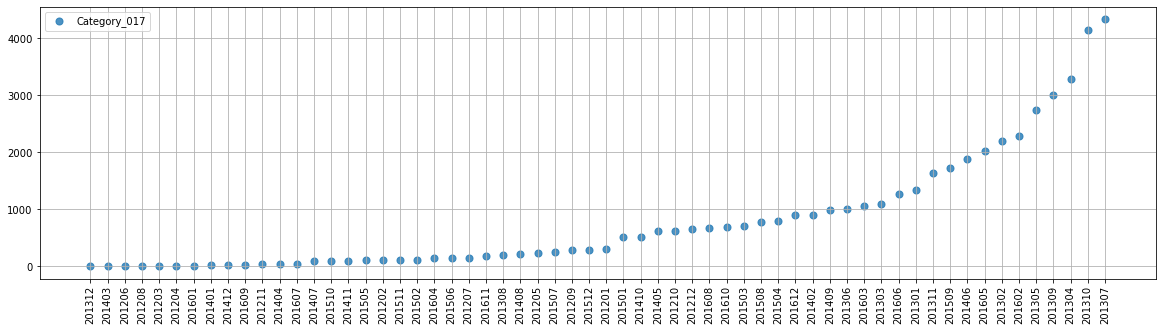

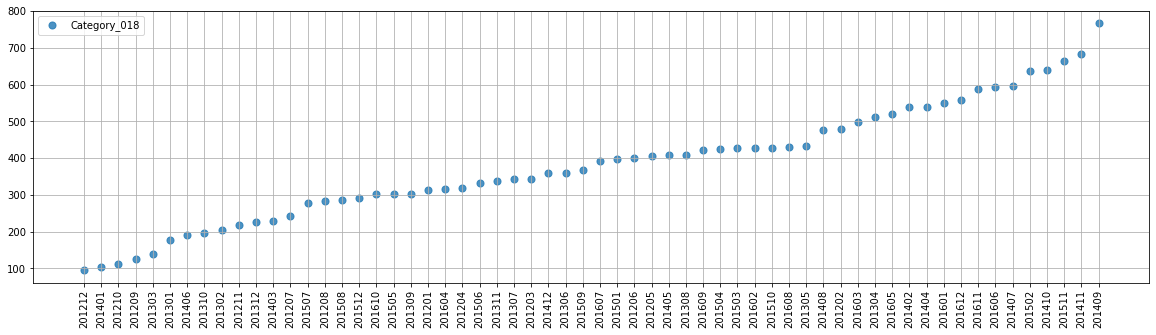

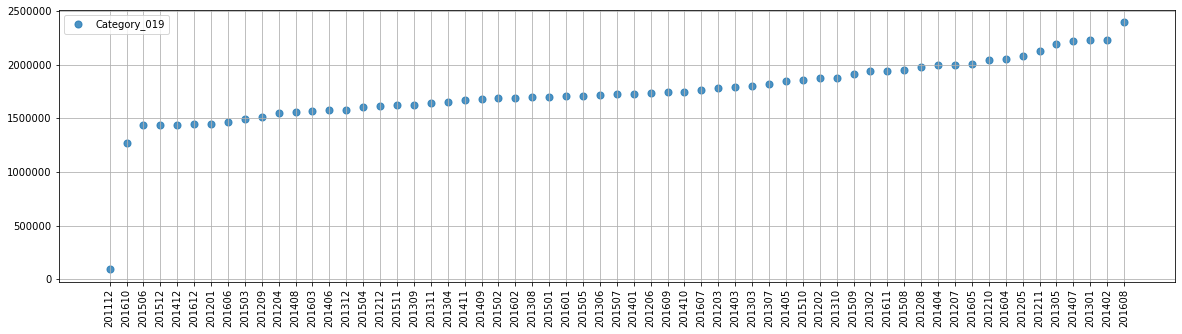

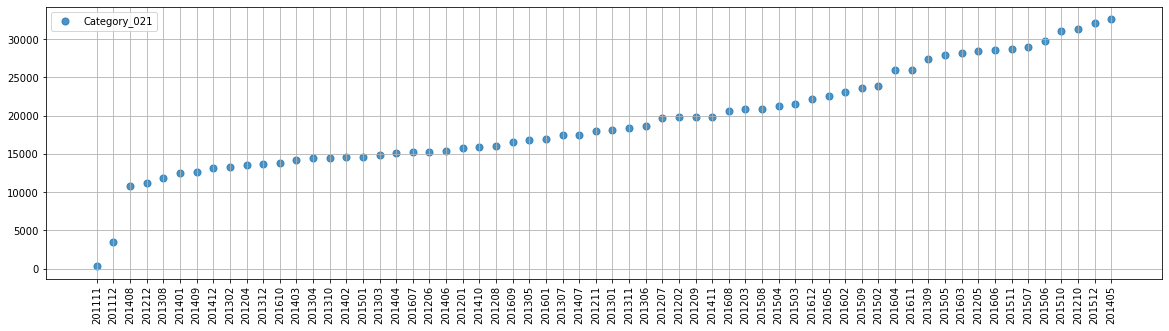

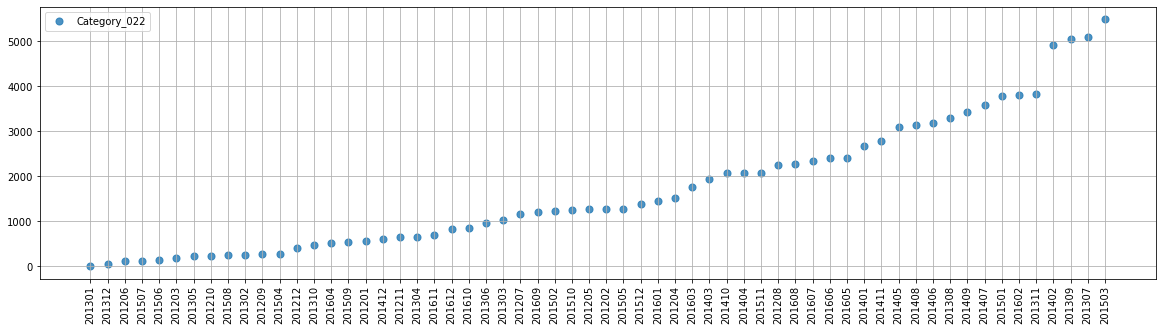

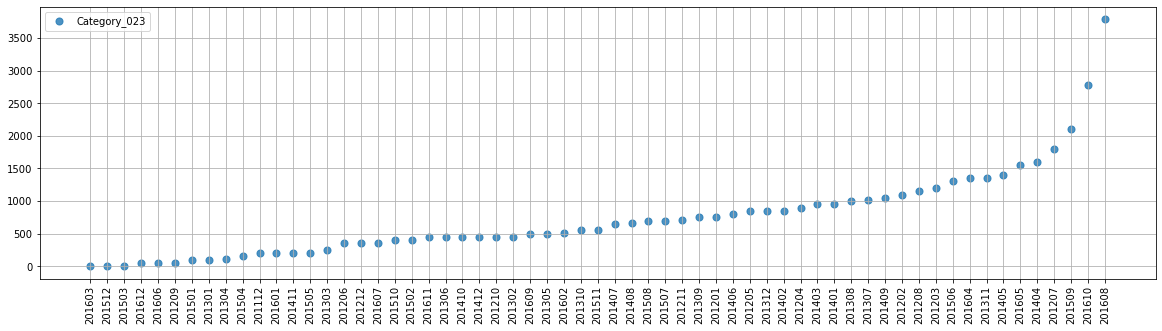

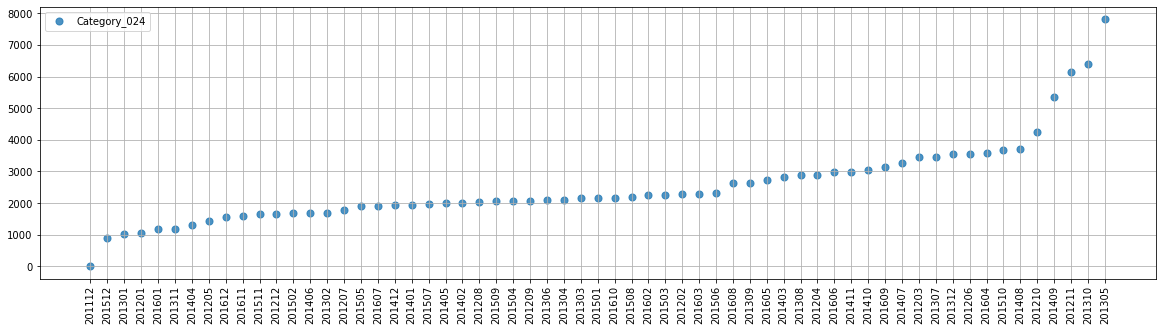

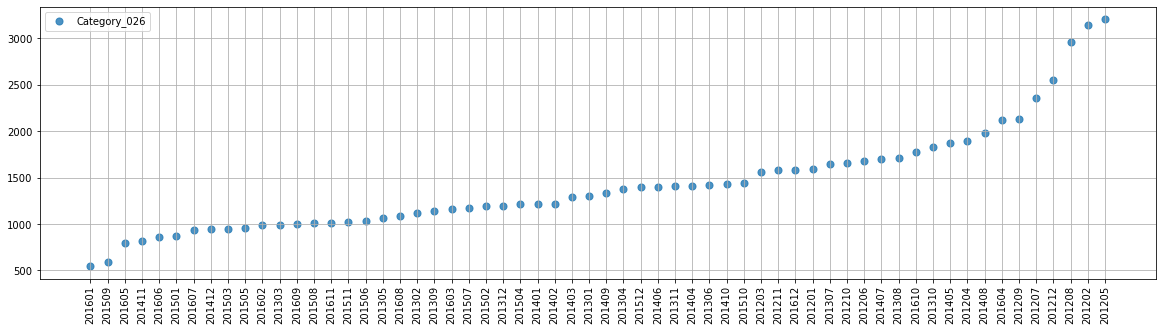

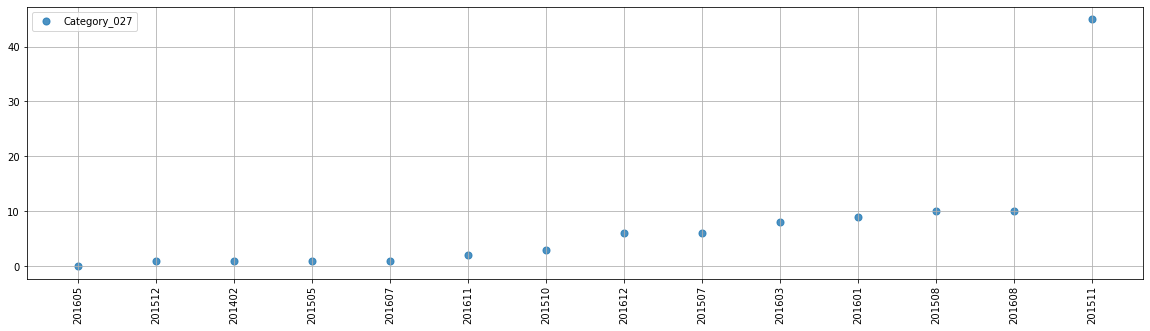

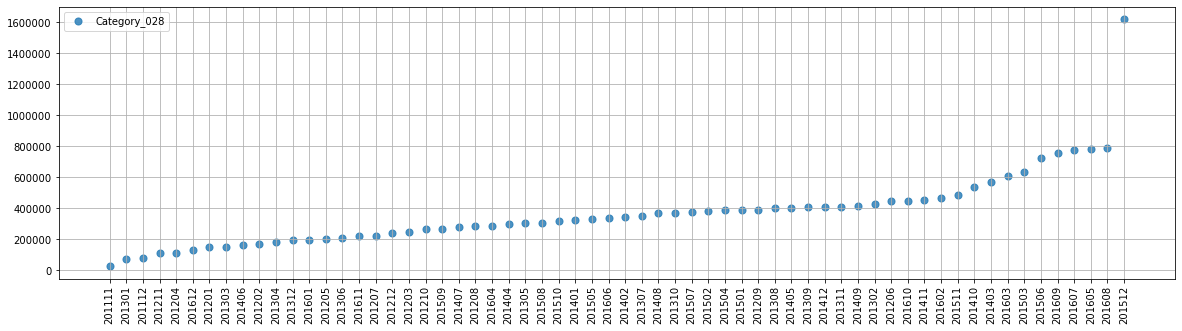

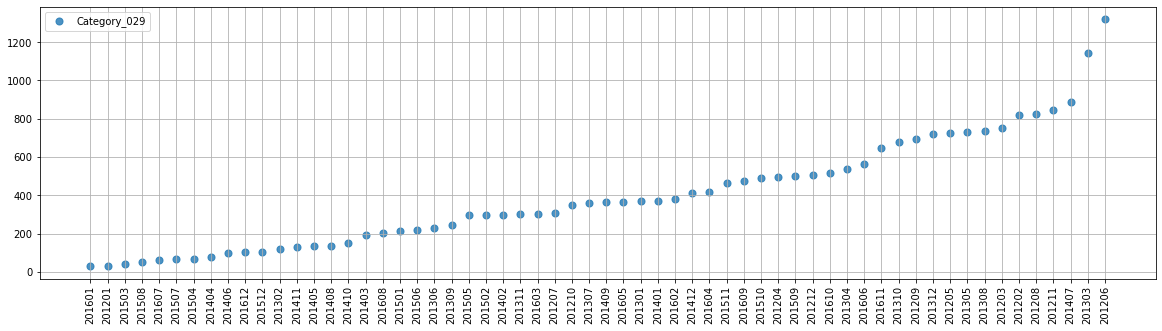

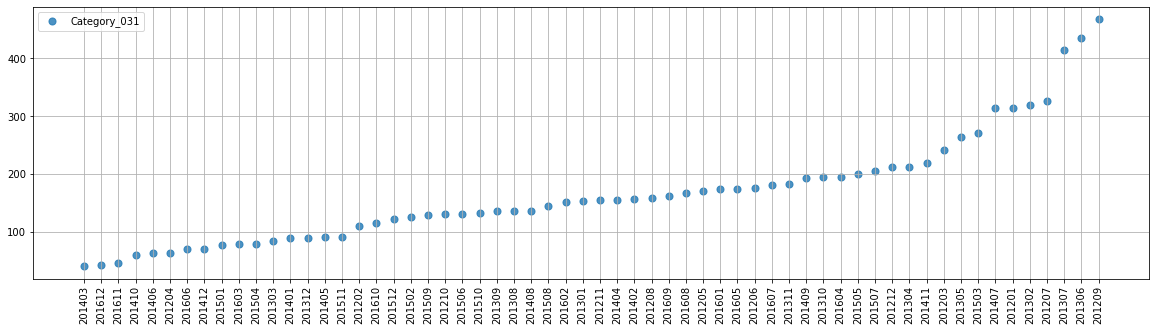

north


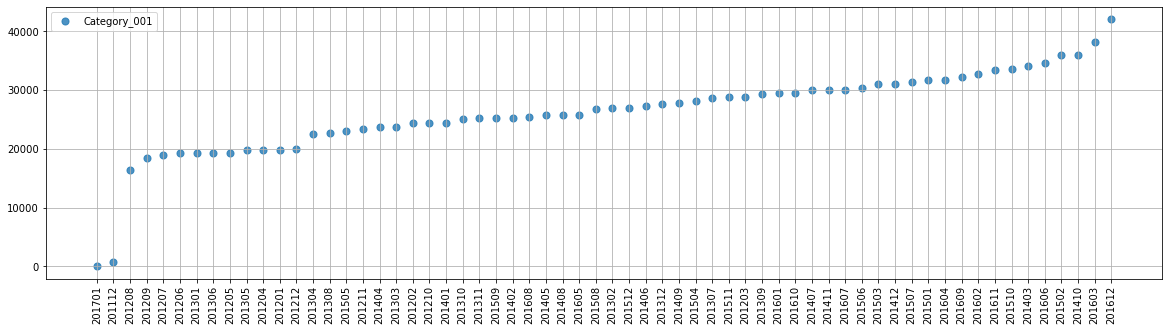

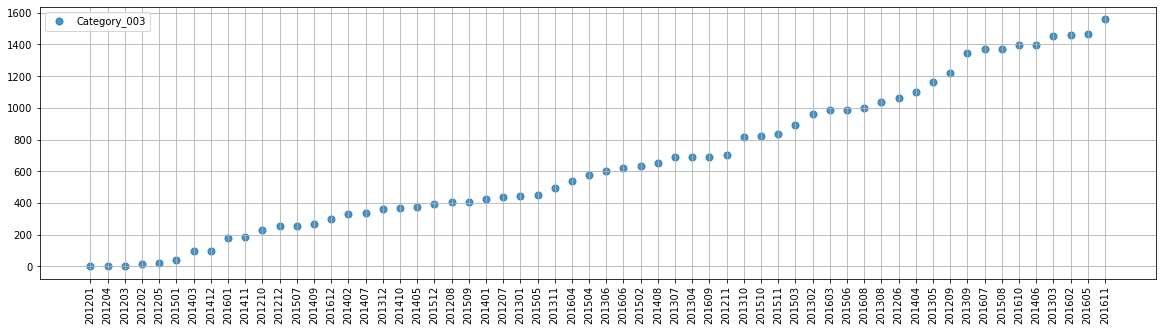

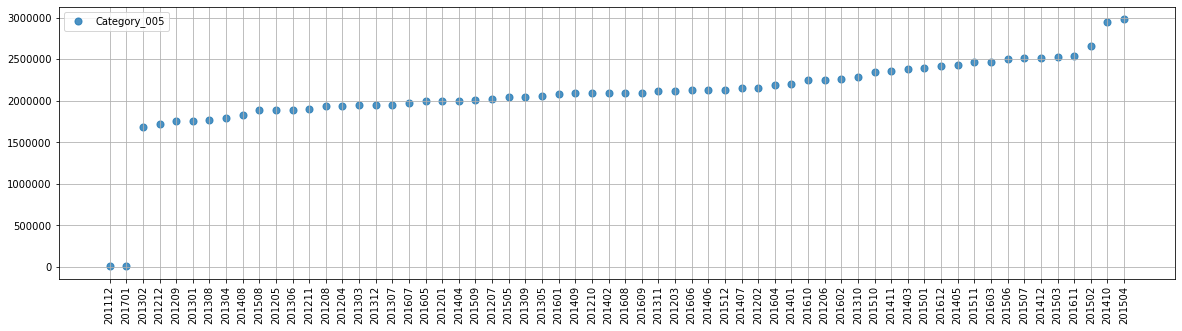

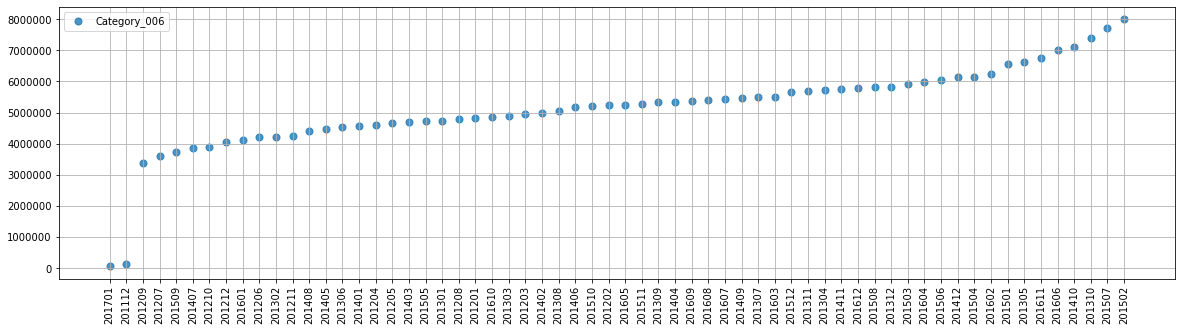

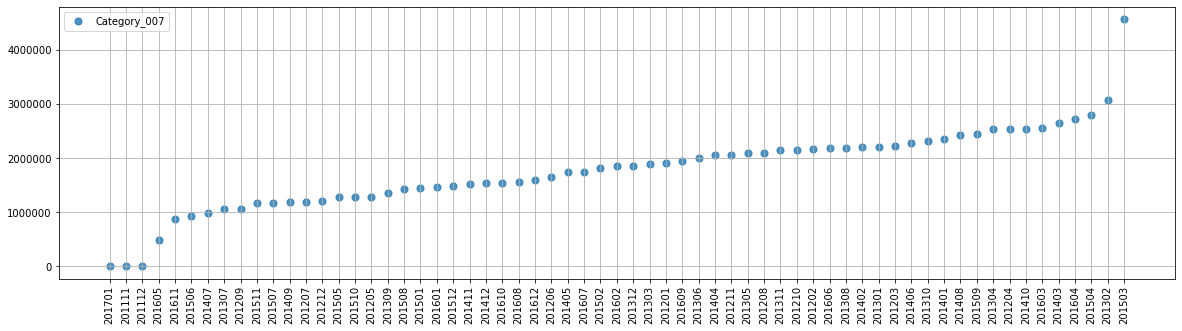

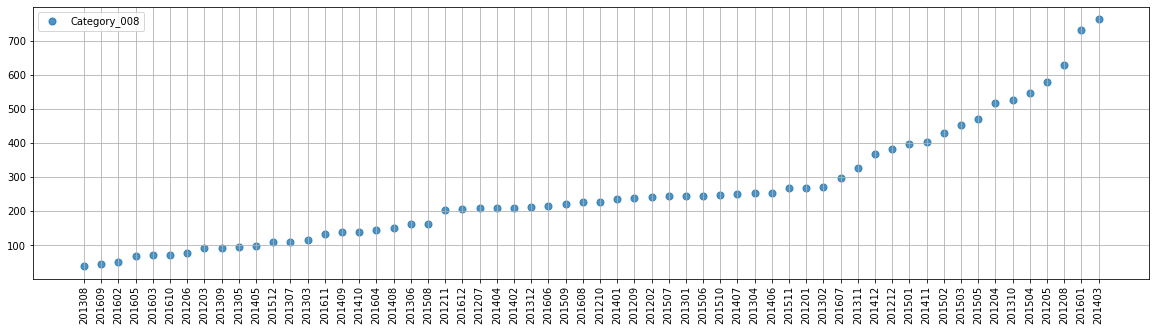

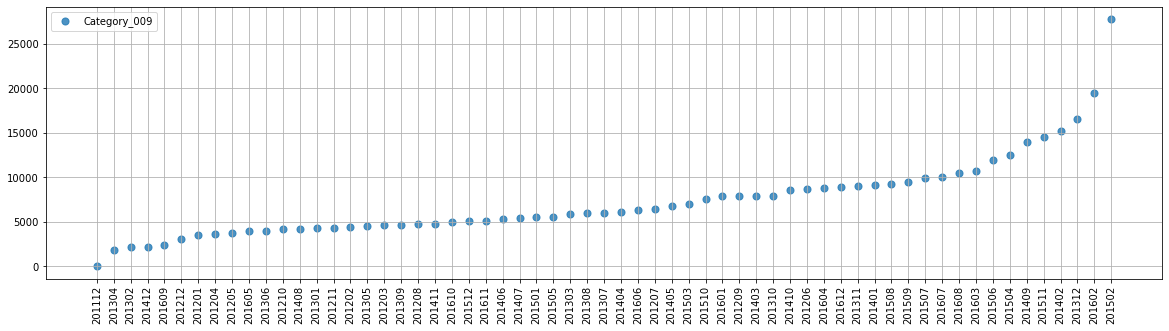

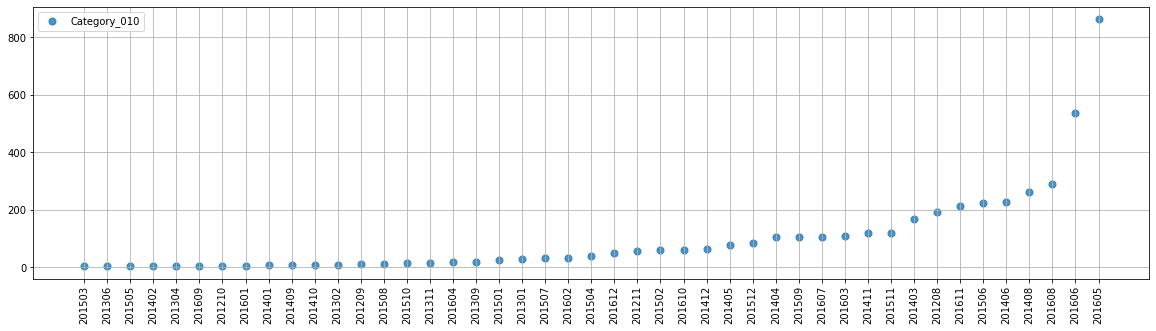

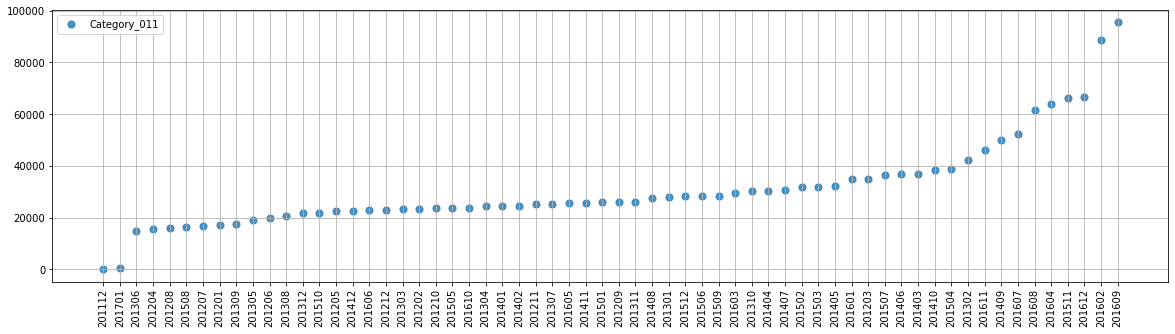

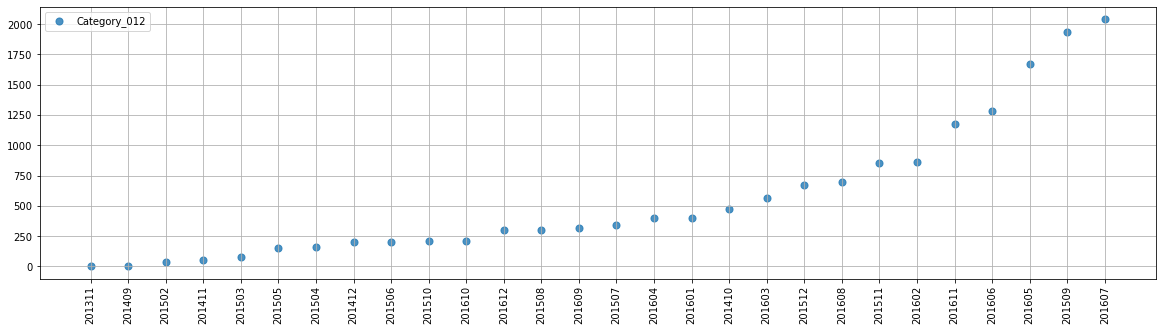

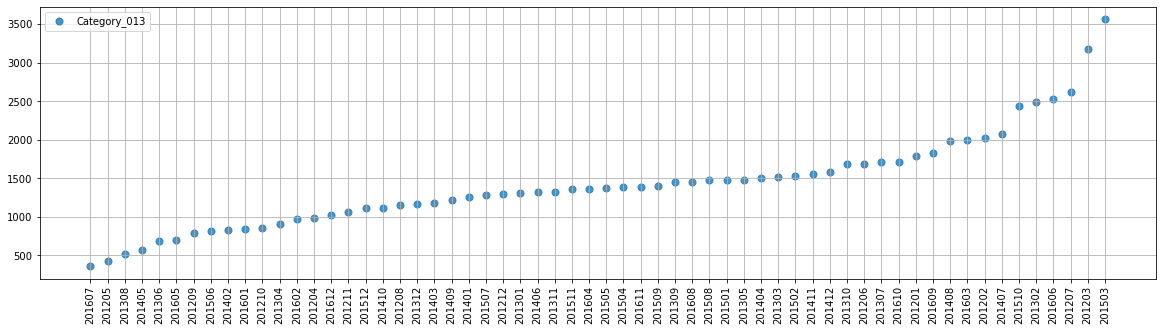

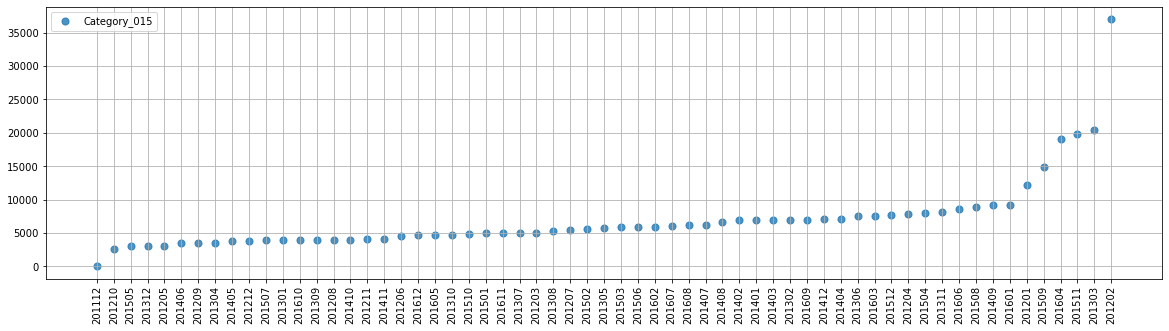

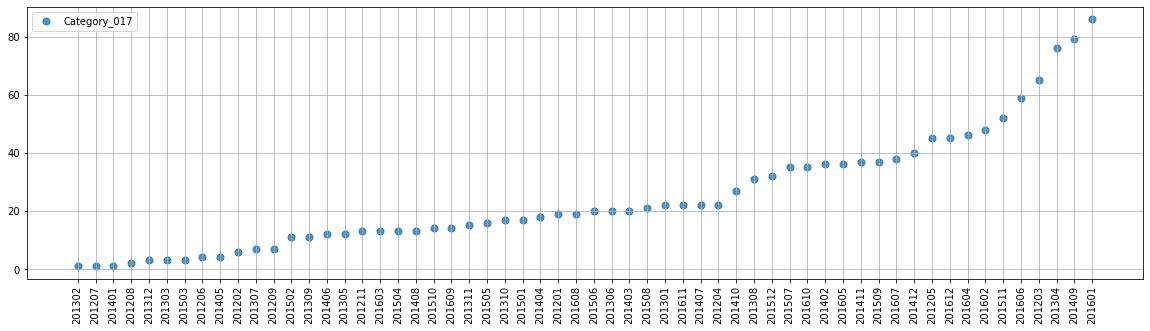

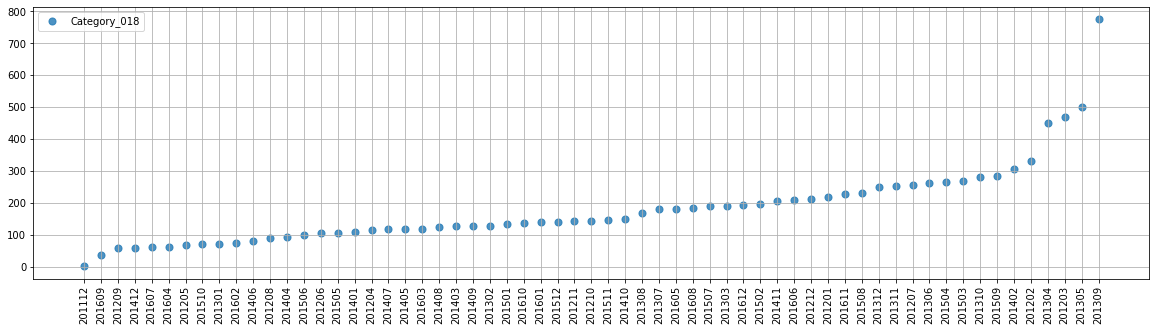

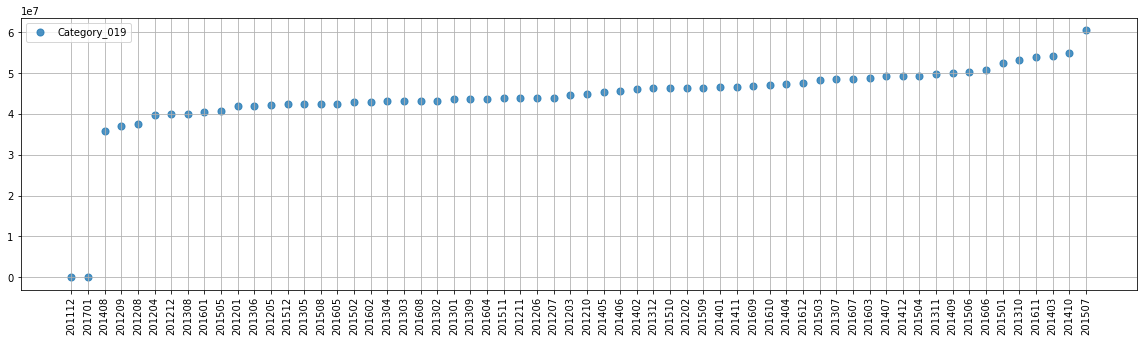

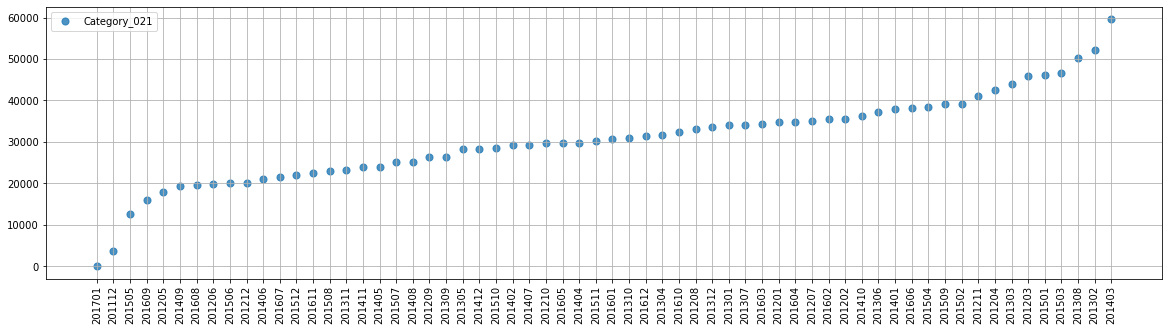

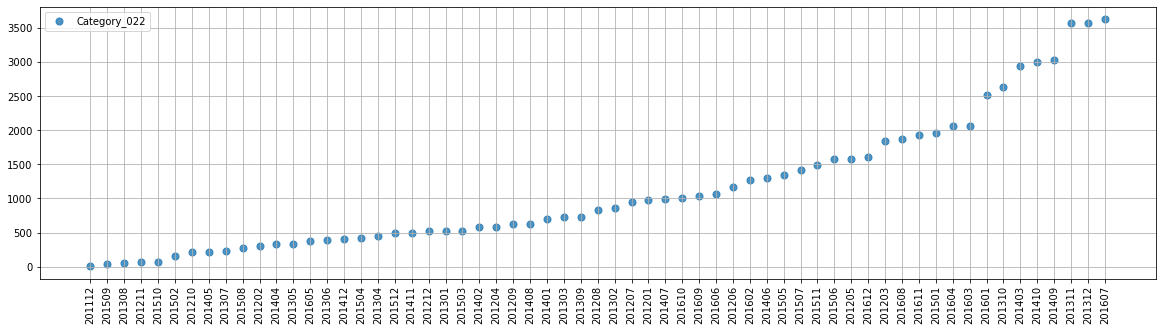

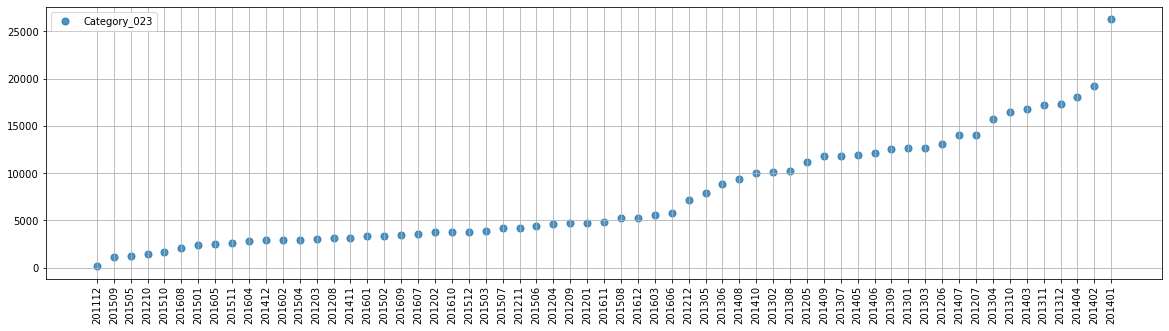

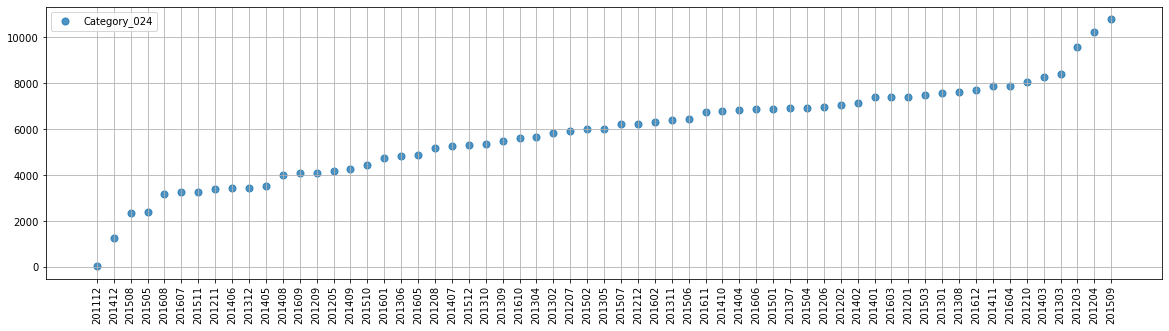

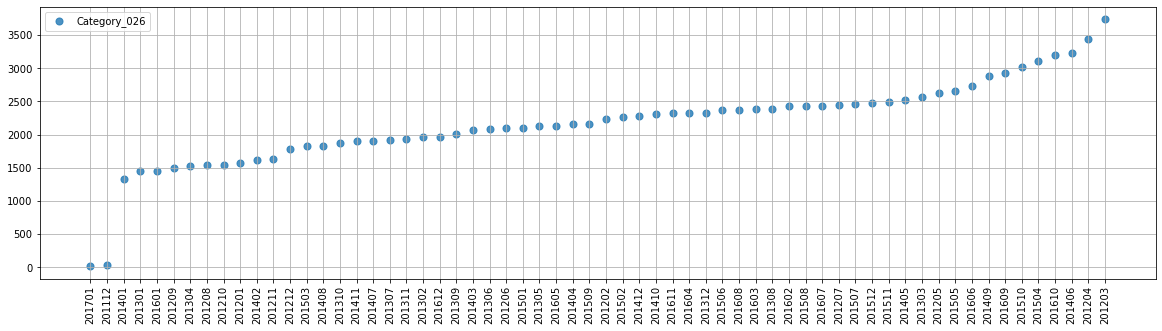

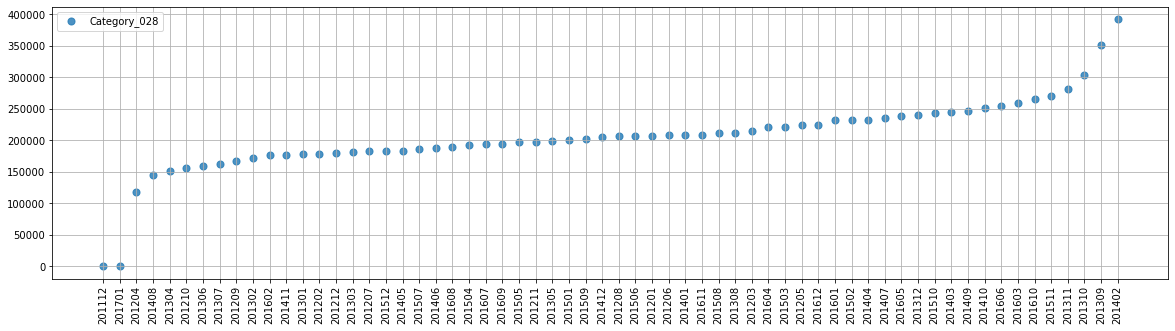

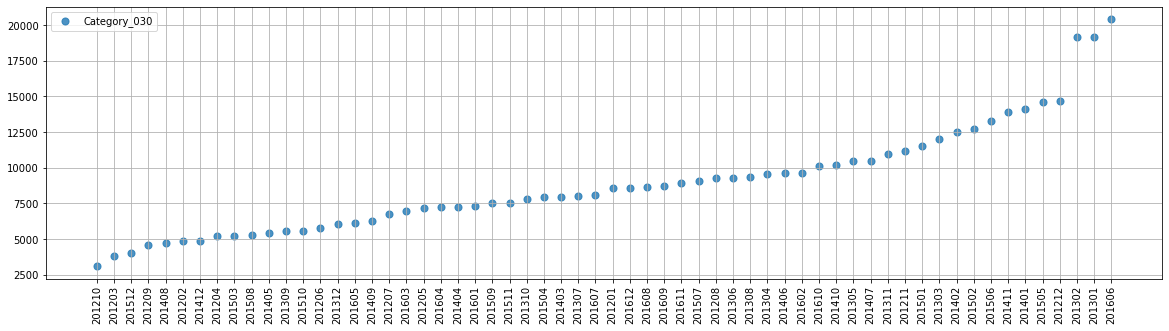

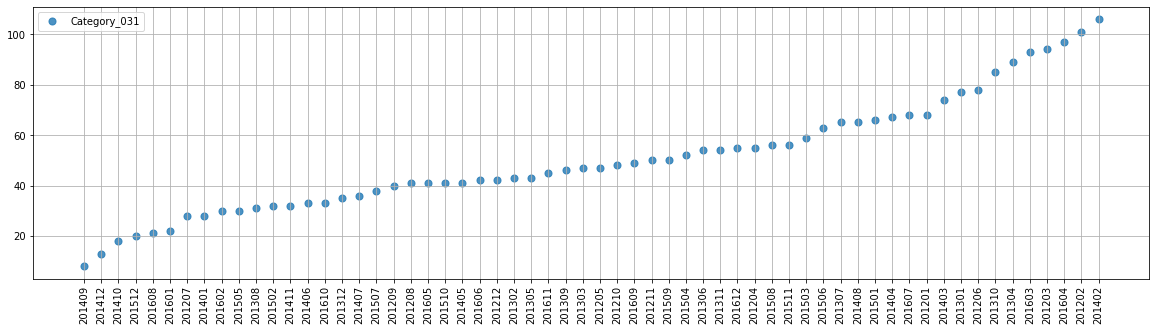

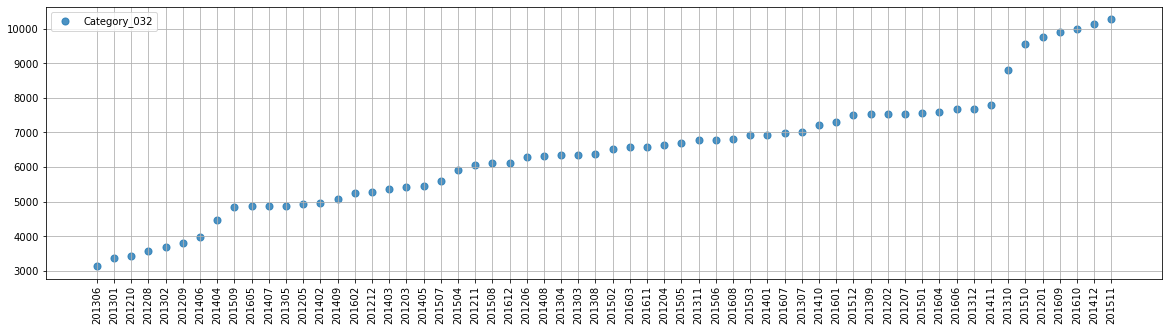

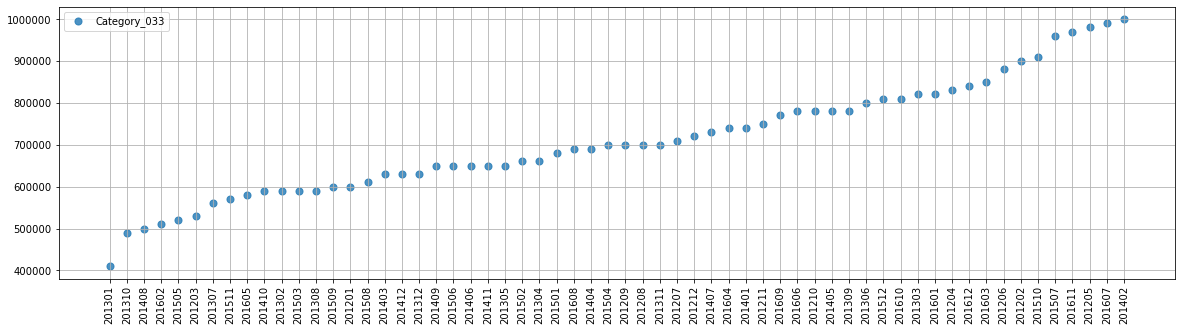

south


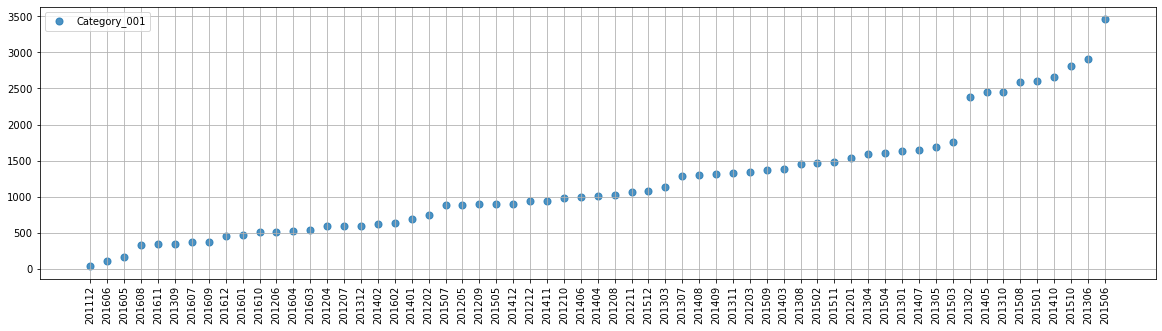

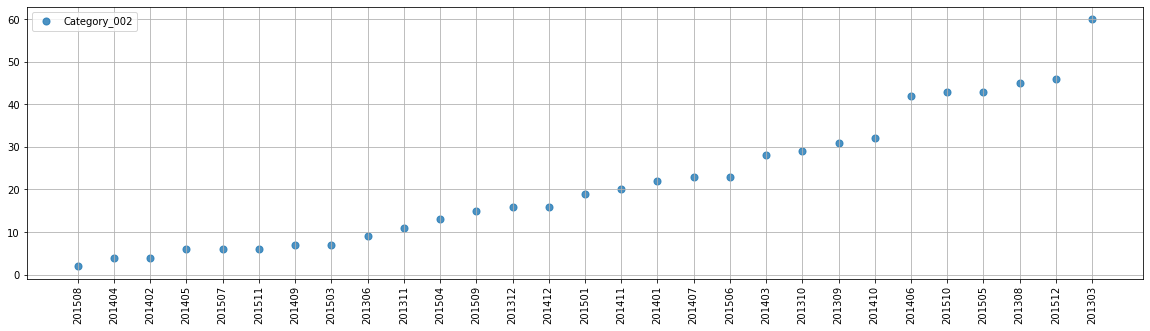

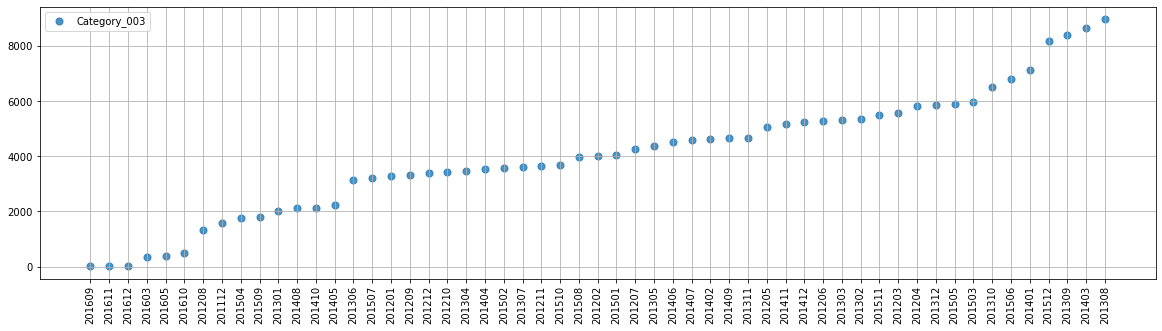

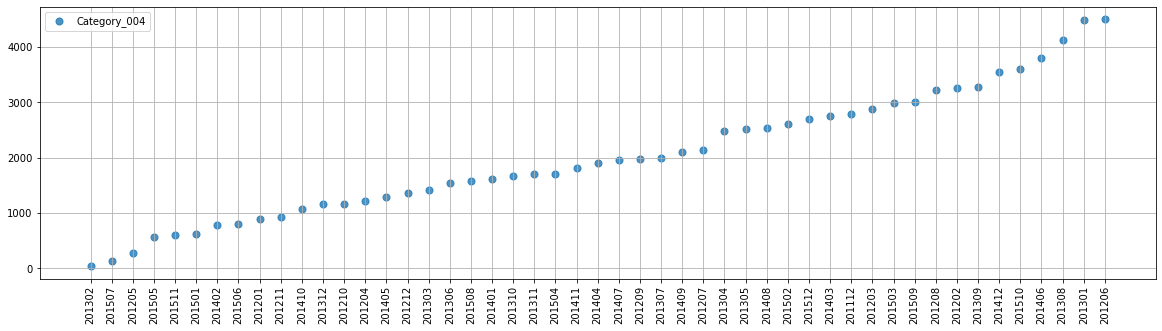

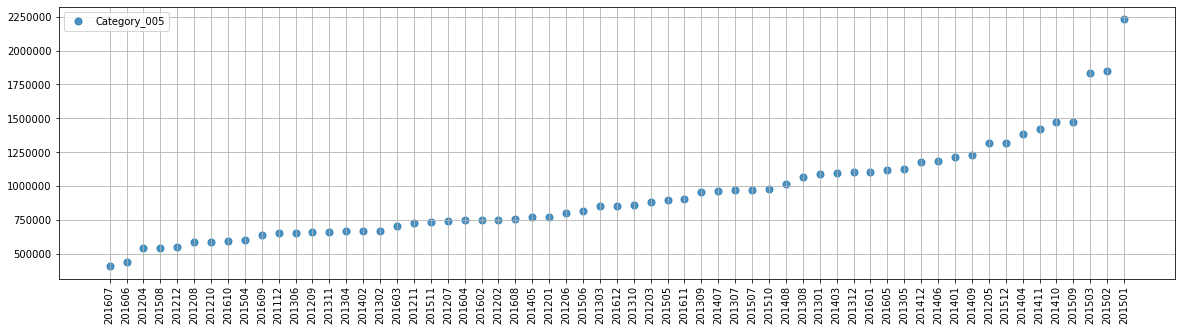

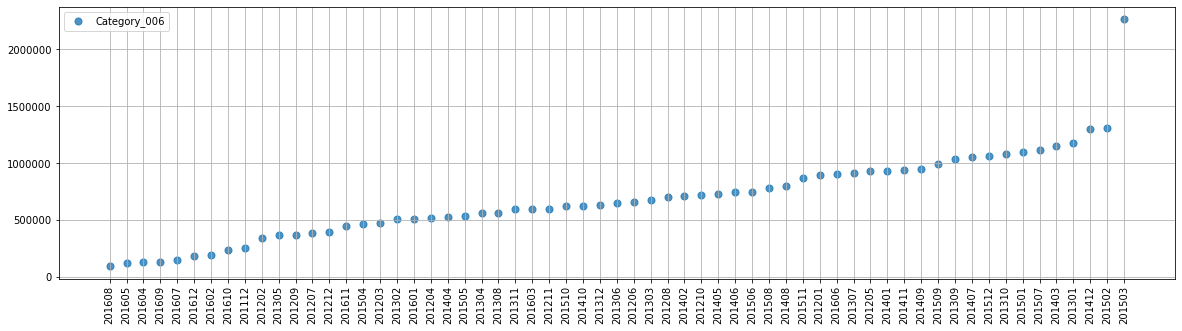

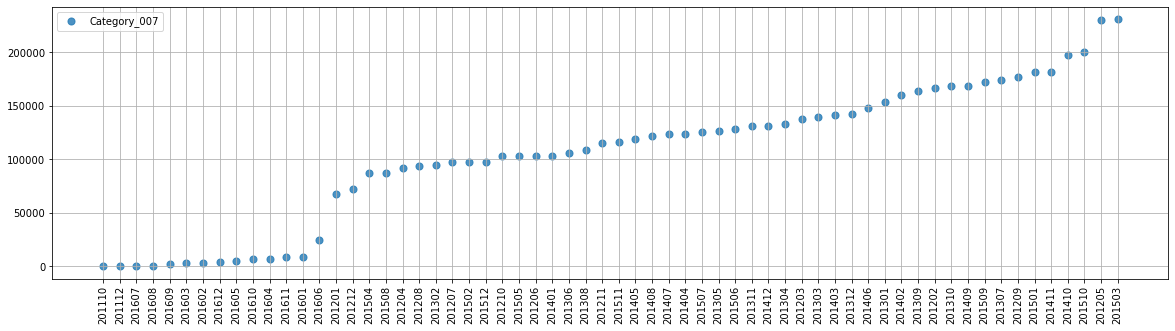

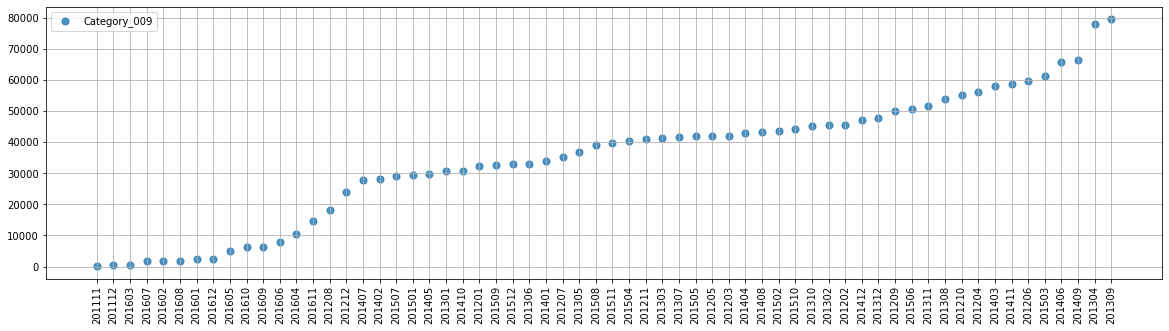

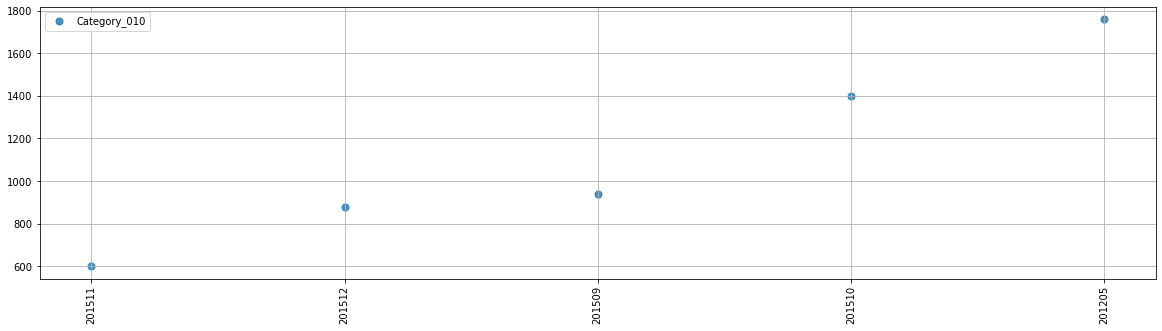

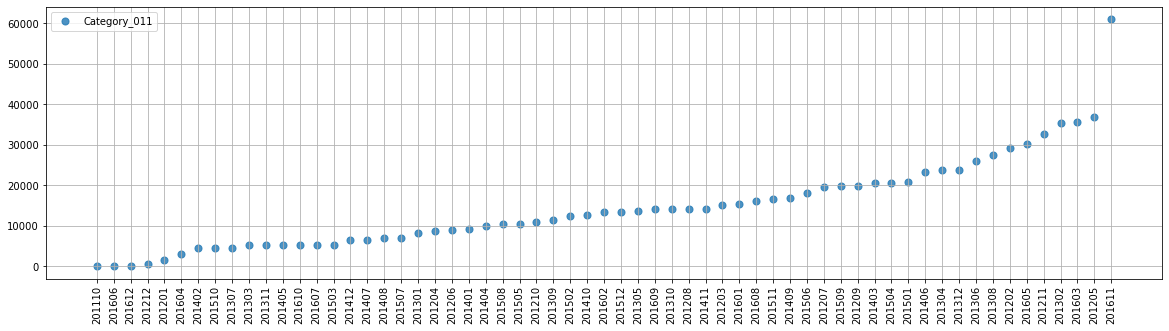

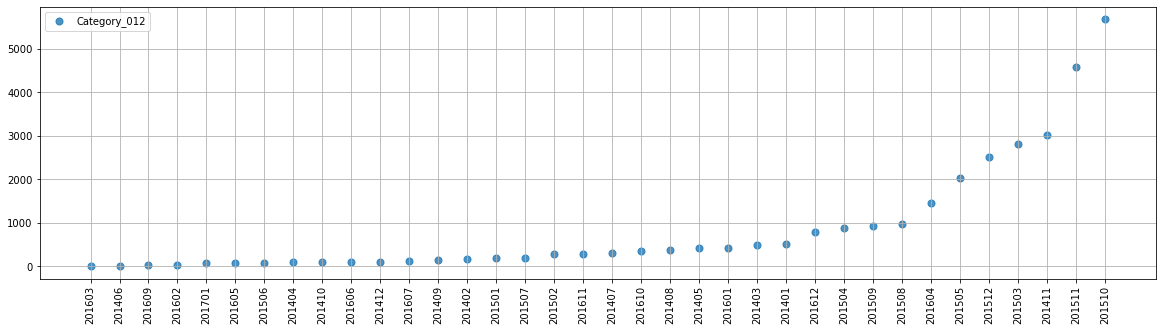

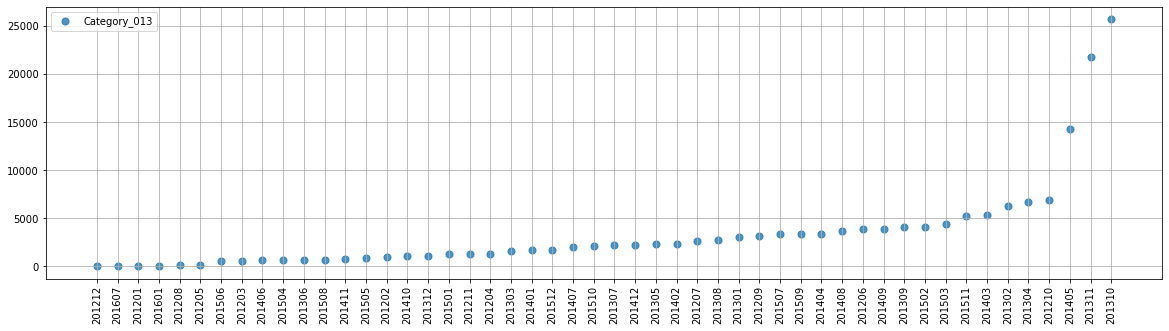

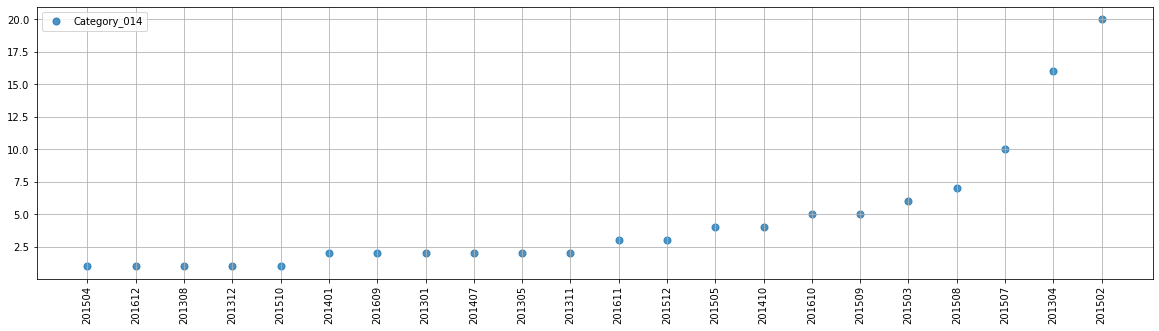

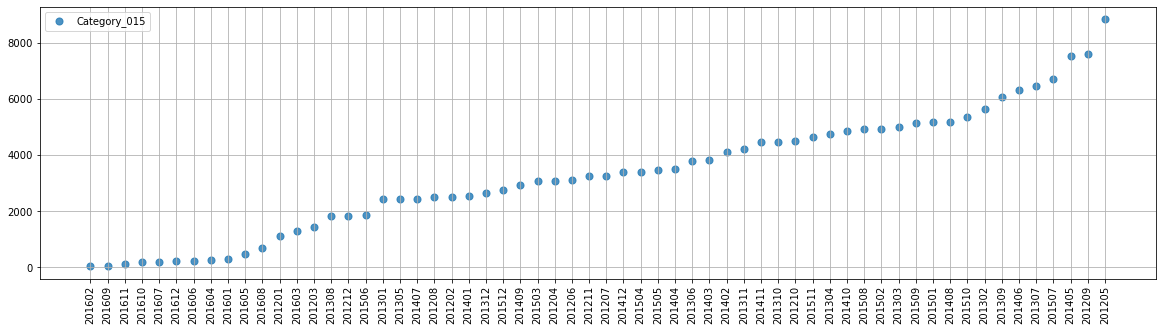

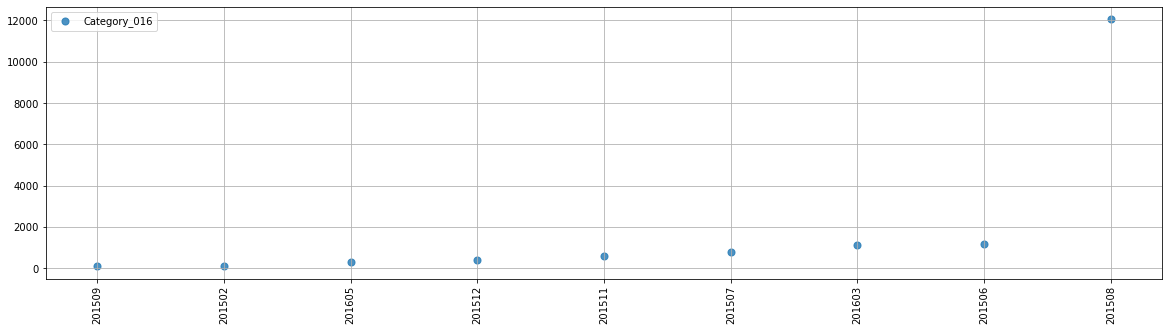

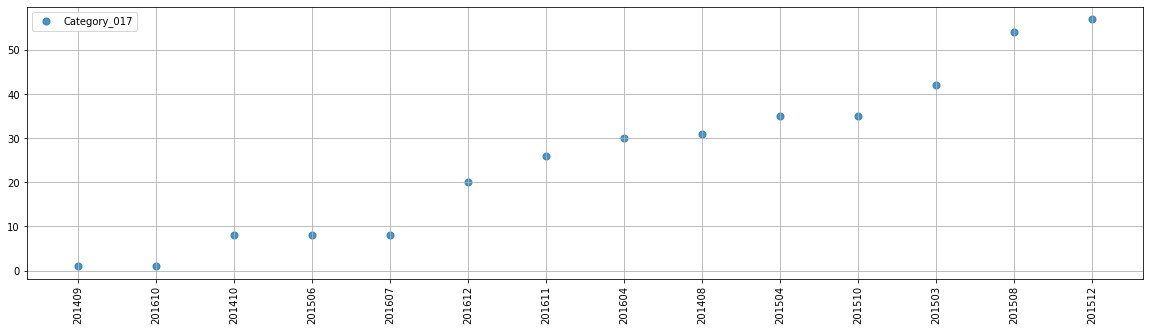

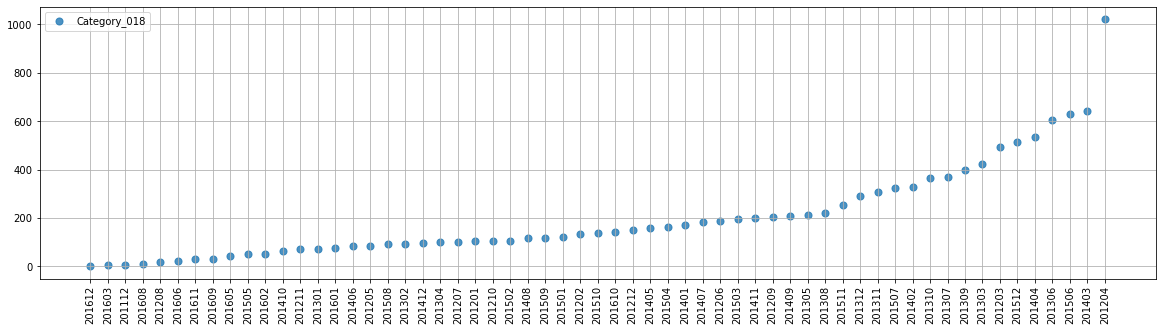

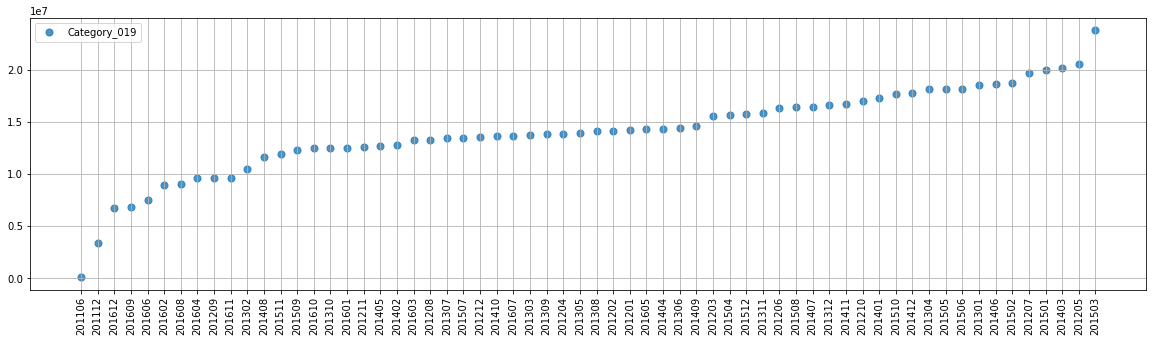

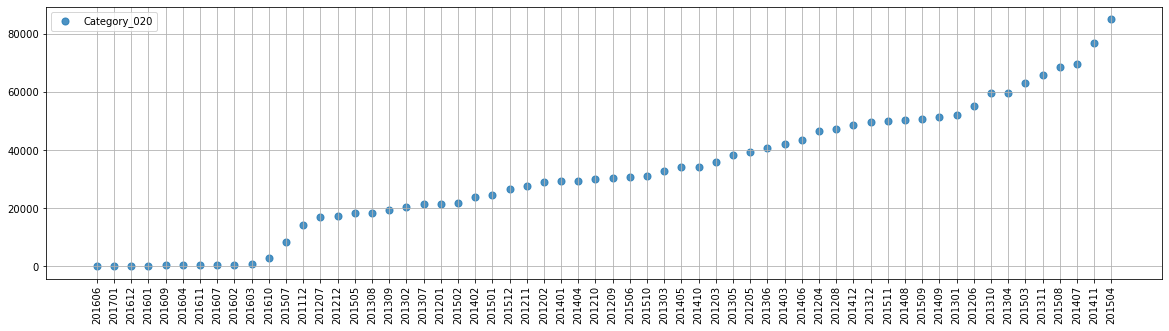

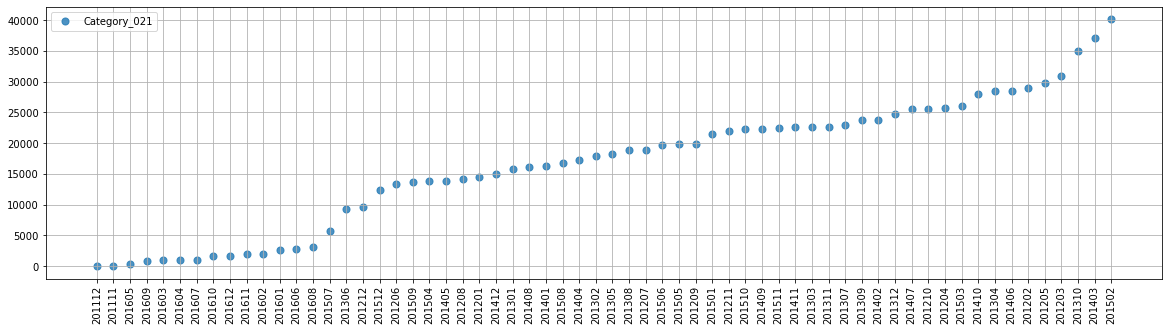

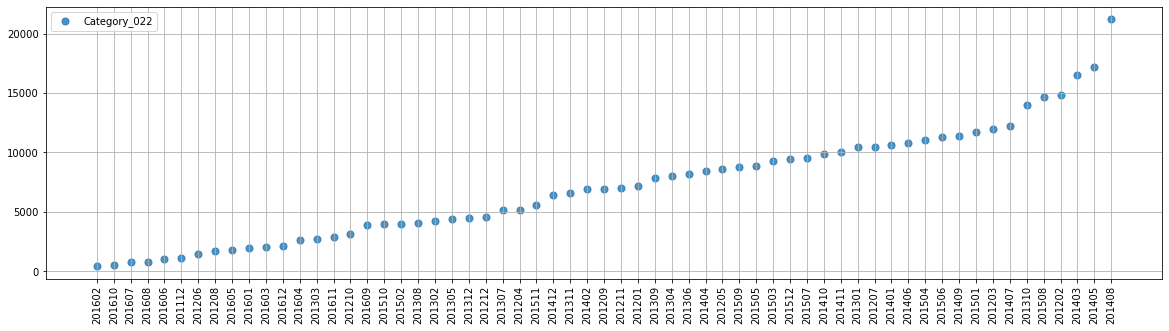

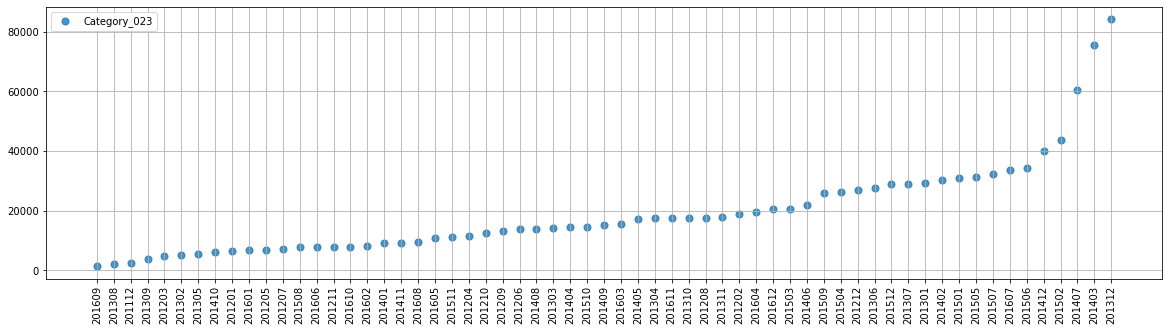

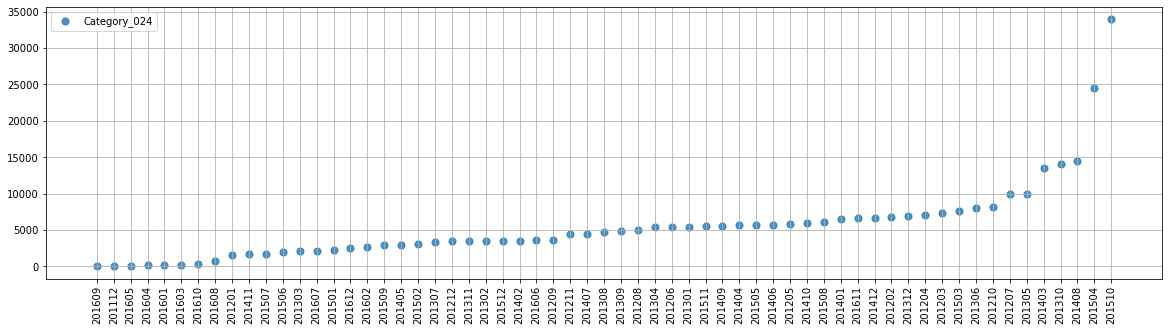

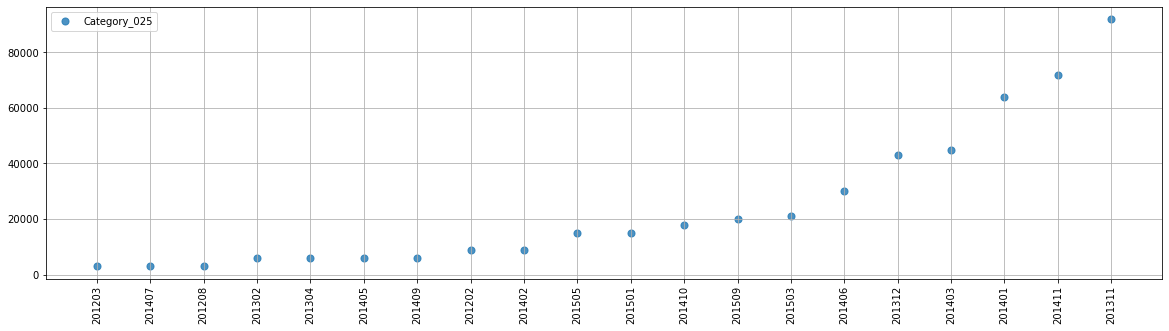

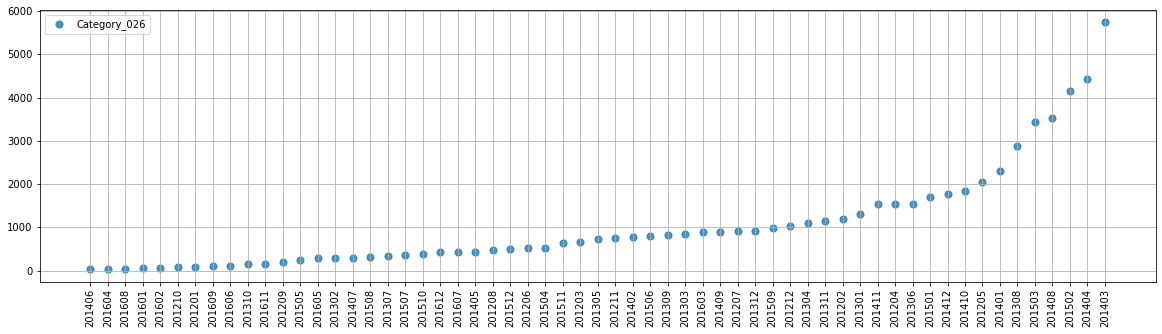

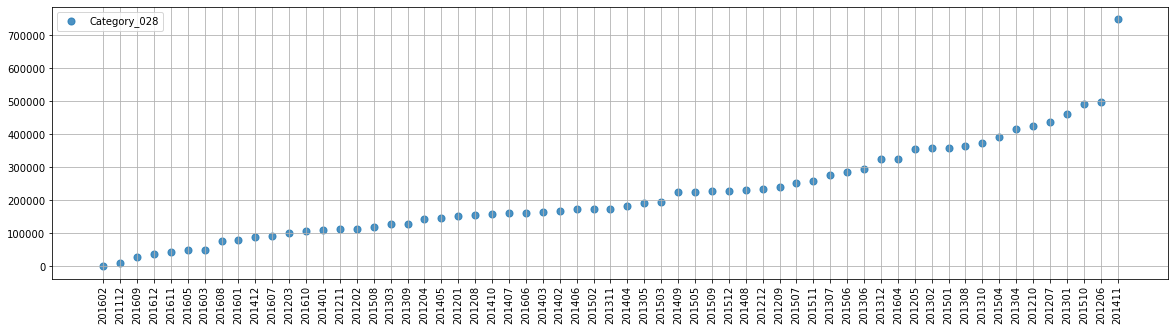

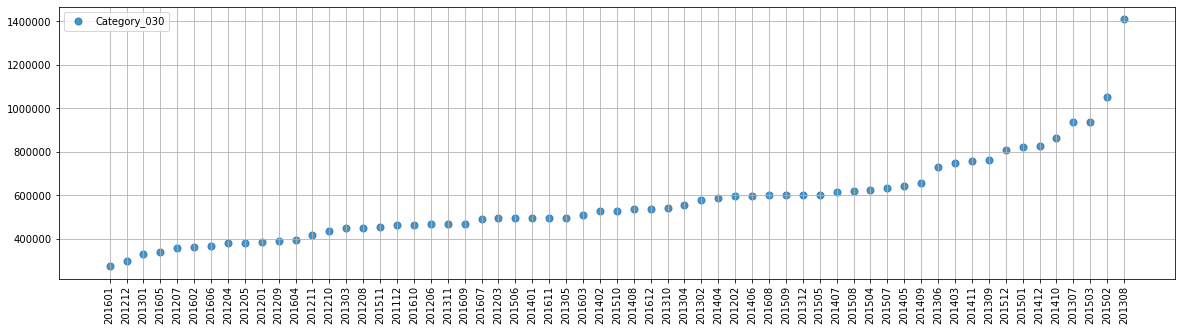

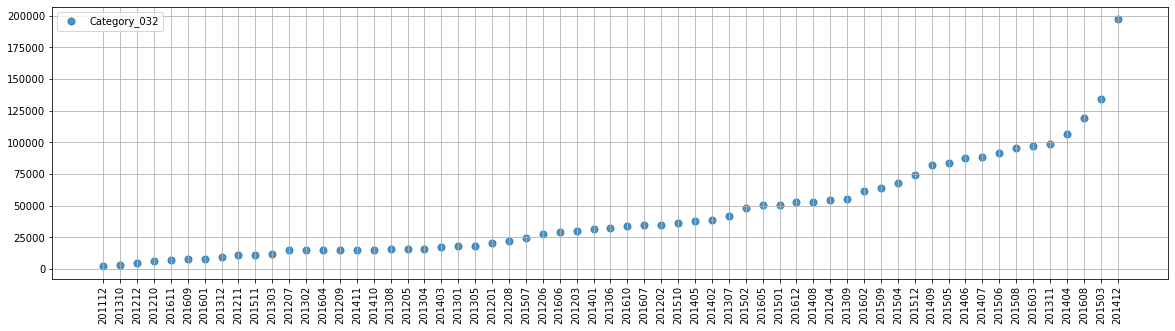

west


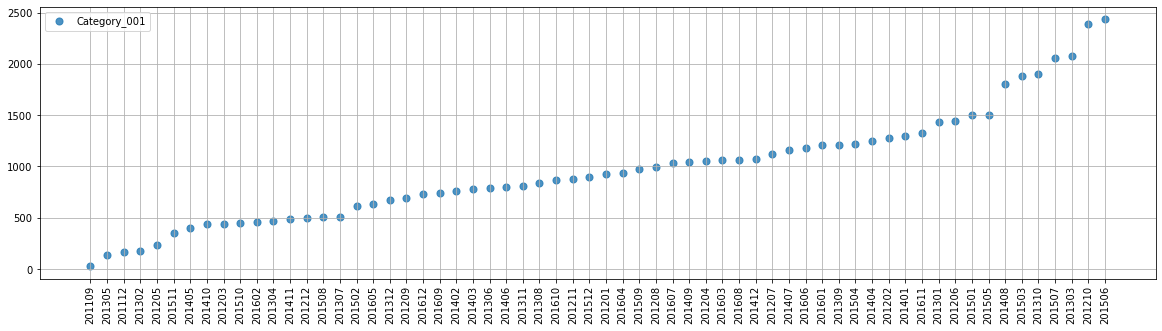

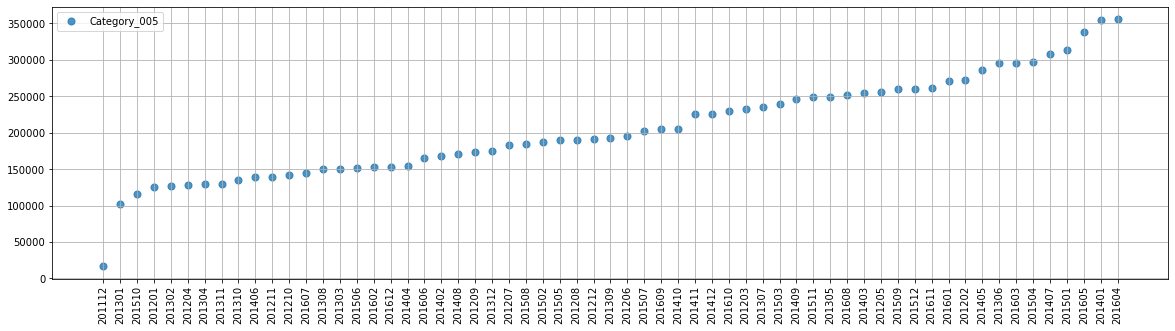

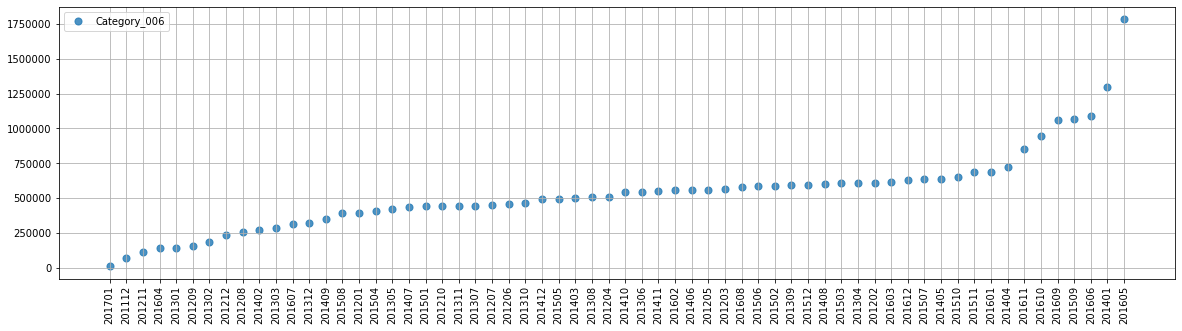

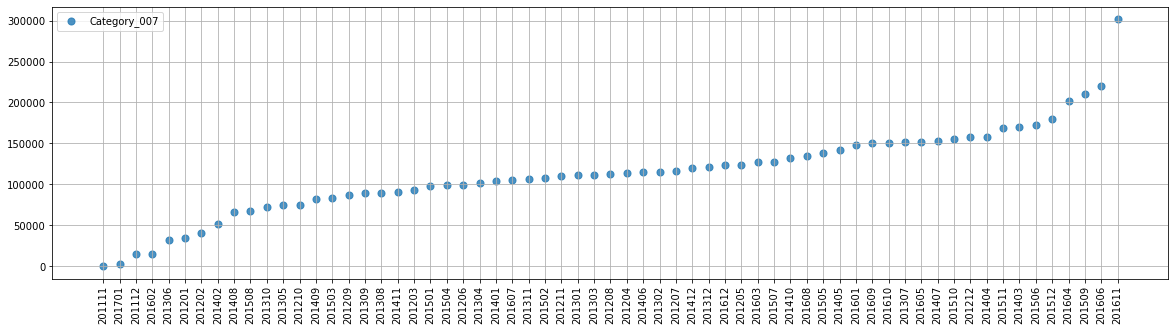

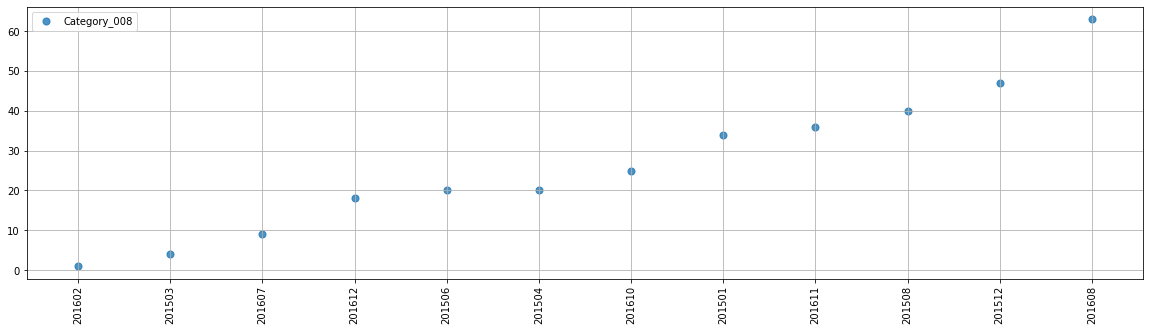

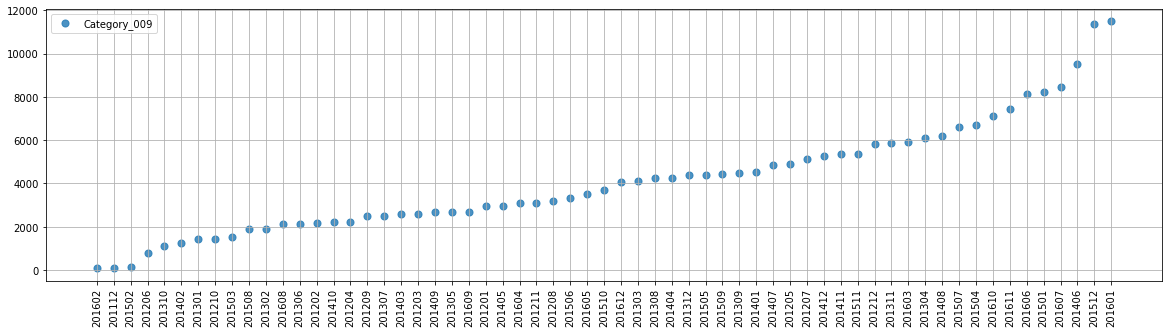

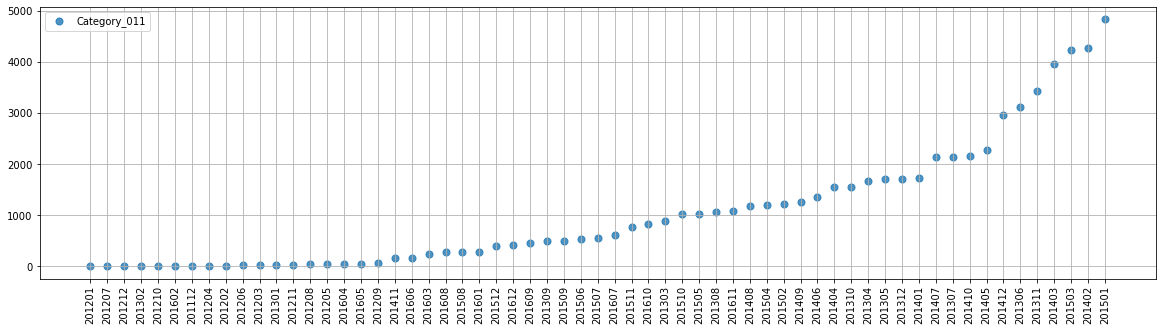

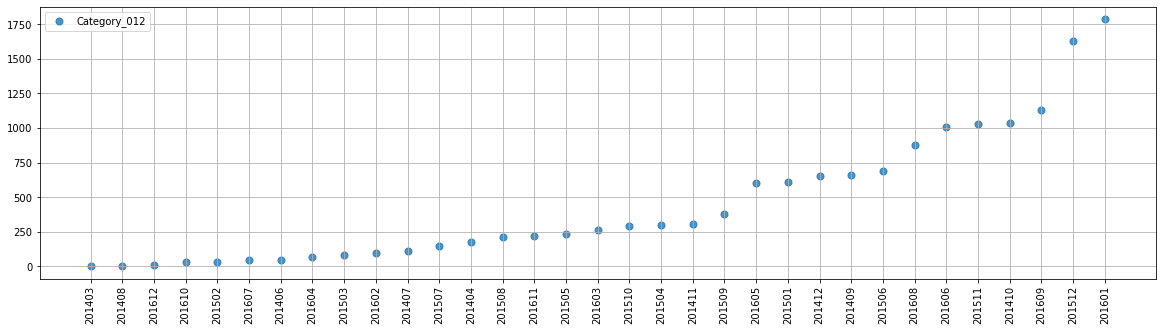

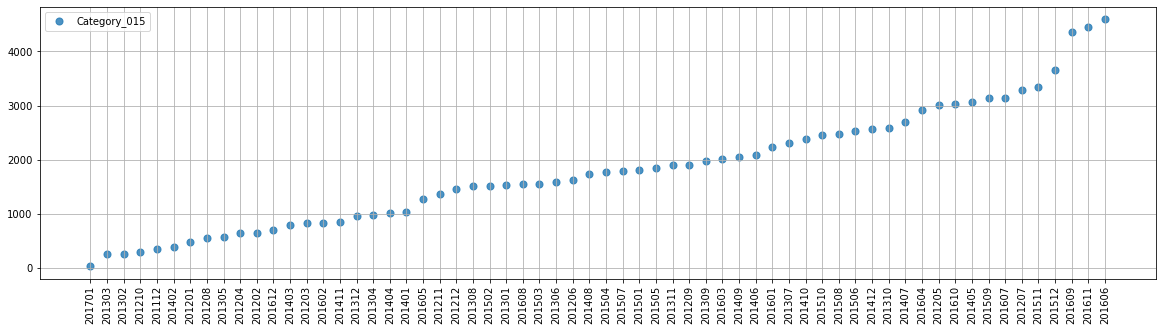

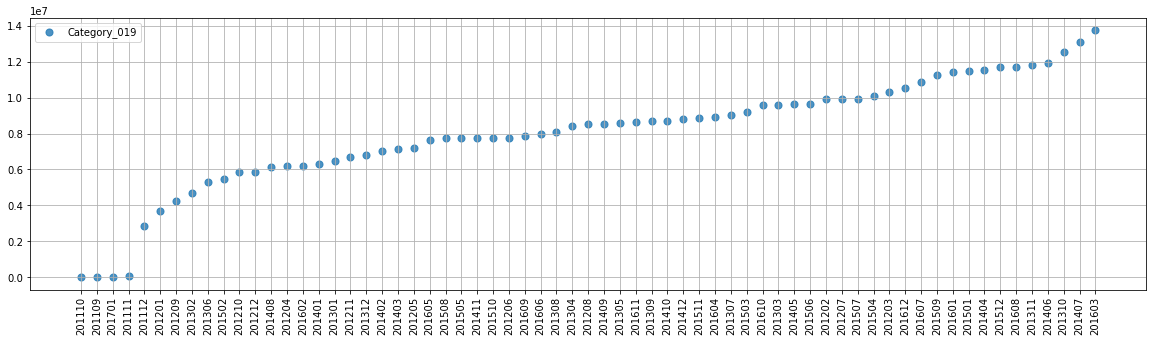

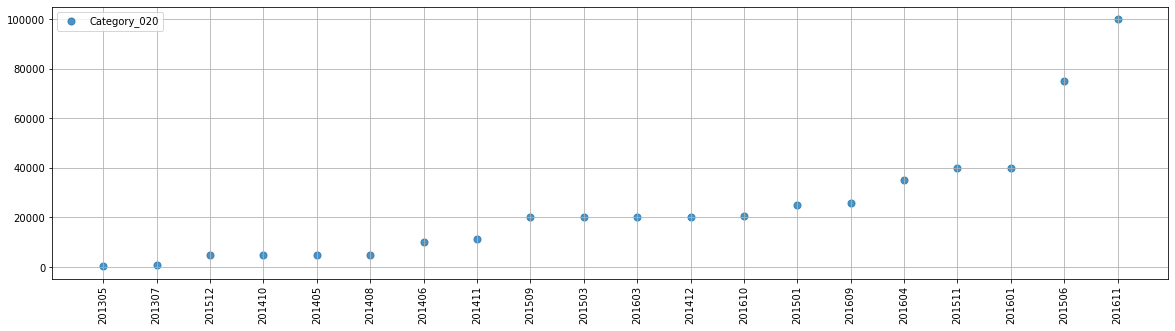

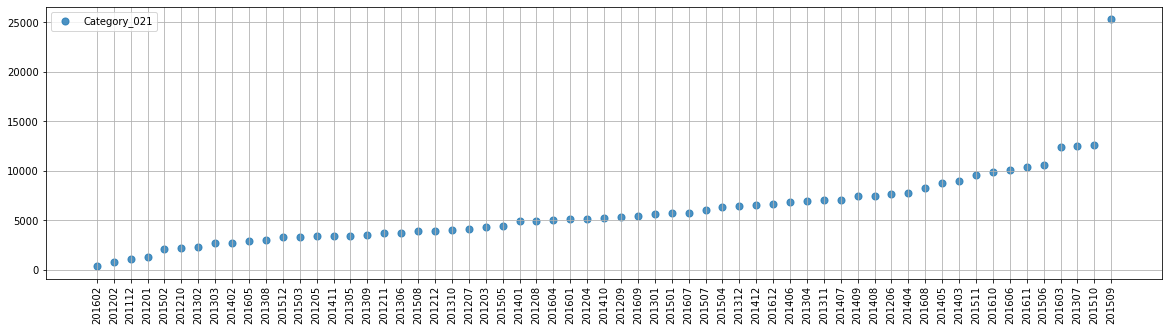

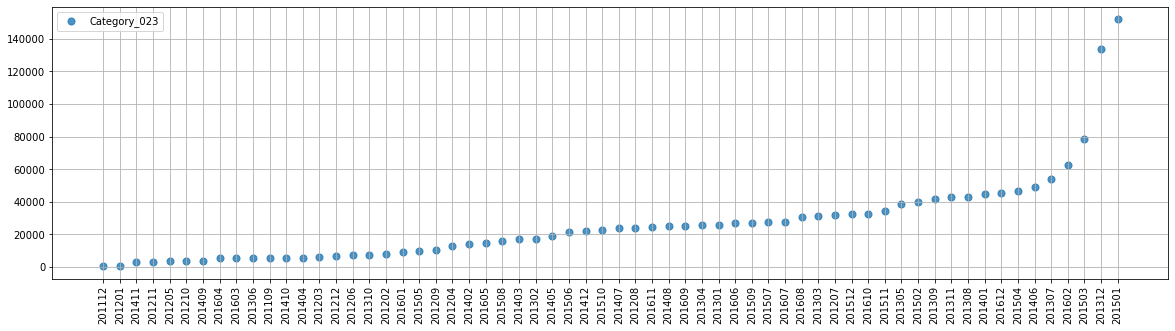

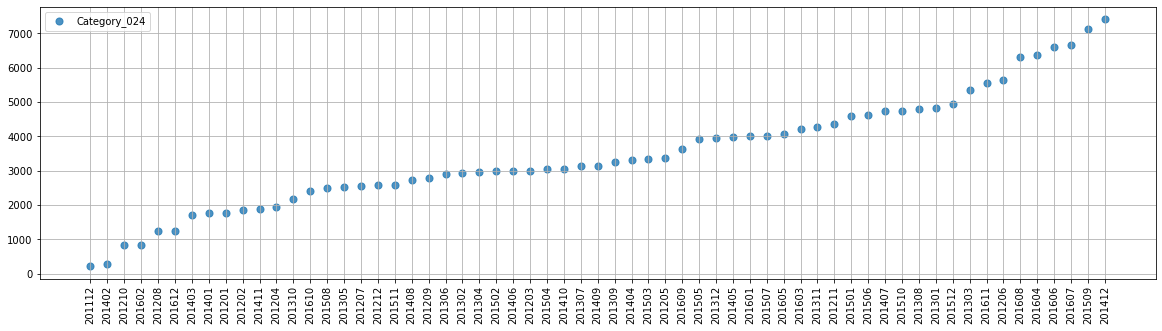

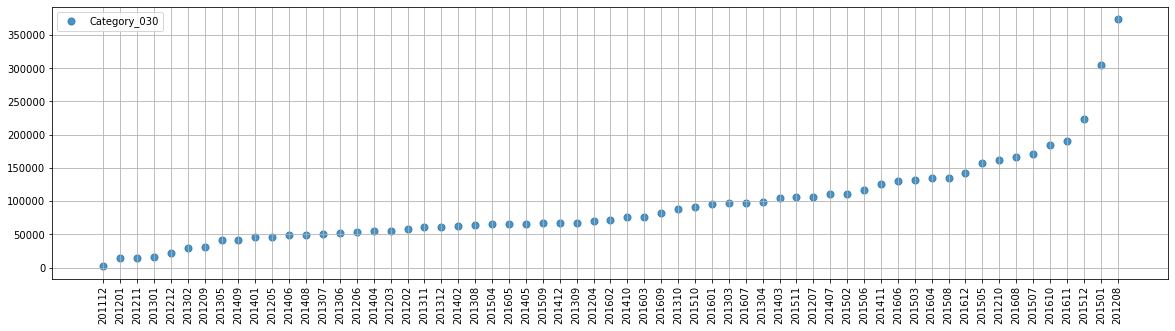

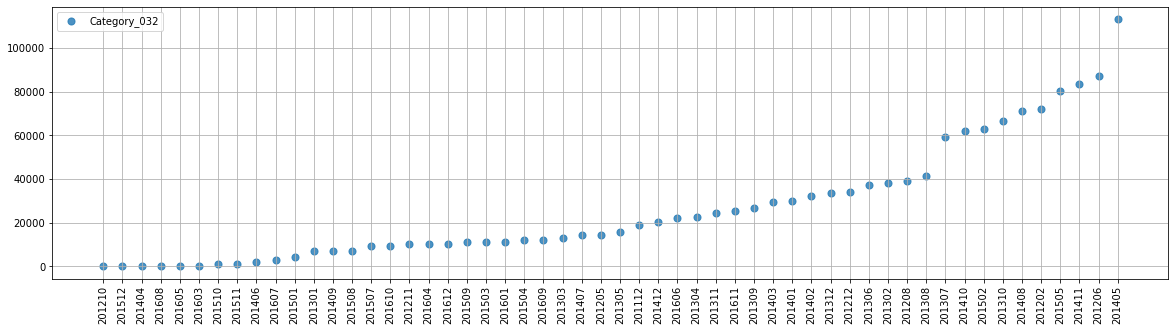

In [4]:
categories = df.Product_Category.unique()
region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict
    
for region, category_obj  in region_dict.items():
    print(region)
    for name, obj in category_obj.items():
        plt.scatter(x=obj.md_Date, y=obj.Order_Demand, s=50,label=name, alpha=0.8)
        plt.legend()
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.show()  

In [4]:
categories = df.Product_Category.unique()
region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict

In [5]:
from scipy import stats
s=0
indices = []
for region, category_obj in region_dict.items():
    print(region.upper(),'\n')
    print('Category Name\tPrevious\tLater\tOutliers\tMax Threshold')
    for name, obj in category_obj.items():
        prev = len(obj.Order_Demand)
        obj = obj[(np.abs(stats.zscore(obj.Order_Demand)) < 1.5)]
   
        
        indices.extend(obj.index)
        lat = len(obj.Order_Demand)
        print('{0}\t{1}\t\t{2}\t  {3}'.format(name,prev,lat,prev-lat))
        region_dict[region][name] = obj
        s+= prev-lat
    print()

print('Total Outliers:',s)

EAST 

Category Name	Previous	Later	Outliers	Max Threshold
Category_001	30		26	  4
Category_003	61		54	  7
Category_005	60		50	  10
Category_006	63		53	  10
Category_007	62		55	  7
Category_008	46		42	  4
Category_009	61		53	  8
Category_010	60		56	  4
Category_011	60		57	  3
Category_012	47		44	  3
Category_013	61		55	  6
Category_015	61		54	  7
Category_016	7		6	  1
Category_017	60		55	  5
Category_018	60		50	  10
Category_019	61		56	  5
Category_021	62		55	  7
Category_022	60		56	  4
Category_023	61		57	  4
Category_024	61		56	  5
Category_026	60		53	  7
Category_027	14		13	  1
Category_028	62		57	  5
Category_029	60		56	  4
Category_031	60		53	  7

NORTH 

Category Name	Previous	Later	Outliers	Max Threshold
Category_001	62		58	  4
Category_003	60		51	  9
Category_005	62		58	  4
Category_006	62		57	  5
Category_007	63		57	  6
Category_008	60		53	  7
Category_009	61		55	  6
Category_010	45		43	  2
Category_011	62		54	  8
Category_012	28		25	  3
Category_013	60		52	  8
Category_015	61

In [6]:
df = df[df.index.isin(indices)]
df
df.shape

(4544, 5)

In [7]:
categories = df.Product_Category.unique()

region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict
  

In [8]:
df.to_csv('a12.csv')

In [9]:
df.shape

(4544, 5)

In [10]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25,75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [11]:
categories = df.Product_Category.unique()

region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict

In [12]:
from scipy import stats
s=0
indices = []
for region, category_obj in region_dict.items():
    print(region.upper(),'\n')
    print('Category Name\tPrevious\tLater\tOutliers')
    for name, obj in category_obj.items():
        prev = len(obj.Order_Demand)
        a=outliers_iqr(obj.Order_Demand)
        indices.append(a)
        obj=obj.drop(obj.index[a])
        lat = len(obj.Order_Demand)
        print('{0}\t{1}\t\t{2}\t  {3}'.format(name,prev,lat,prev-lat))
        region_dict[region][name] = obj
        s+= prev-lat
    print()

print('Total Outliers:',s)

EAST 

Category Name	Previous	Later	Outliers
Category_001	26		25	  1
Category_003	54		54	  0
Category_005	50		50	  0
Category_006	53		53	  0
Category_007	55		55	  0
Category_008	42		40	  2
Category_009	53		53	  0
Category_010	56		53	  3
Category_011	57		57	  0
Category_012	44		37	  7
Category_013	55		55	  0
Category_015	54		53	  1
Category_016	6		4	  2
Category_017	55		52	  3
Category_018	50		50	  0
Category_019	56		56	  0
Category_021	55		55	  0
Category_022	56		56	  0
Category_023	57		57	  0
Category_024	56		56	  0
Category_026	53		53	  0
Category_027	13		13	  0
Category_028	57		56	  1
Category_029	56		56	  0
Category_031	53		53	  0

NORTH 

Category Name	Previous	Later	Outliers
Category_001	58		58	  0
Category_003	51		51	  0
Category_005	58		58	  0
Category_006	57		57	  0
Category_007	57		57	  0
Category_008	53		52	  1
Category_009	55		55	  0
Category_010	43		41	  2
Category_011	54		51	  3
Category_012	25		23	  2
Category_013	52		52	  0
Category_015	57		55	  2
Category_017	53		53	  

In [13]:
k=[]
for i in indices:
    for a in i:
        for j in a:
            k.append(j)
for x in k:
    df=df.drop(df.index[x])

In [14]:
df

Product_Category    Date Customer_Region  Order_Demand md_Date
2258     Category_014  201504           south             1  201504
2704     Category_018  201112           north             1  201112
2263     Category_014  201308           south             1  201308
1943     Category_012  201211            east             1  201211
2574     Category_017  201302           north             1  201302
...               ...     ...             ...           ...     ...
2894     Category_019  201501           north      52585396  201501
2845     Category_019  201310           north      53225242  201310
2878     Category_019  201611           north      54002579  201611
2956     Category_019  201403           north      54114693  201403
2849     Category_019  201410           north      54868633  201410

[4497 rows x 5 columns]

In [15]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

east


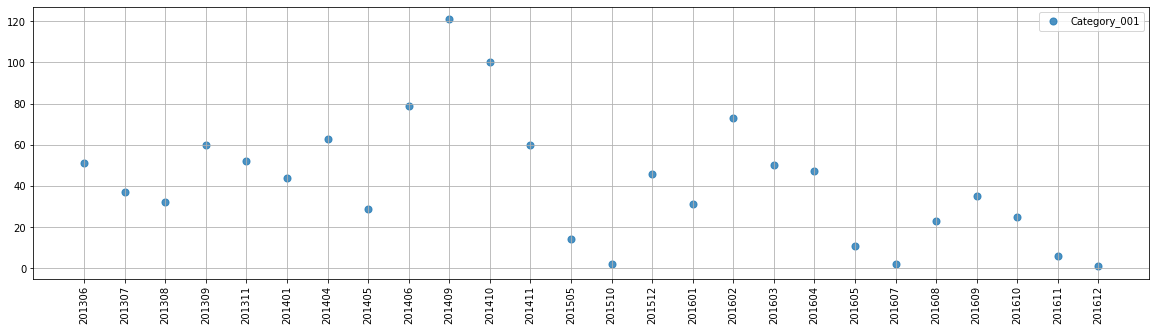

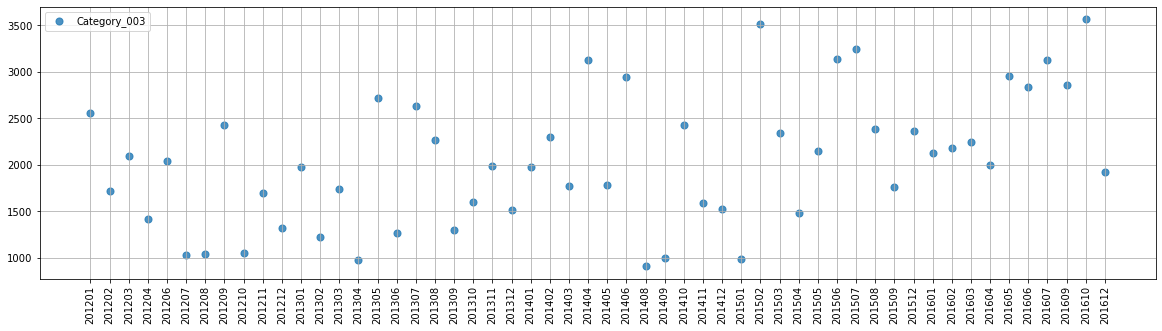

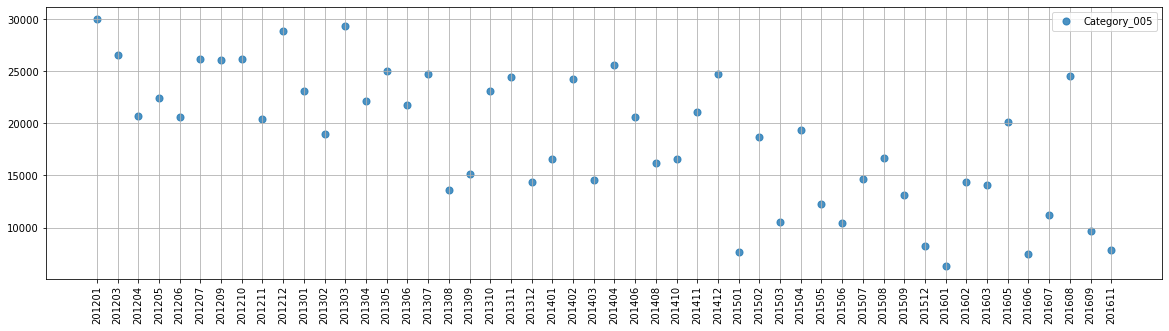

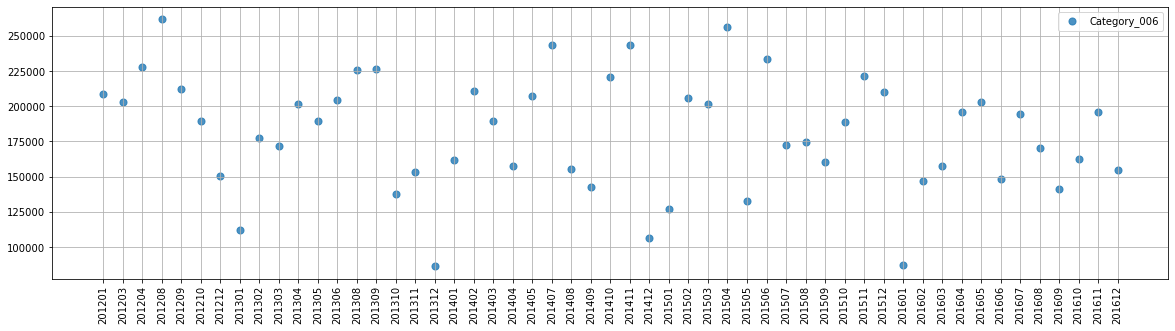

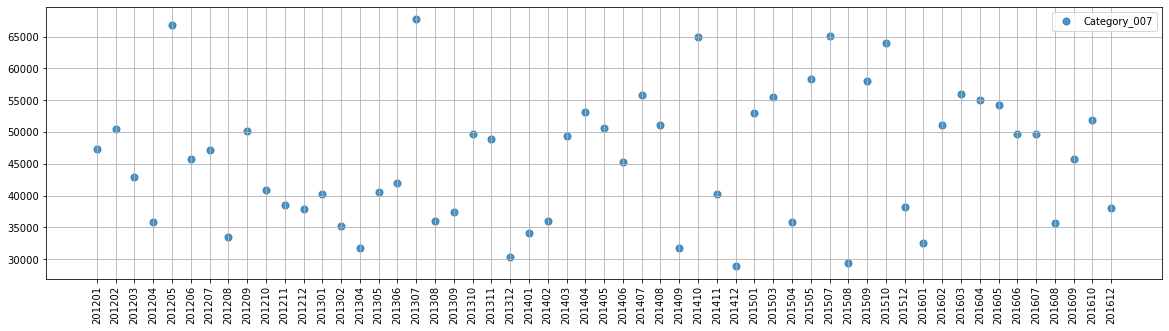

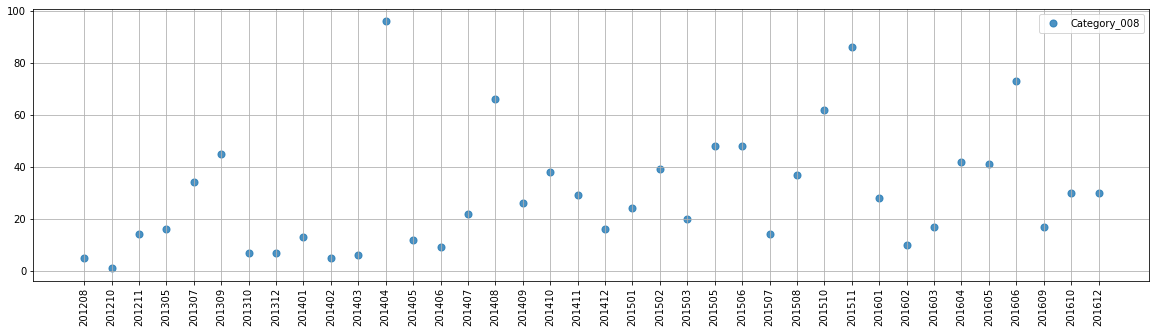

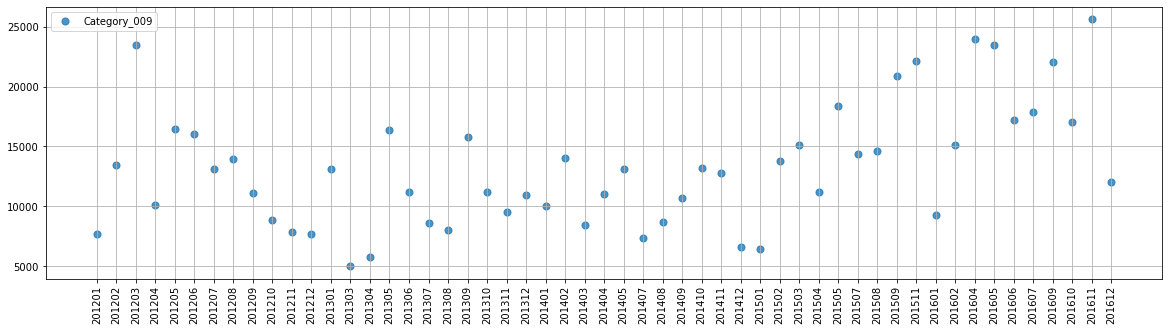

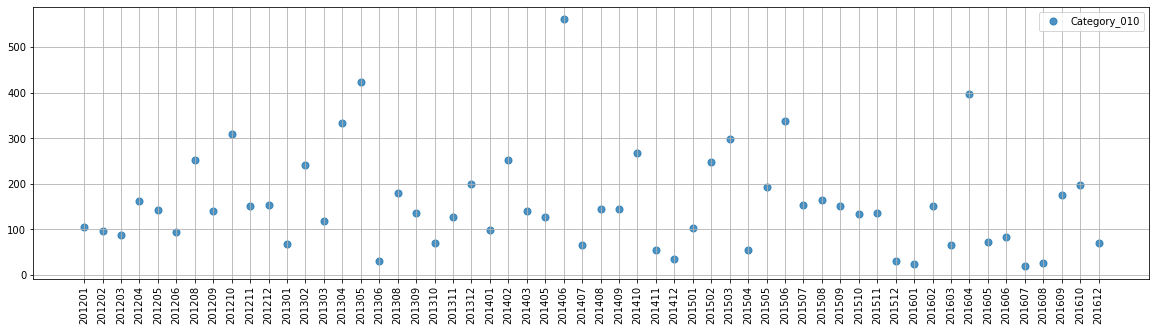

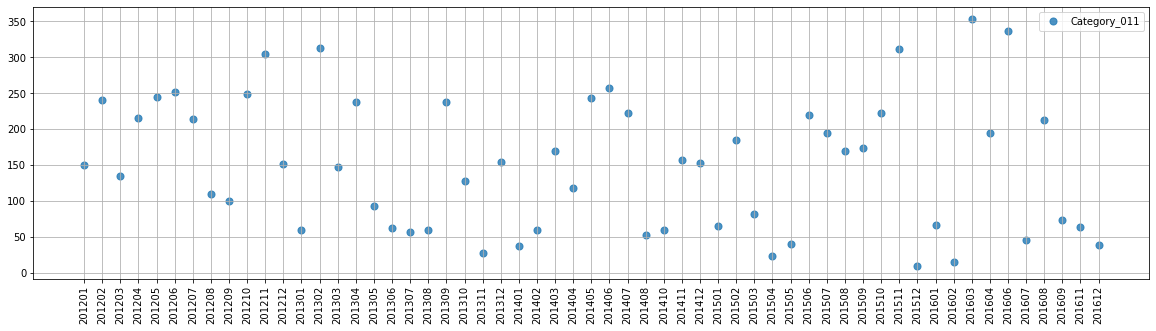

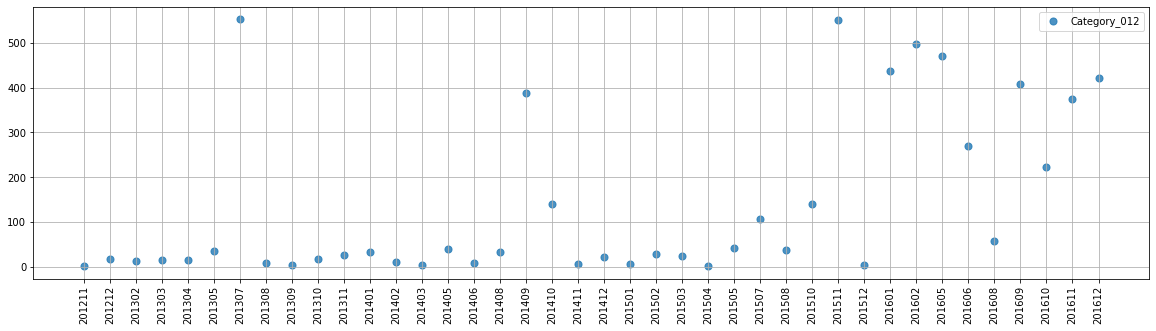

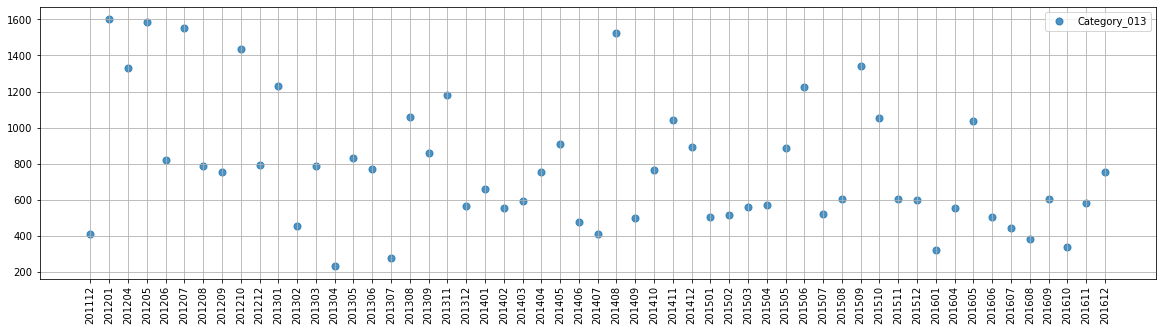

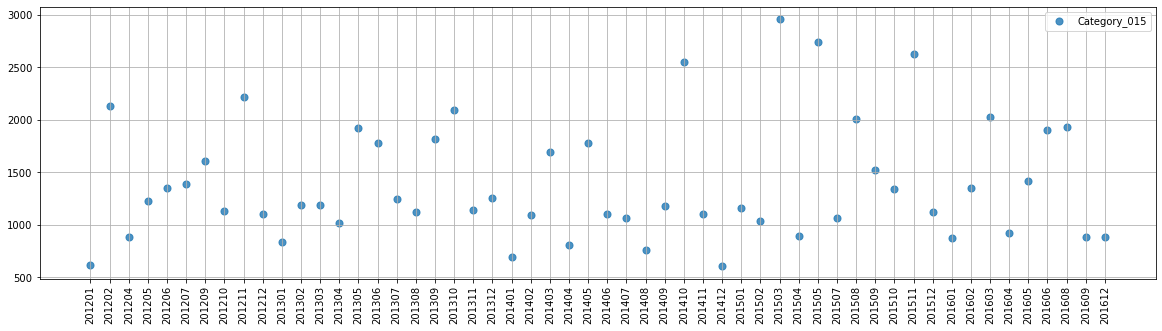

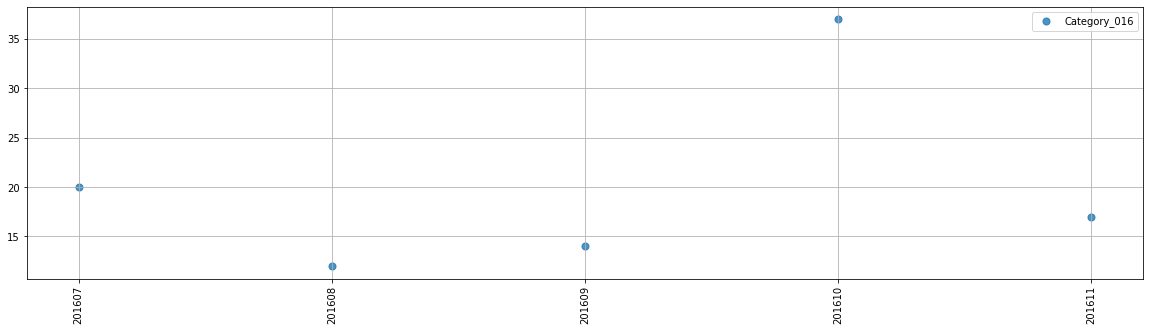

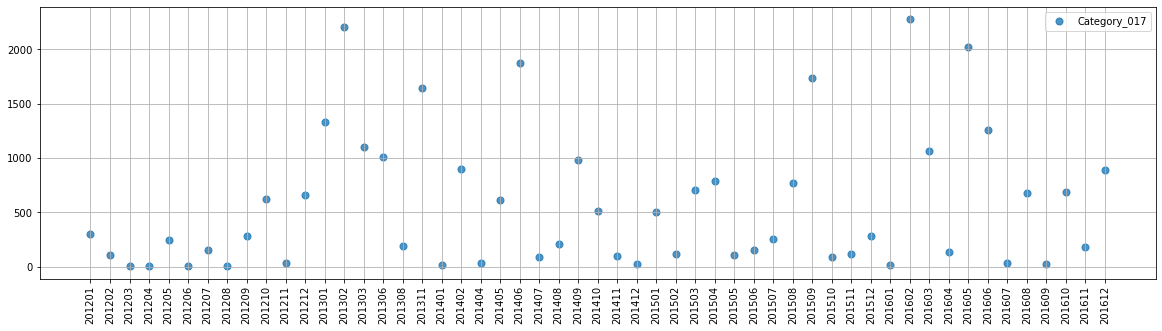

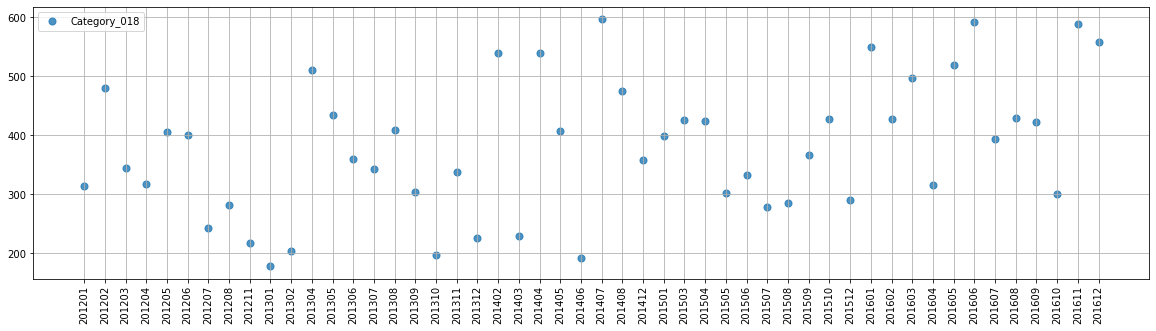

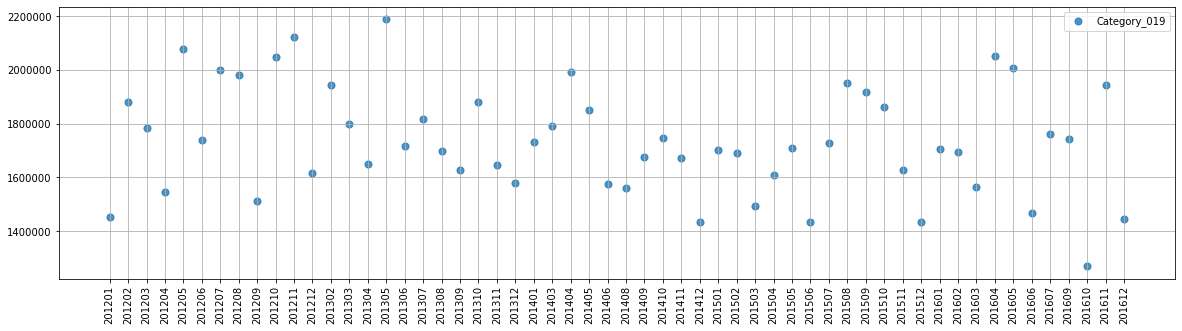

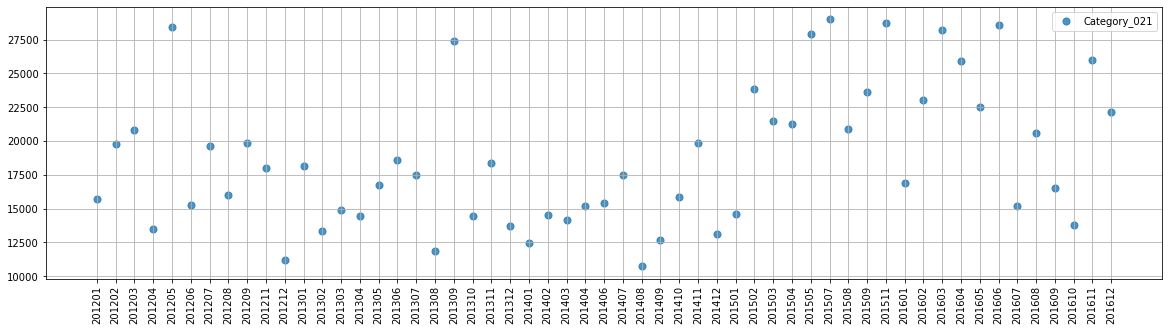

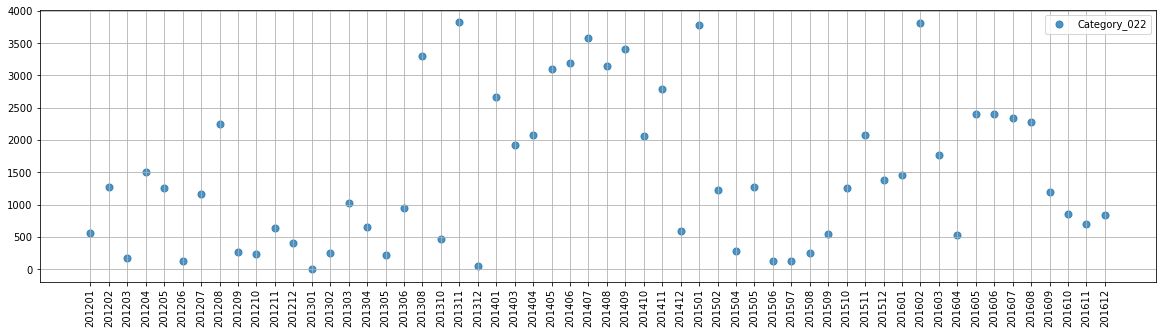

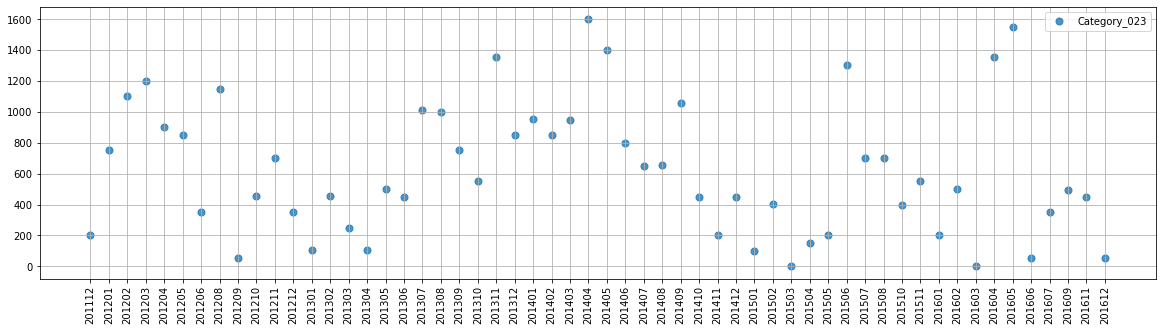

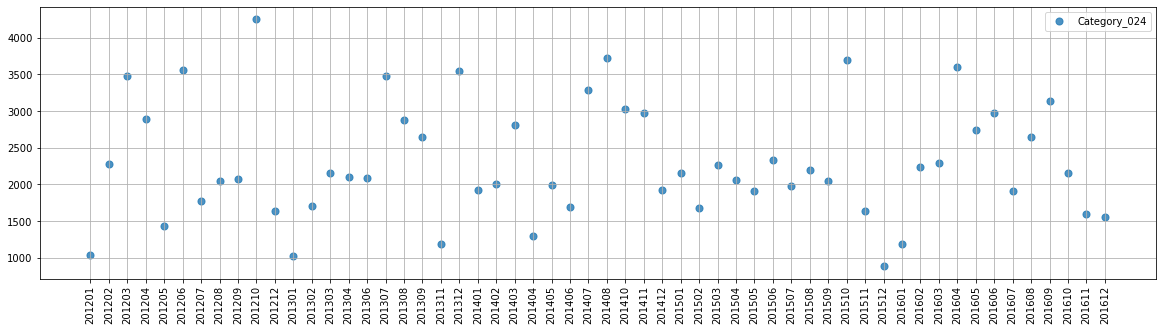

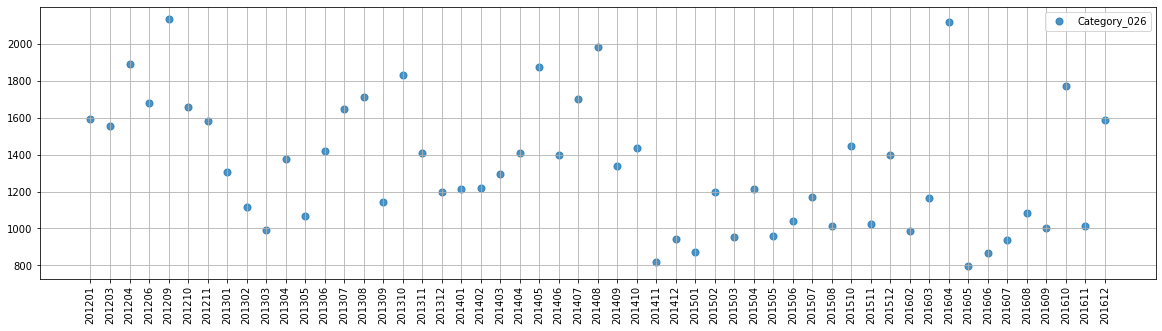

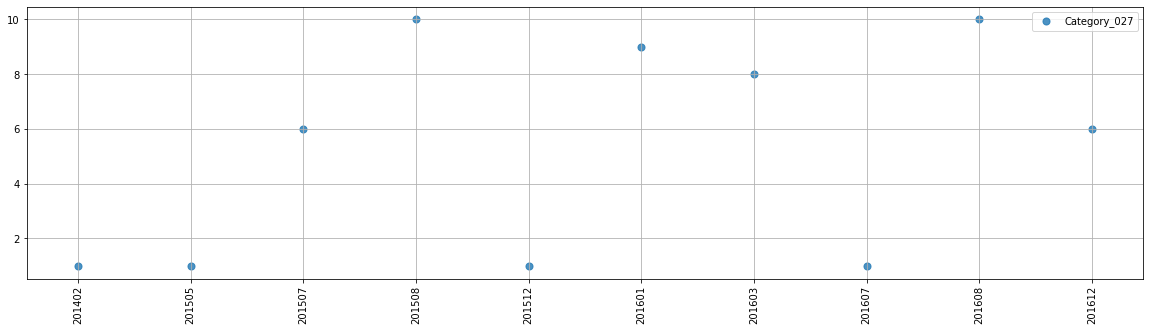

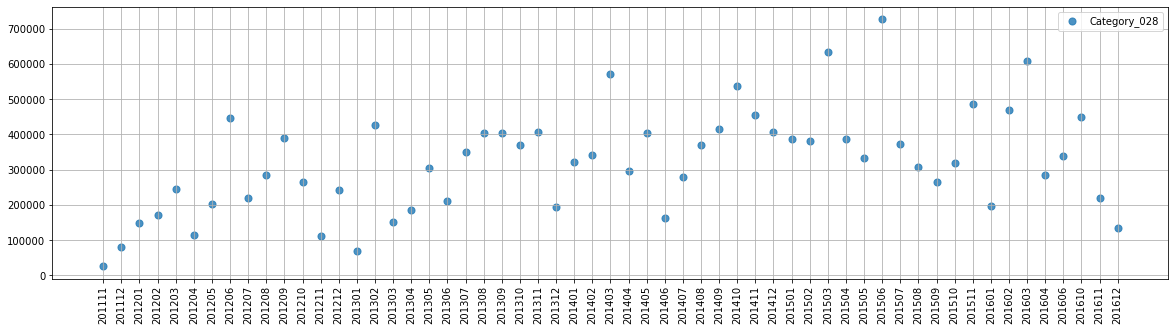

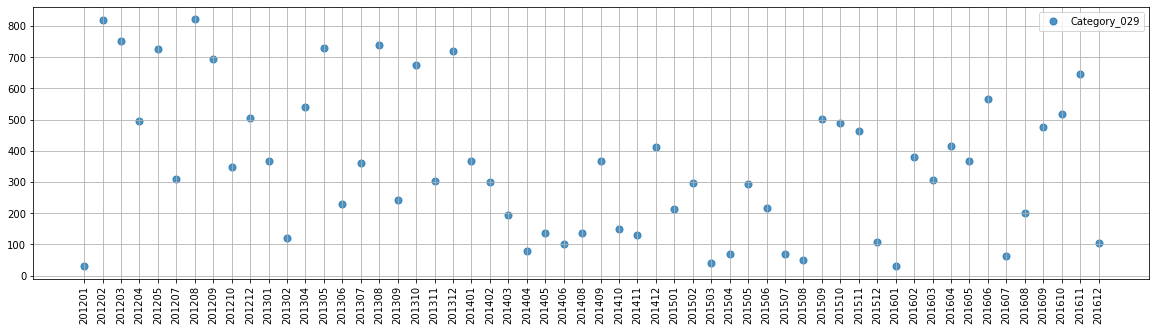

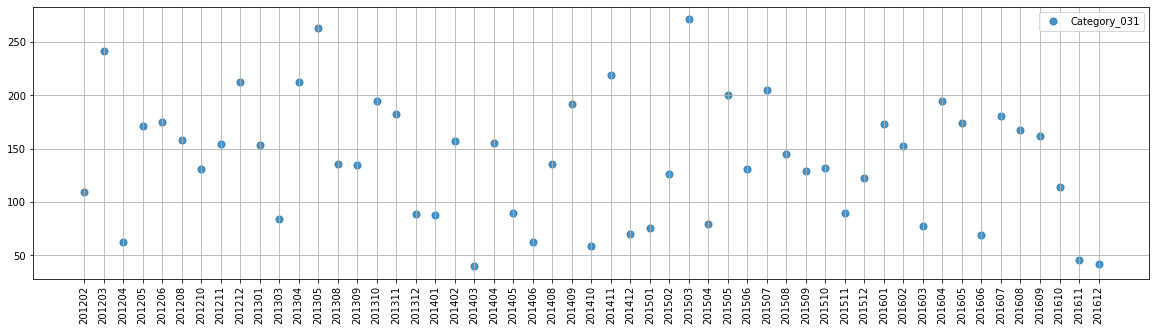

north


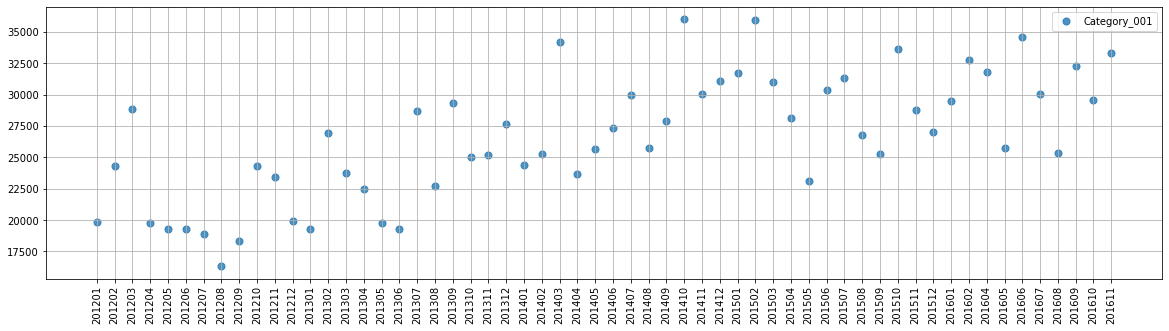

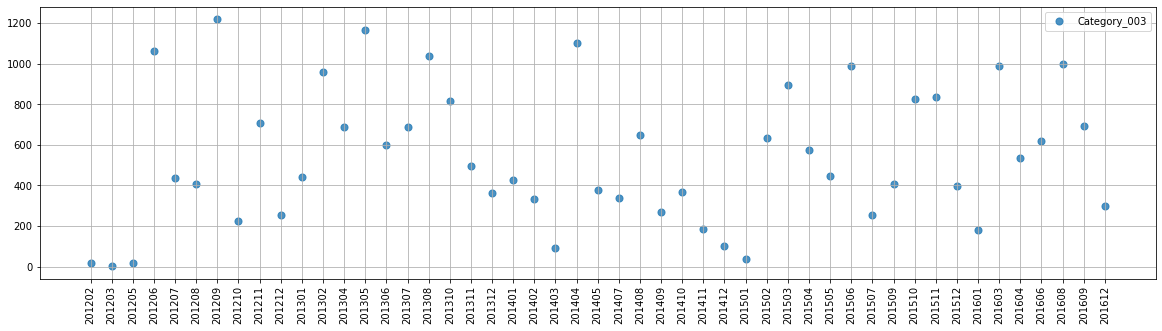

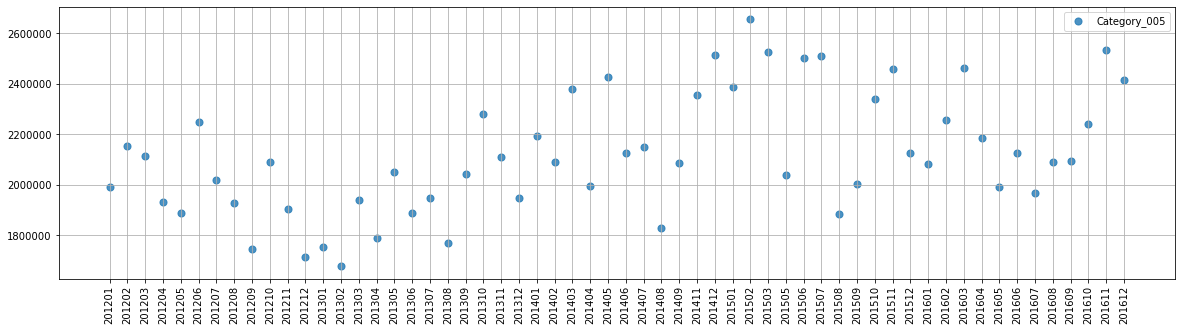

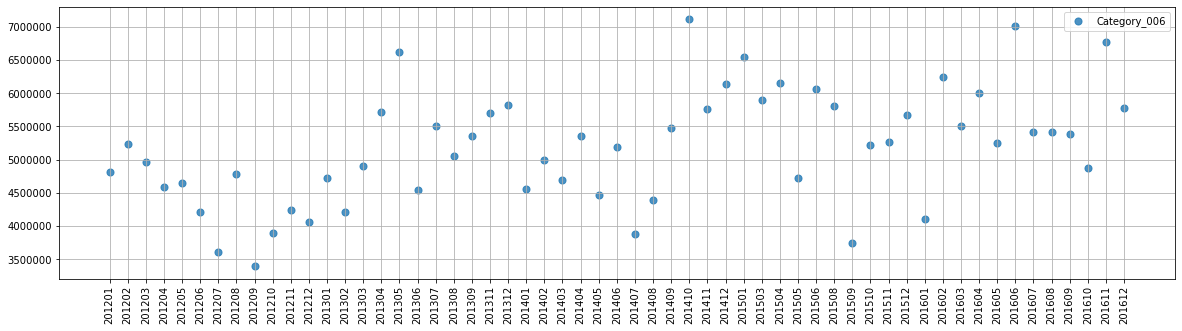

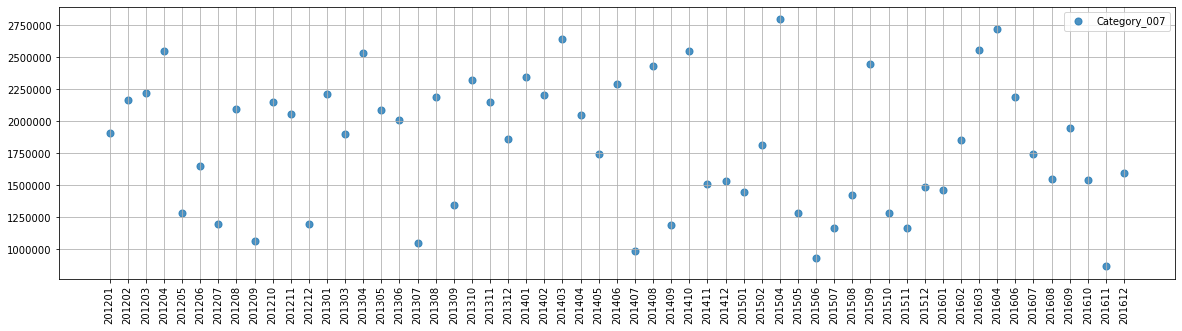

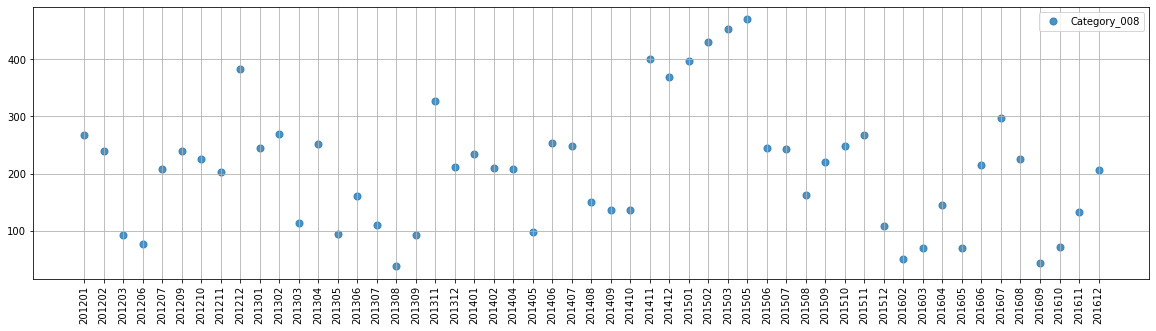

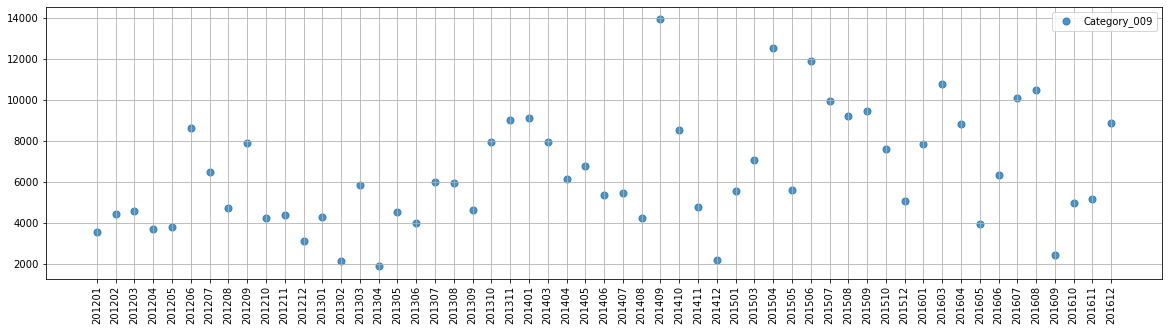

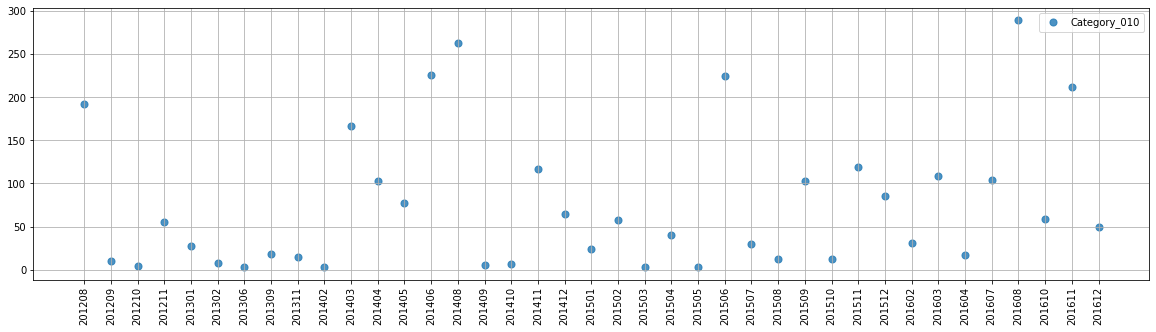

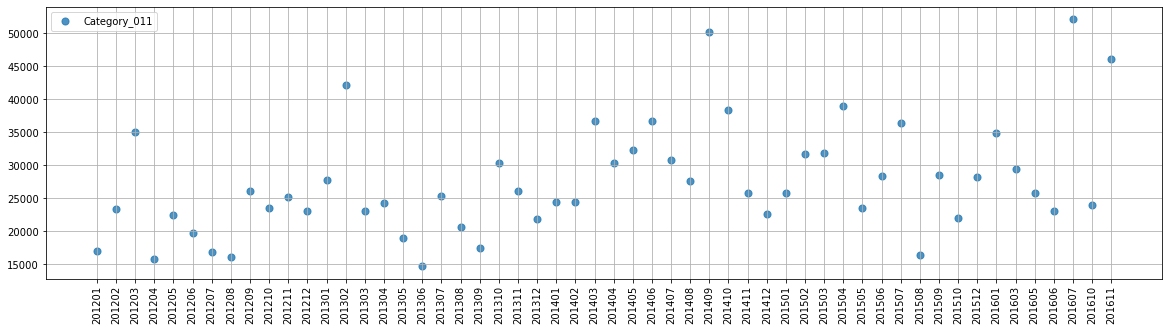

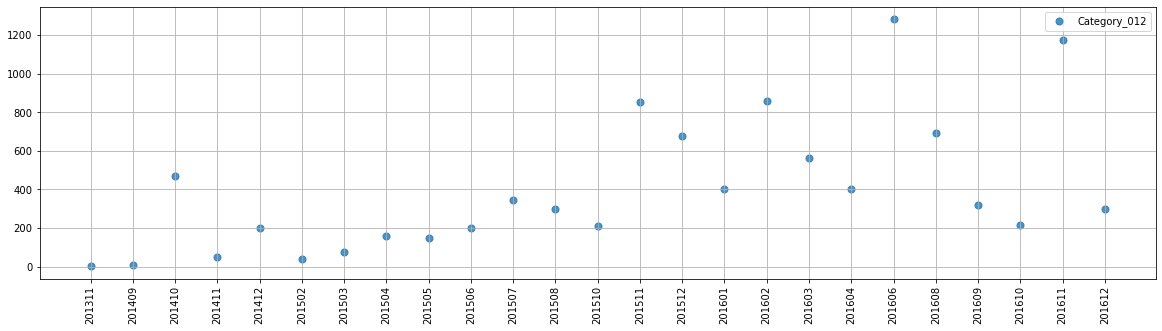

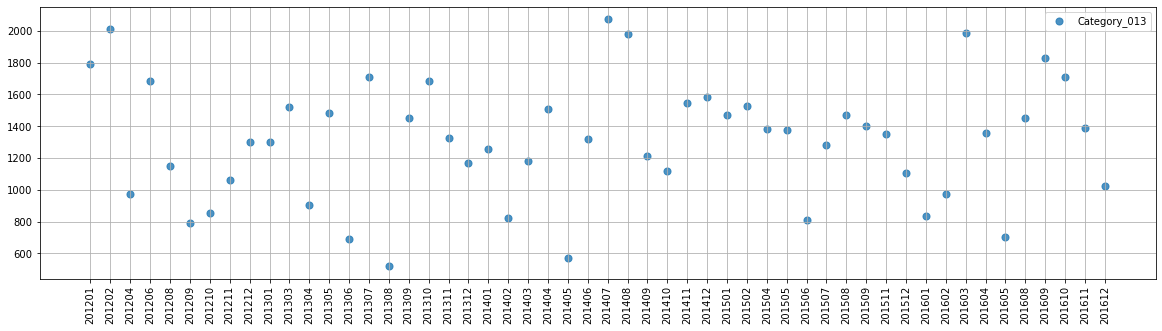

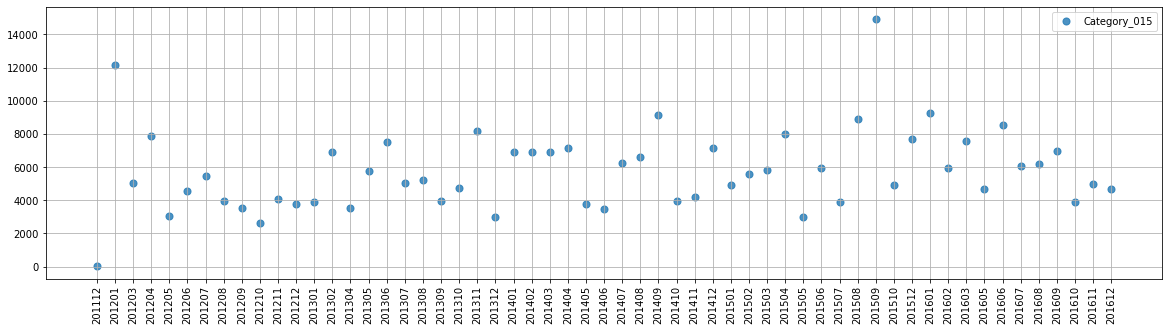

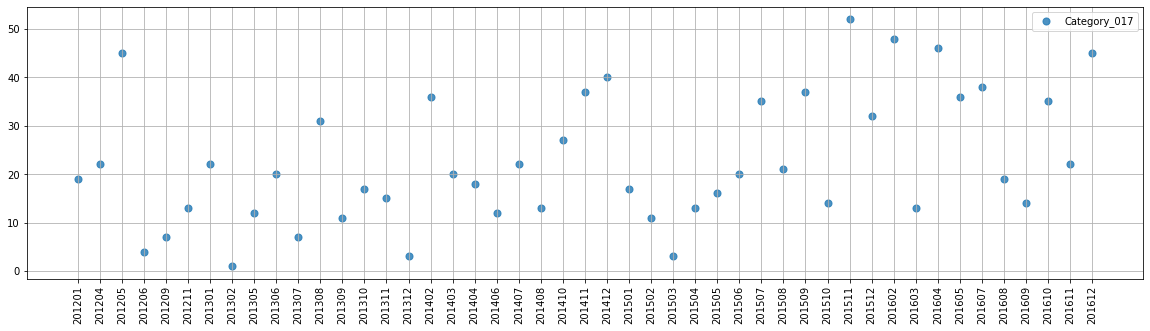

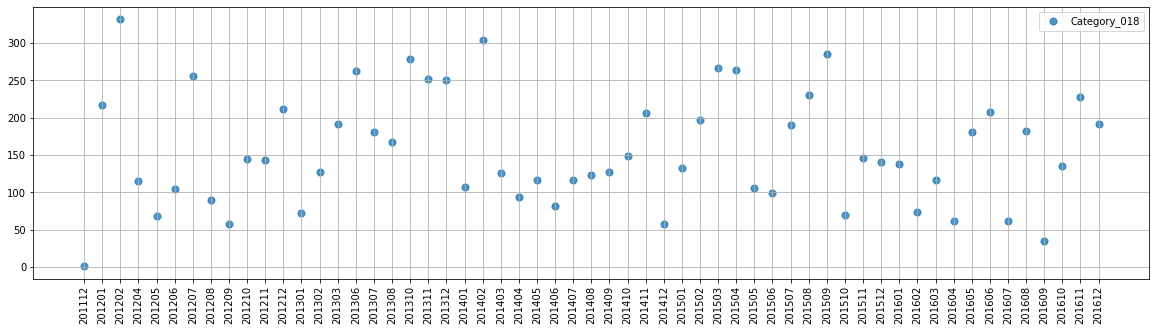

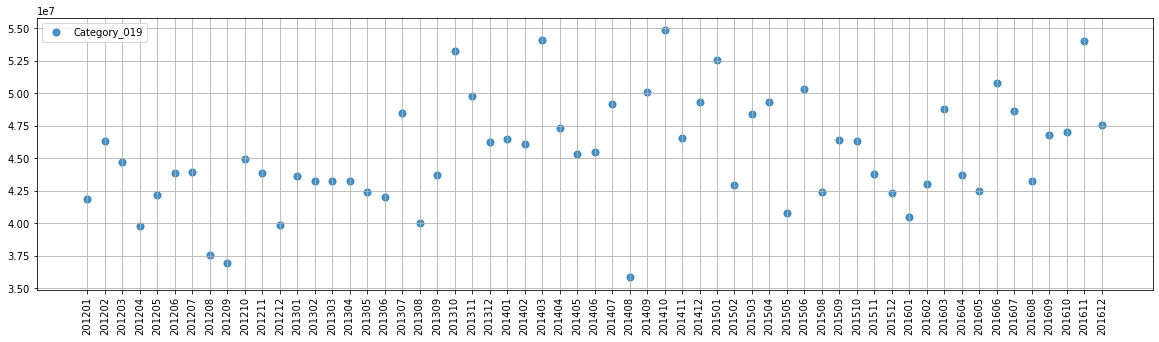

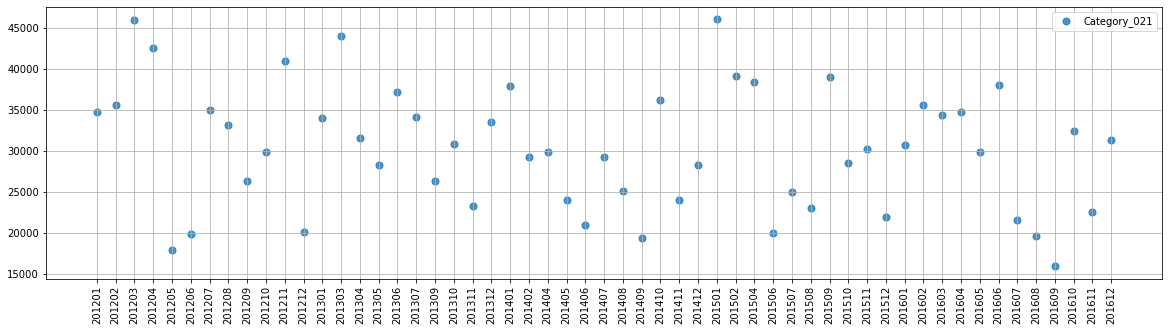

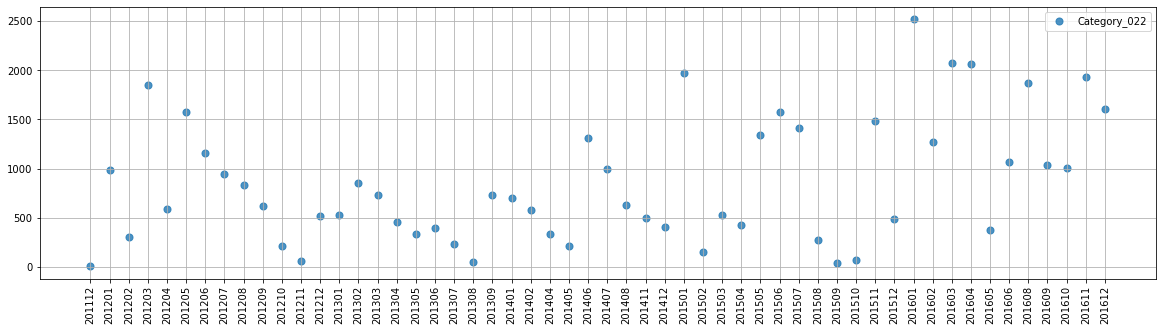

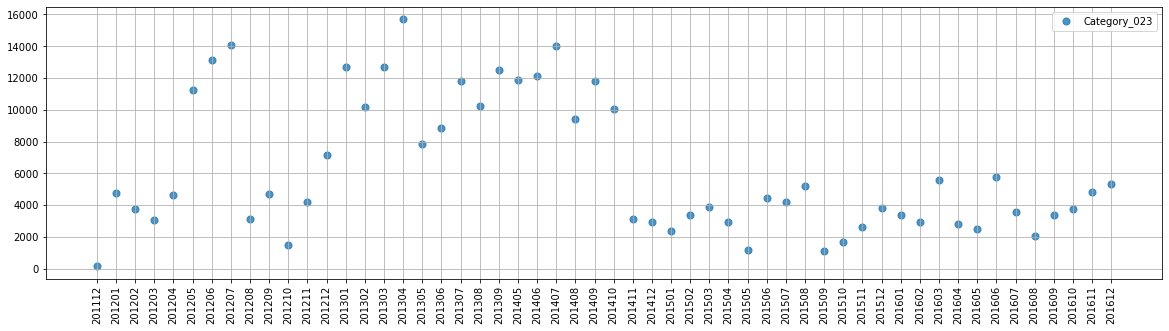

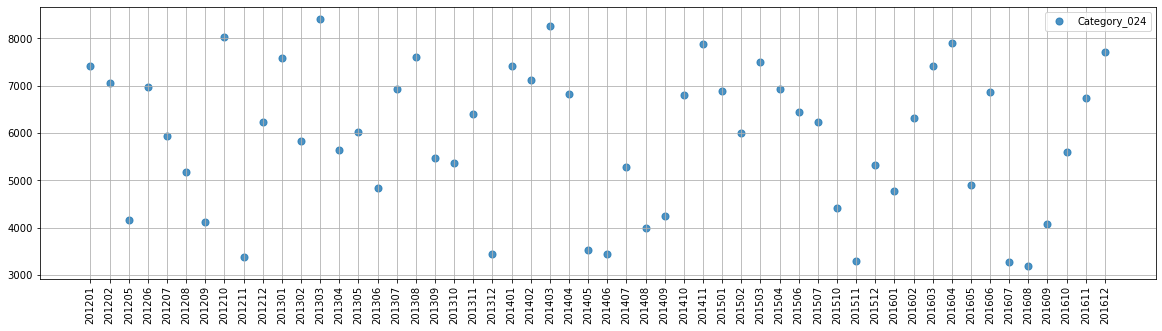

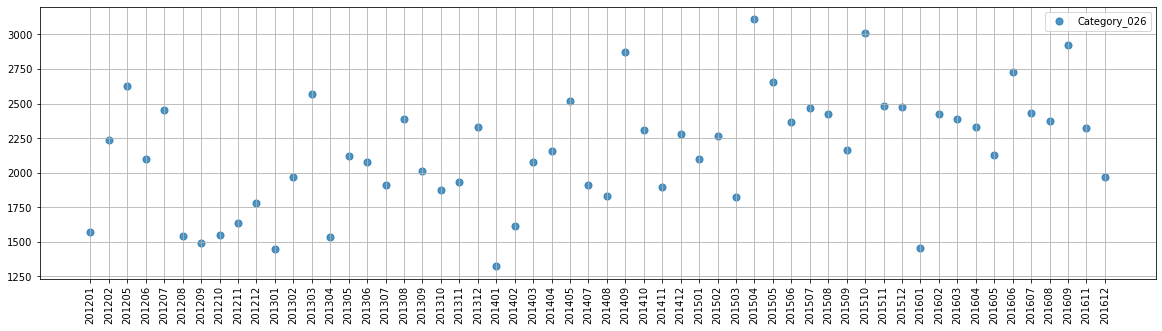

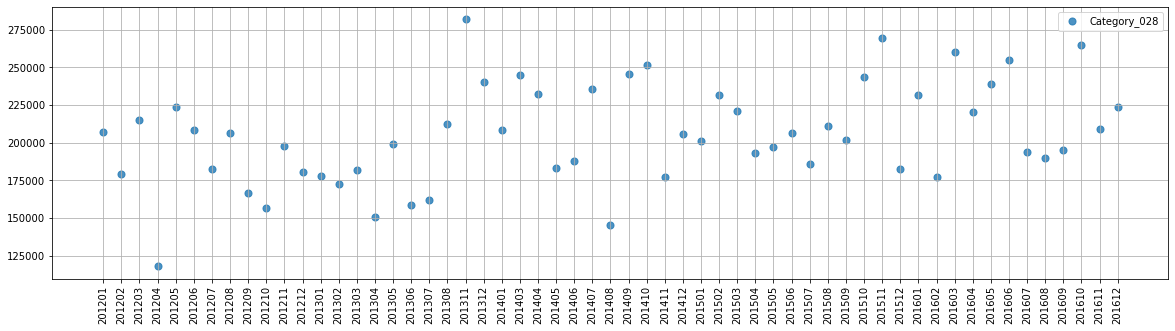

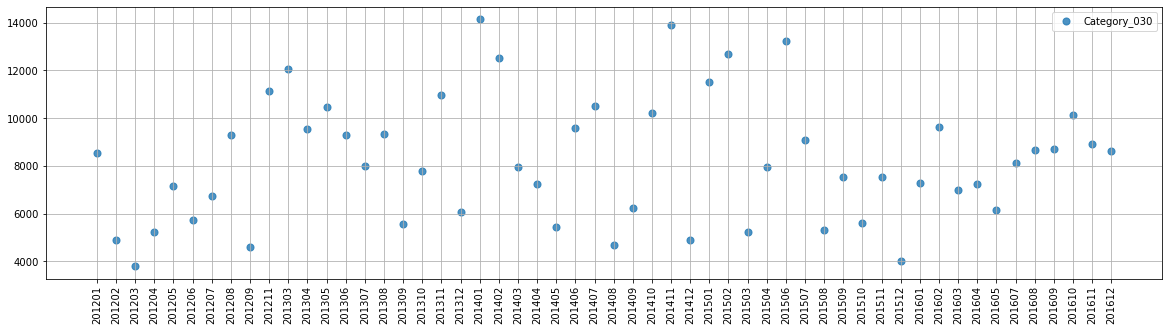

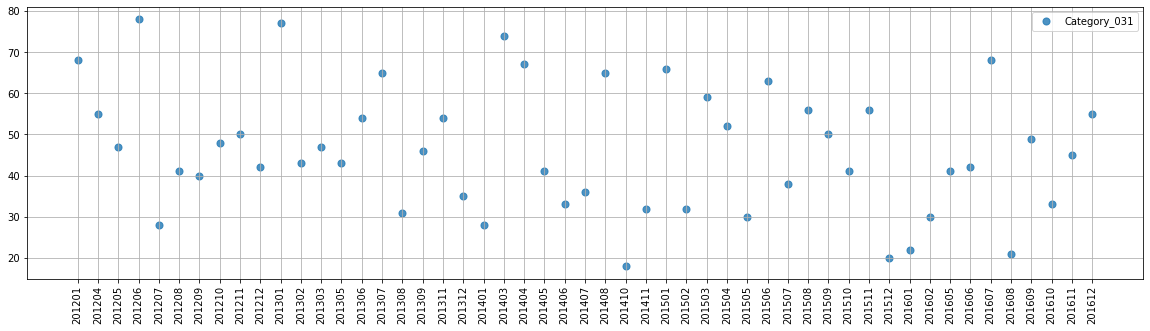

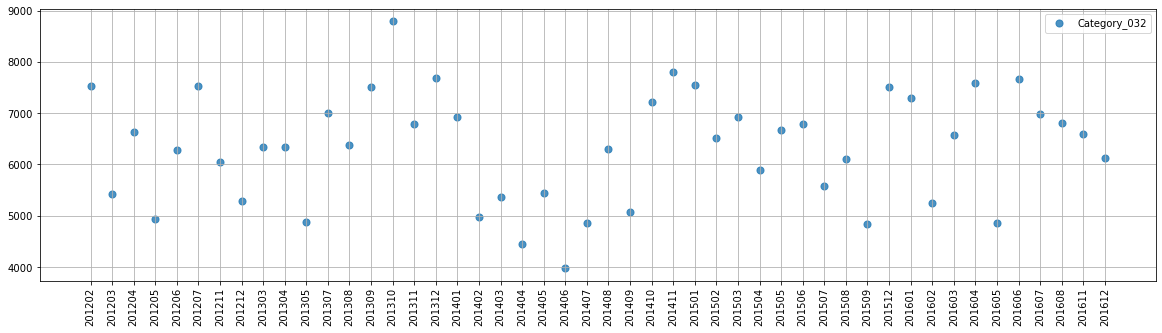

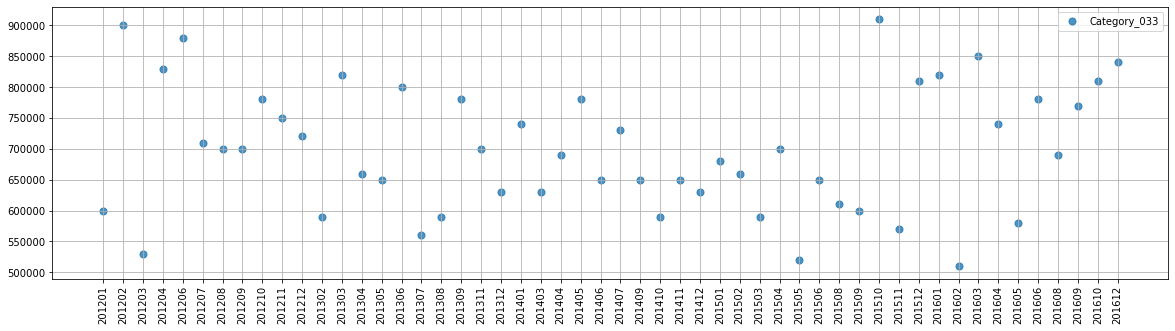

south


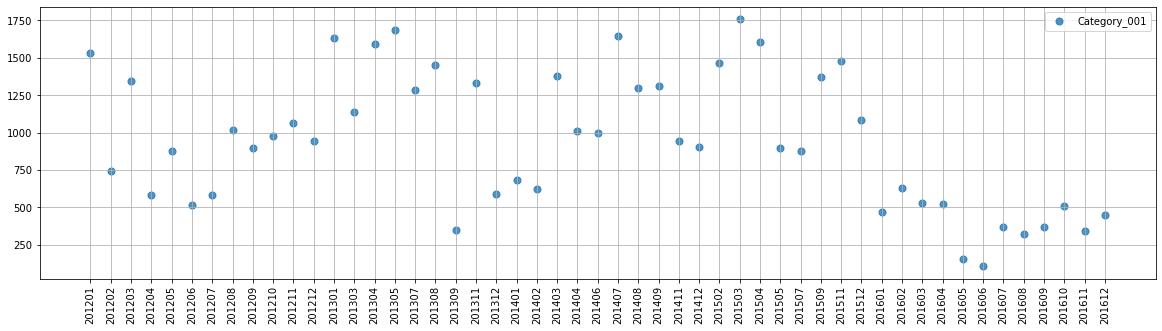

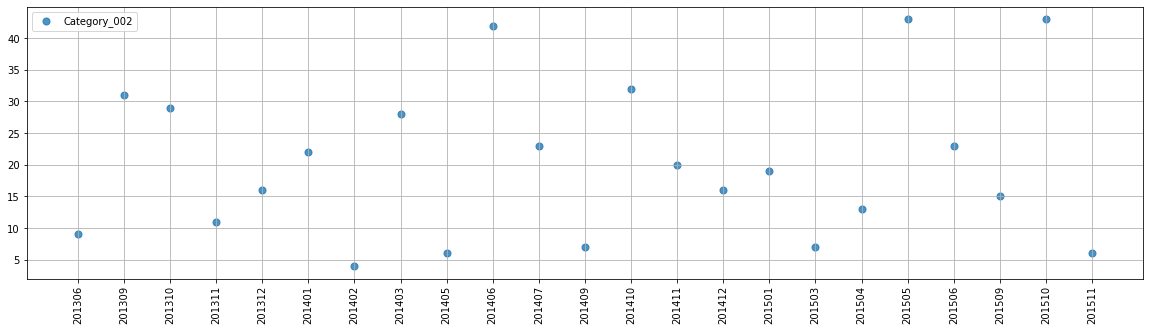

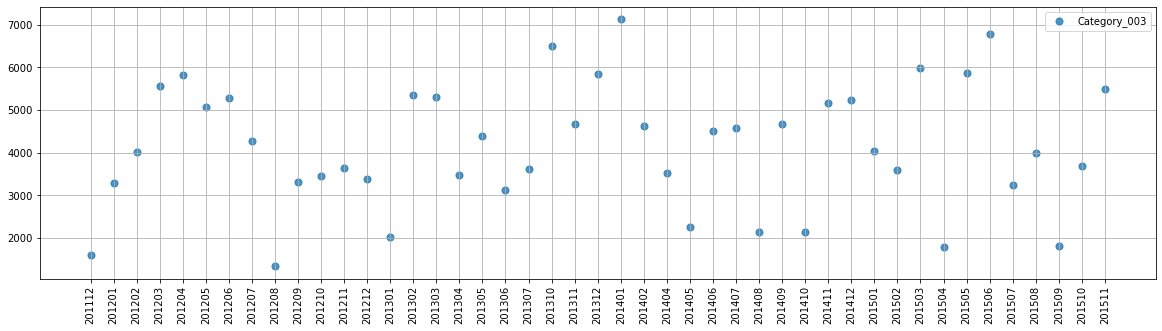

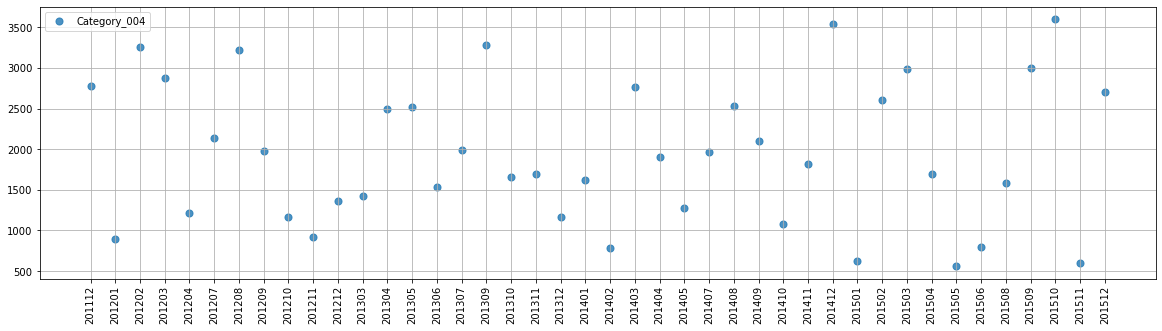

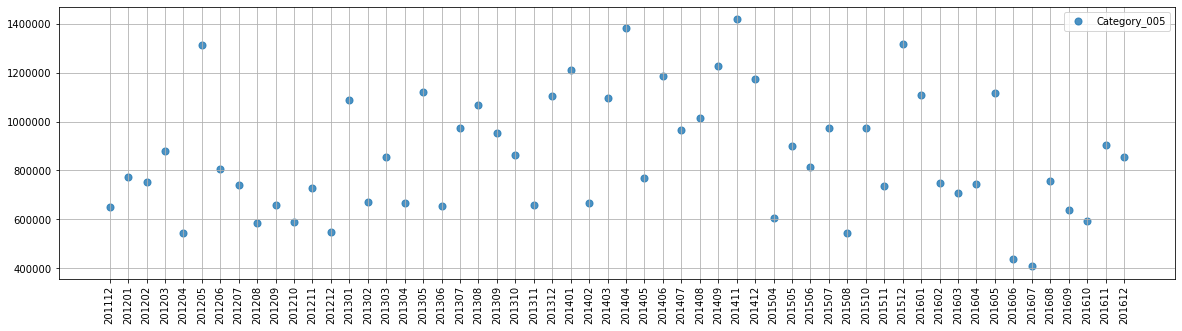

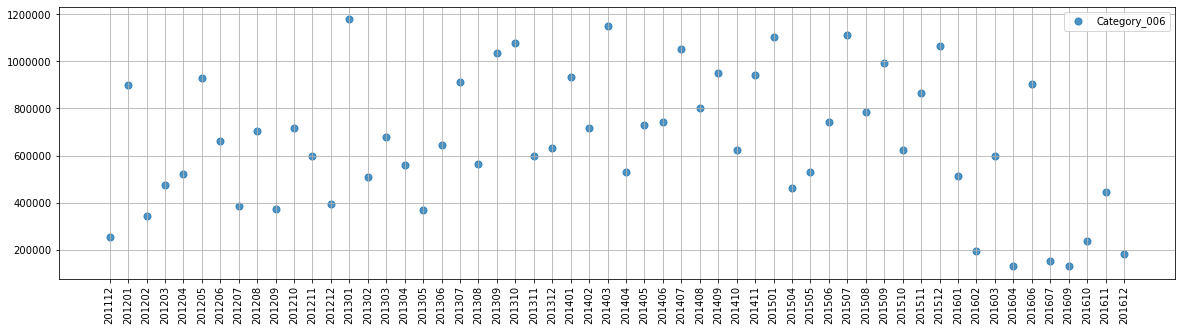

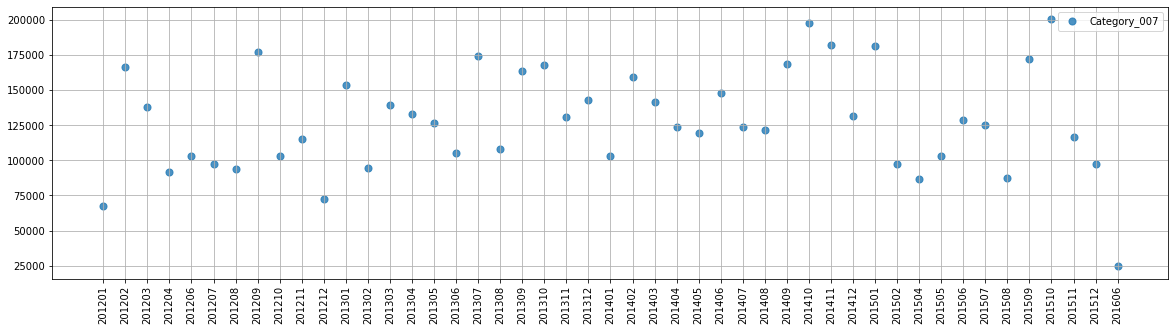

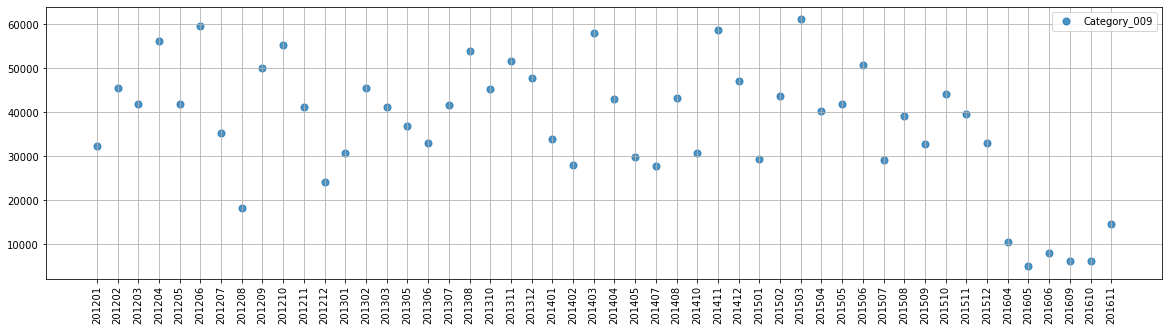

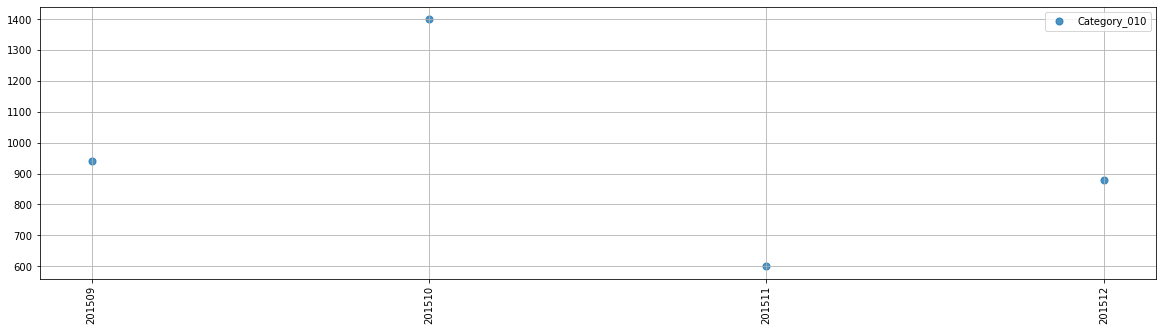

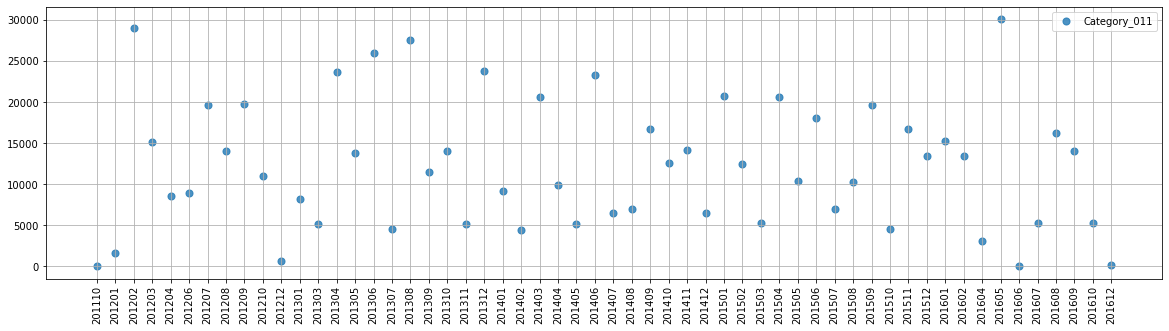

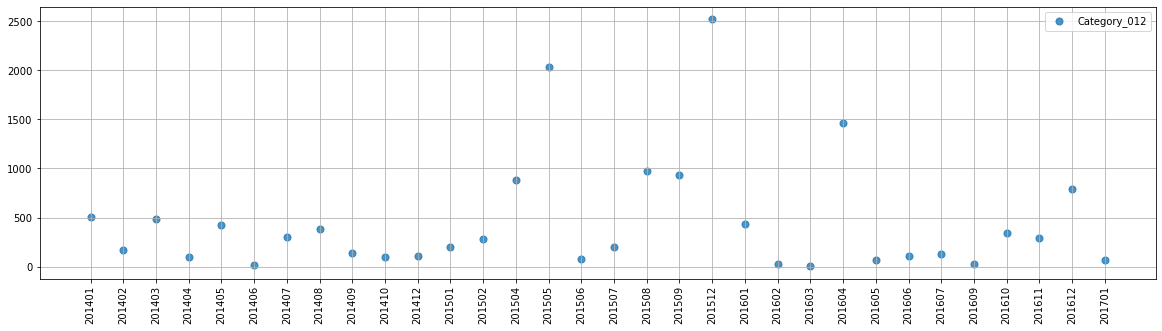

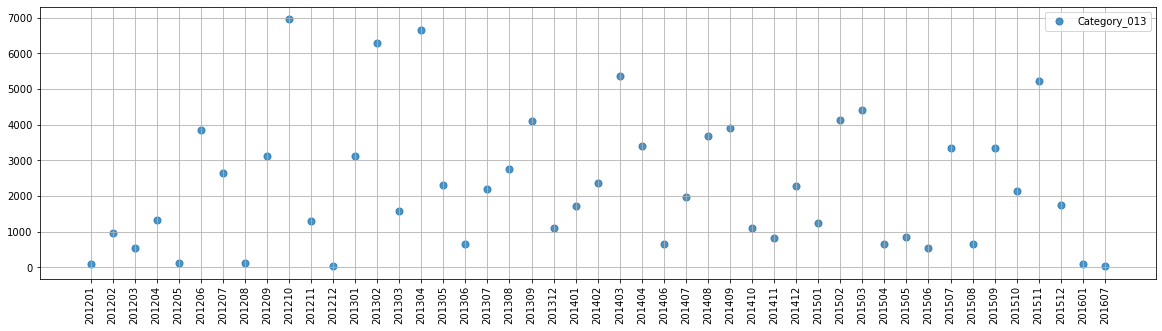

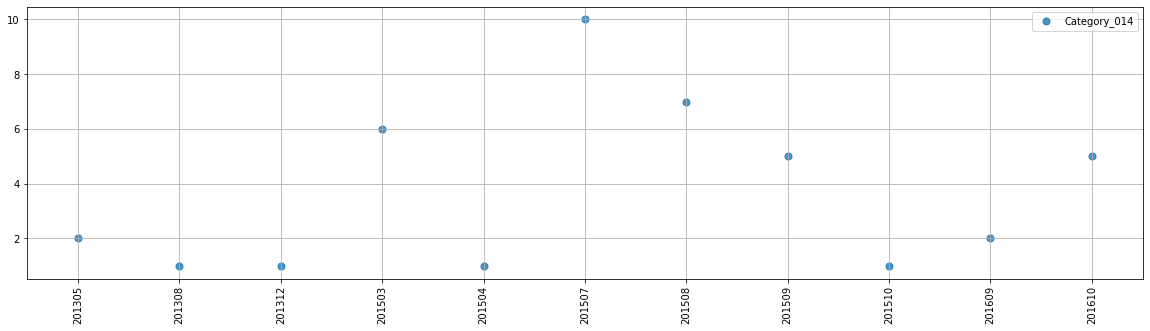

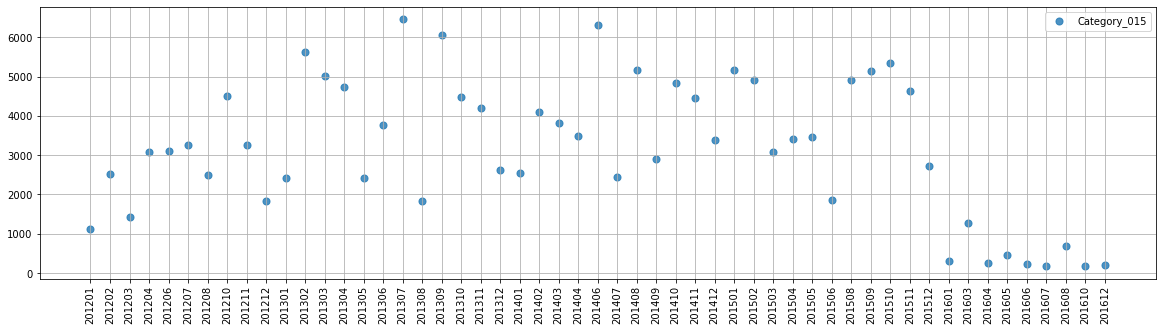

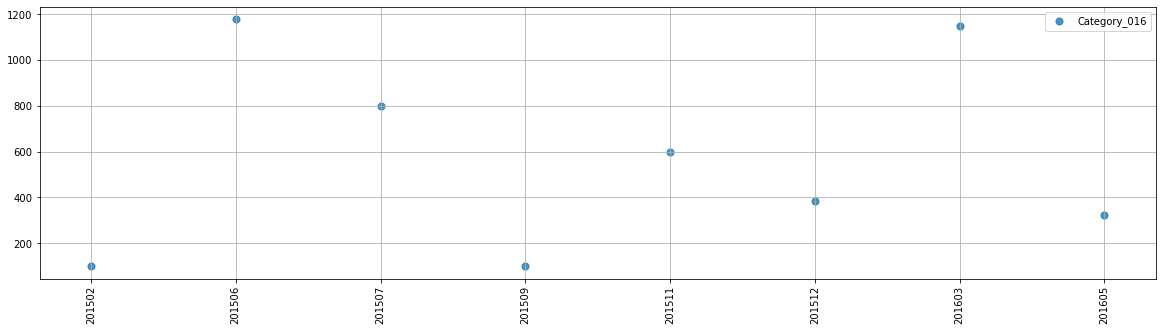

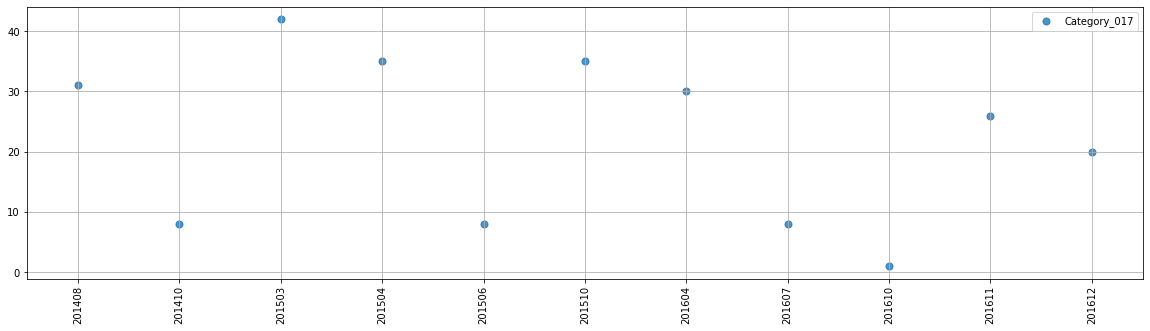

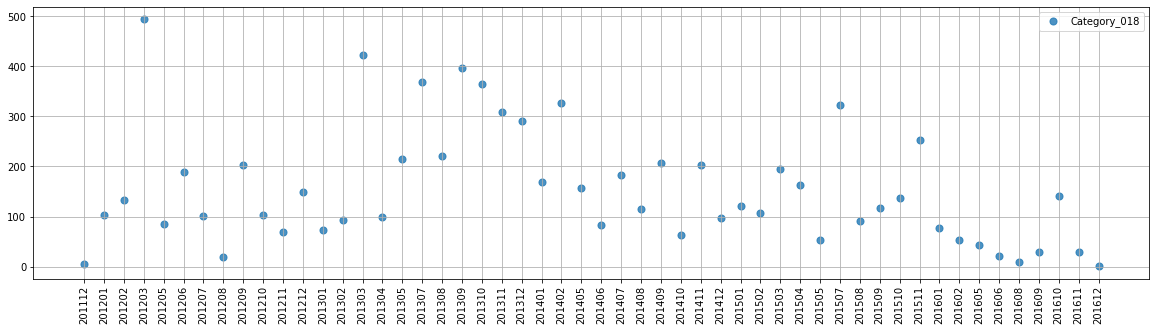

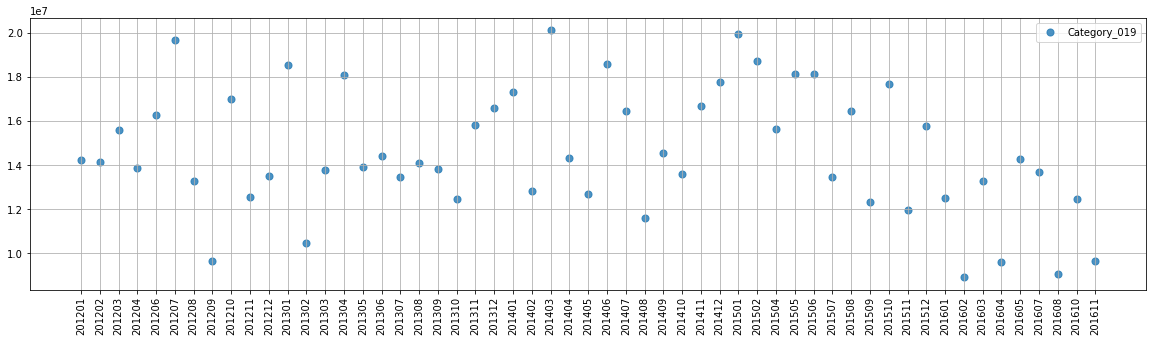

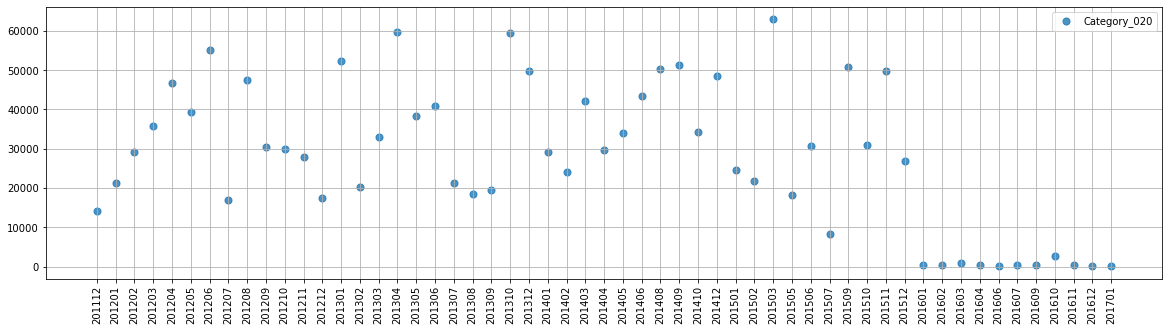

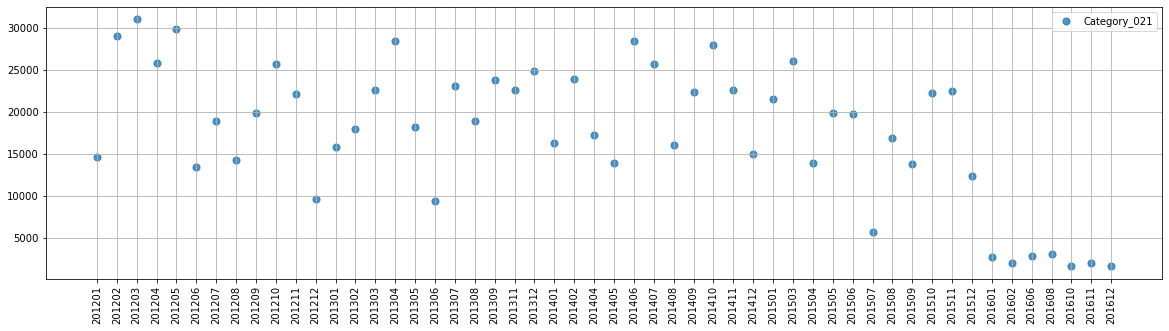

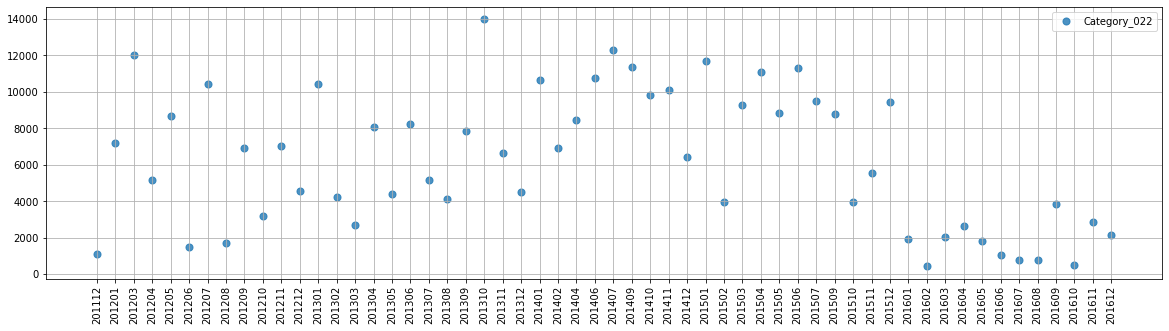

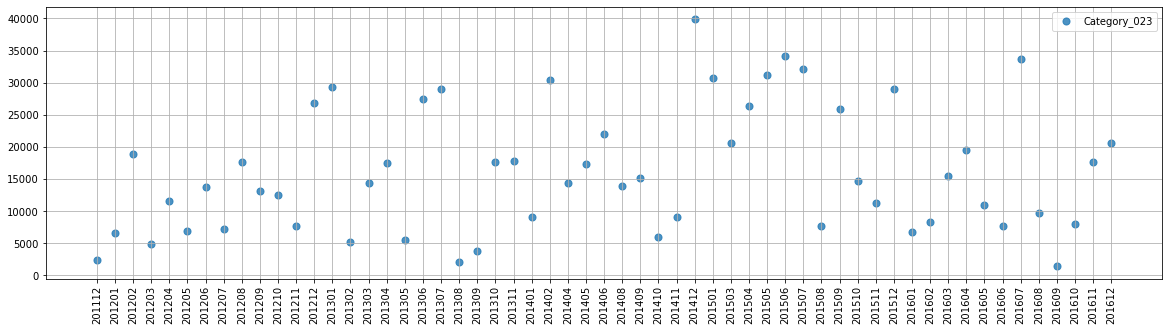

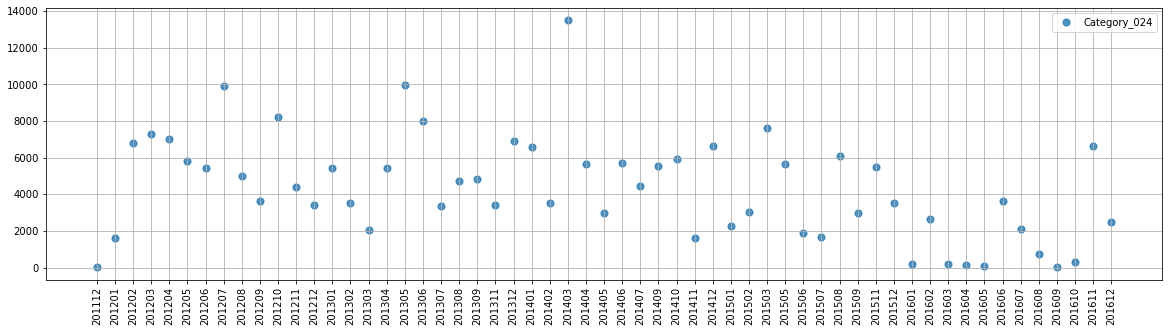

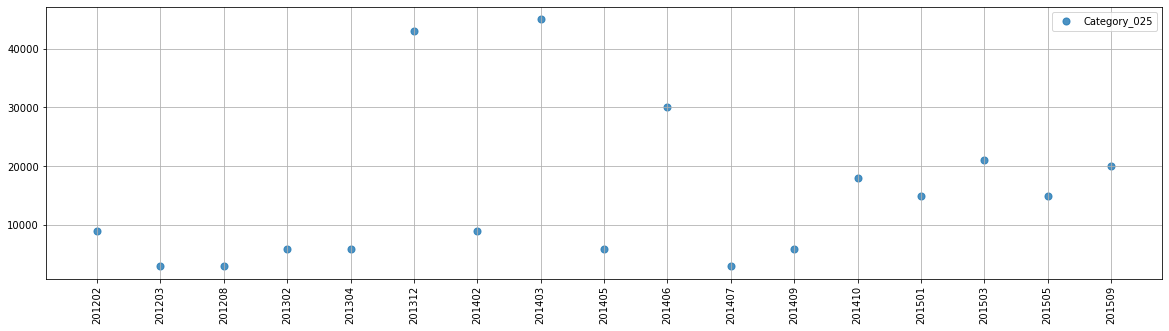

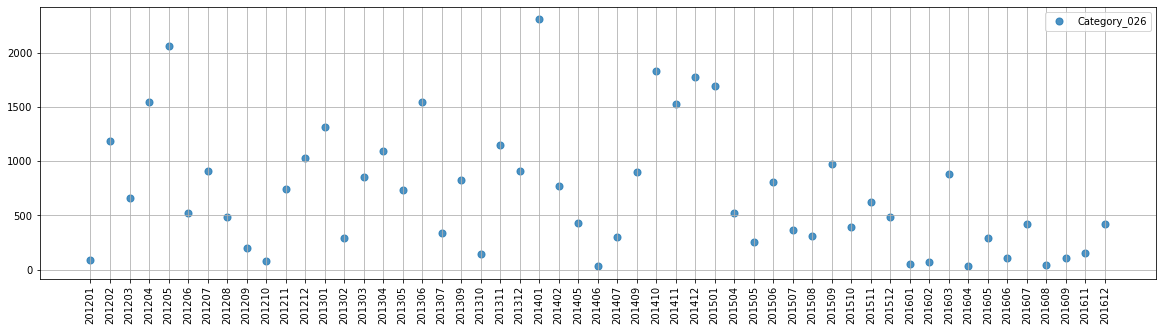

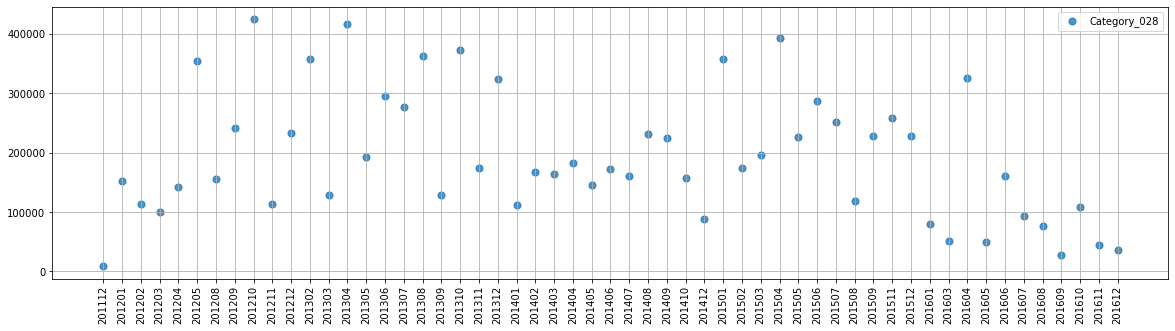

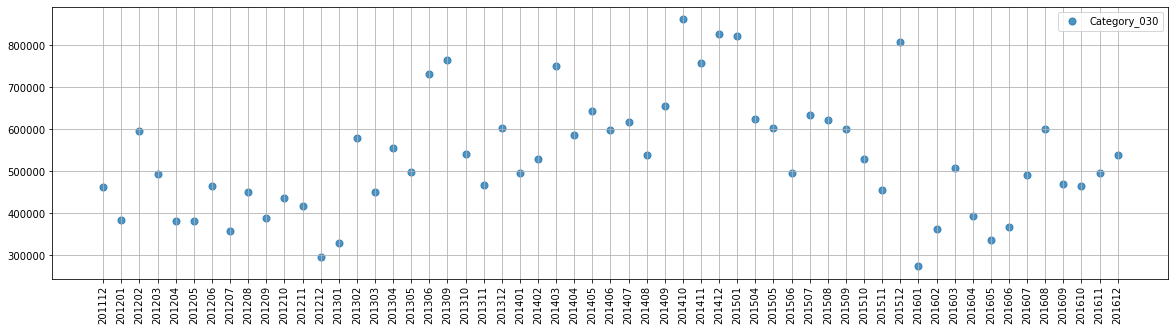

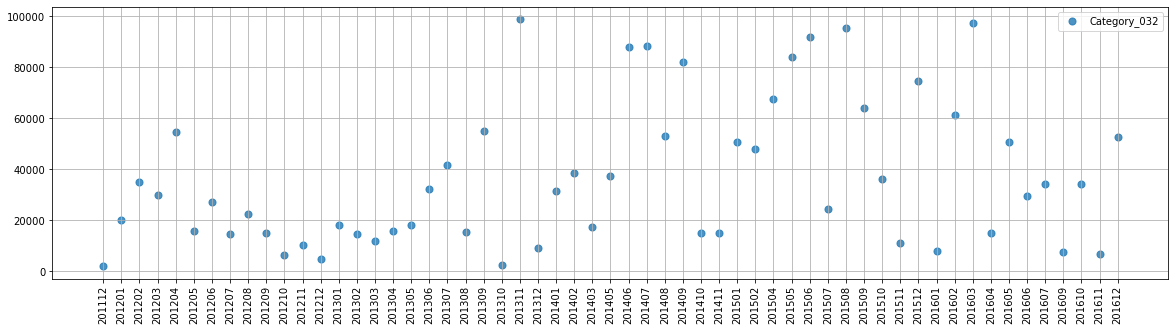

west


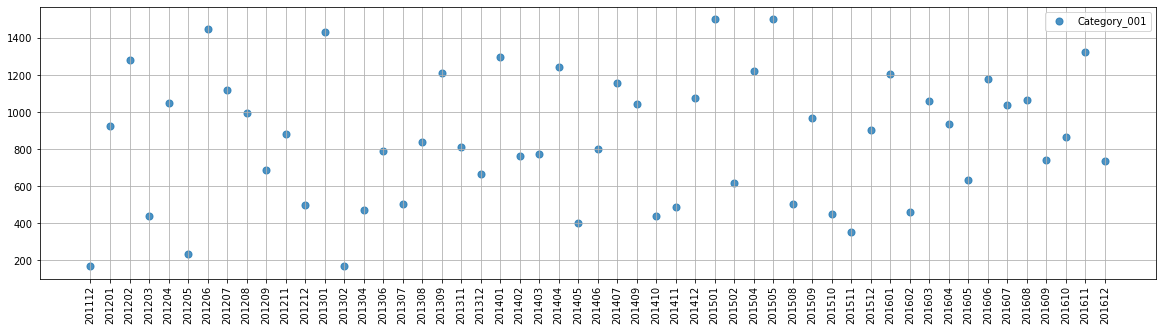

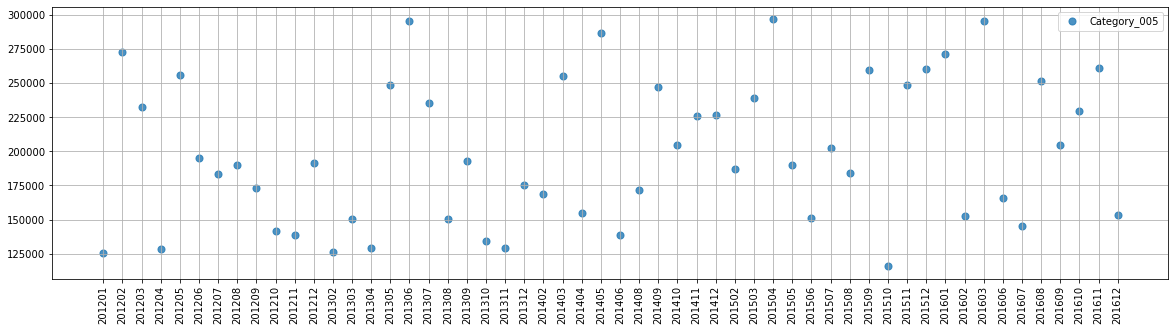

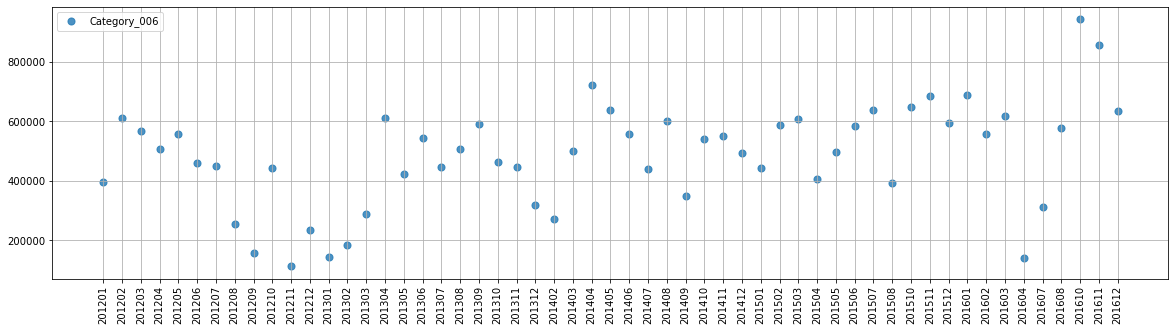

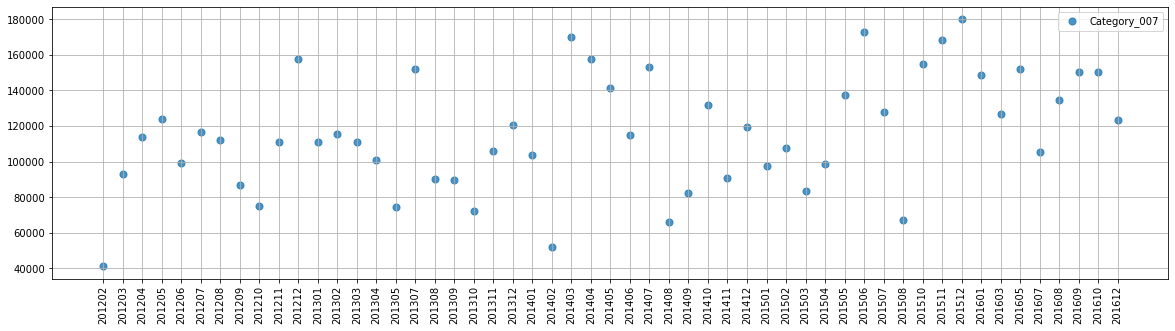

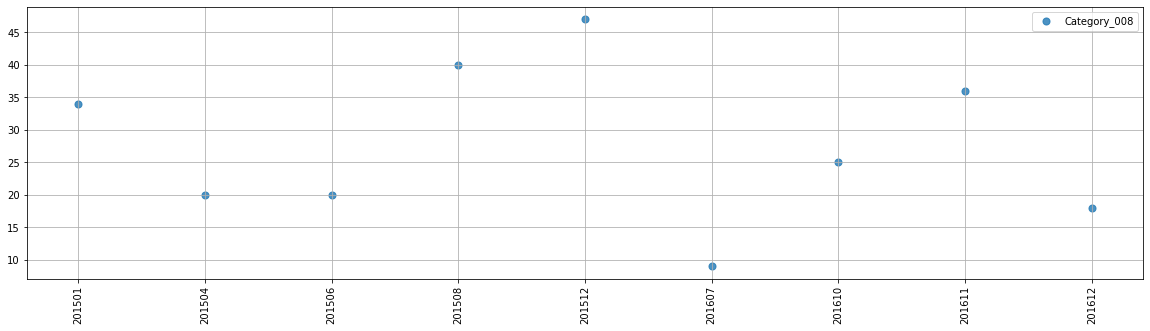

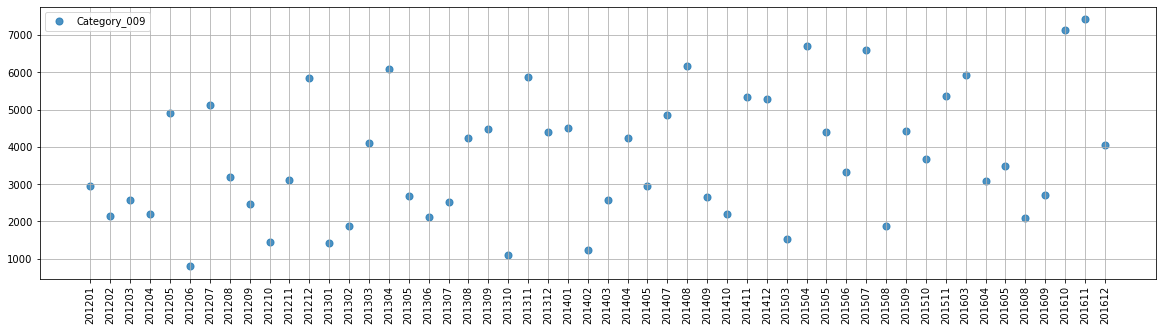

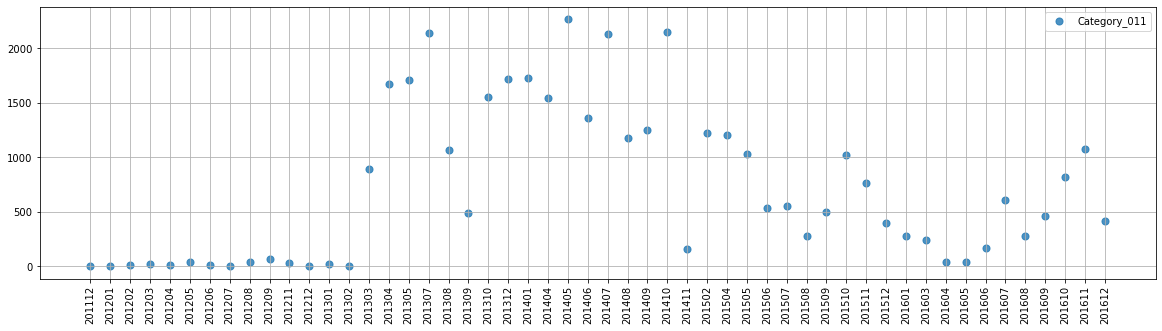

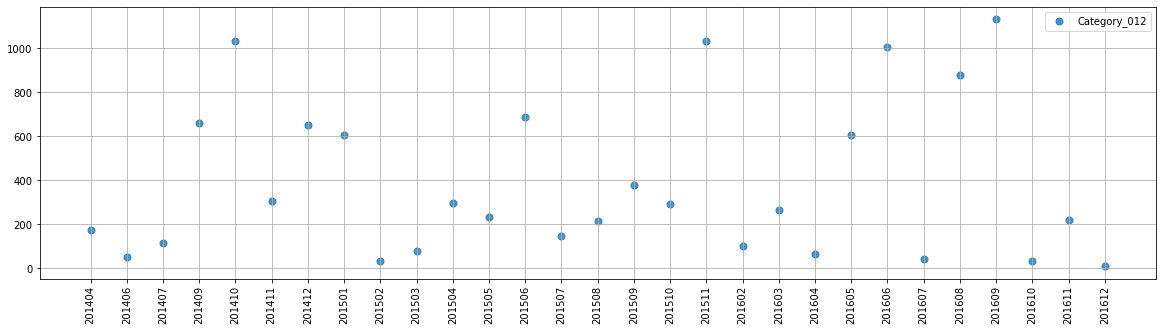

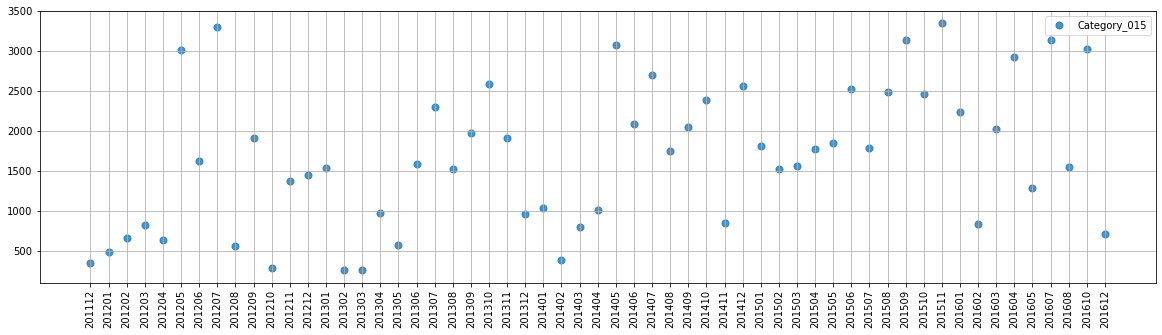

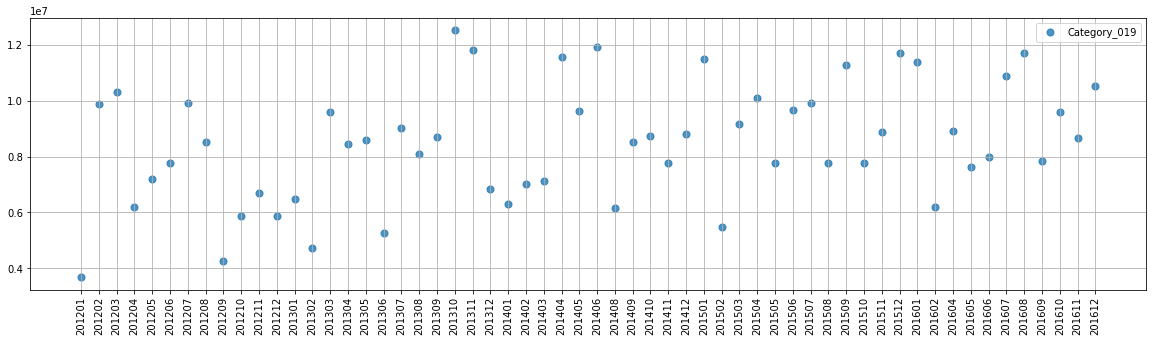

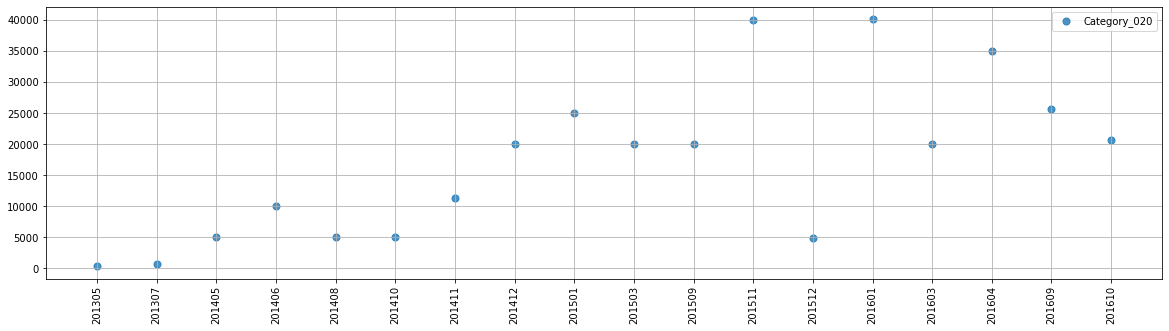

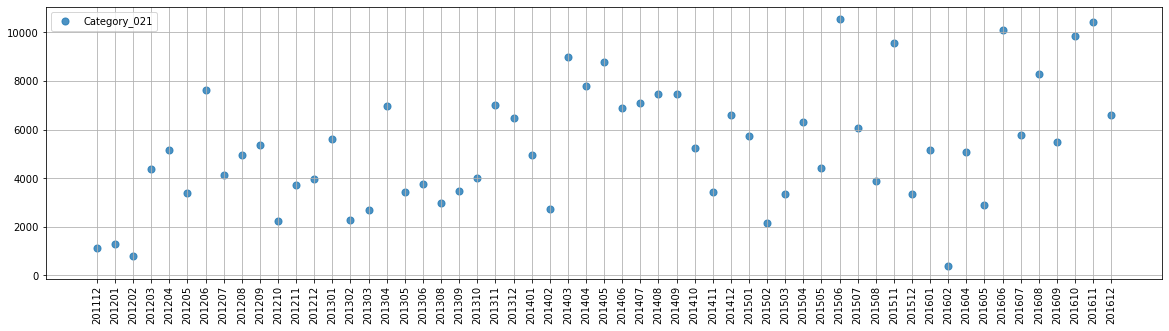

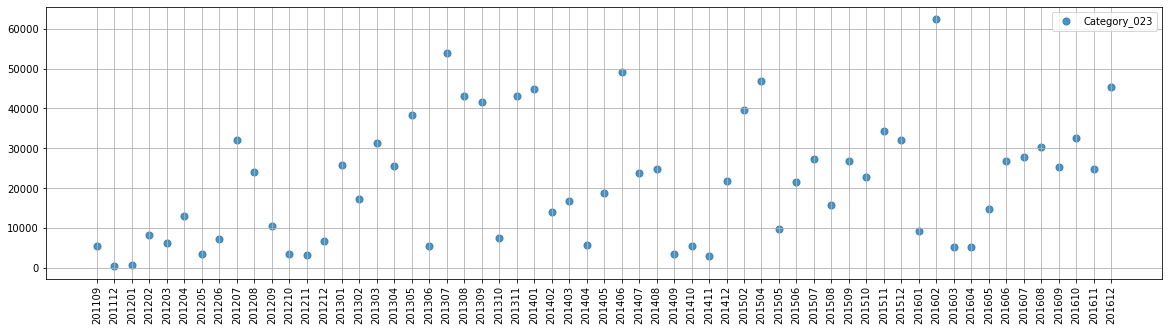

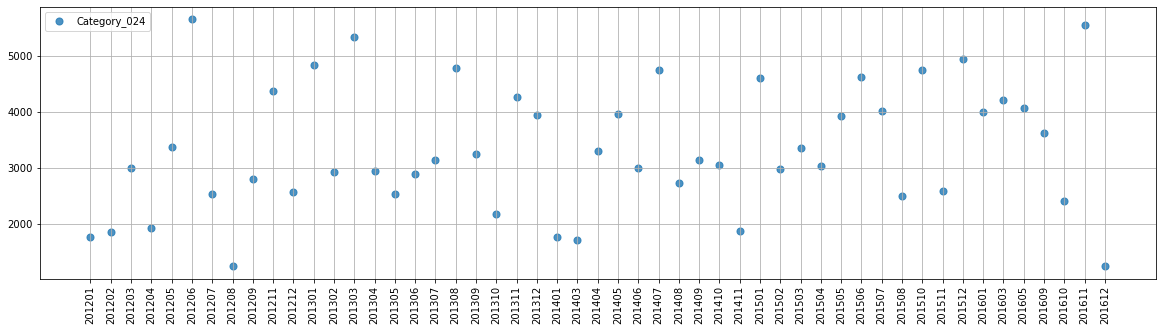

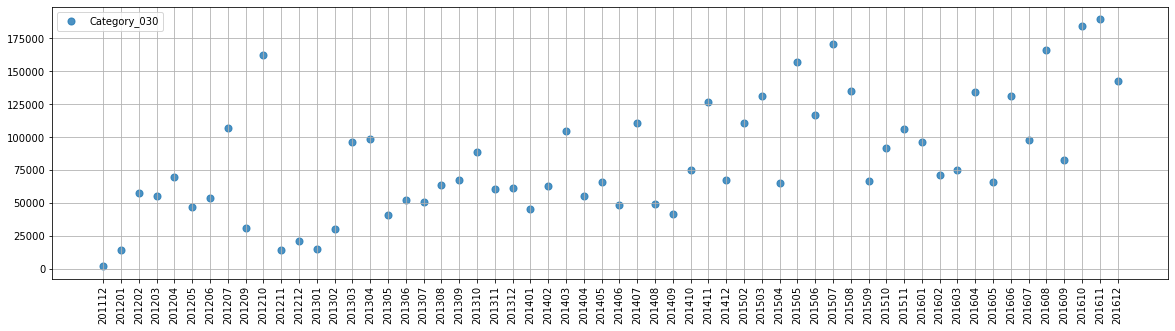

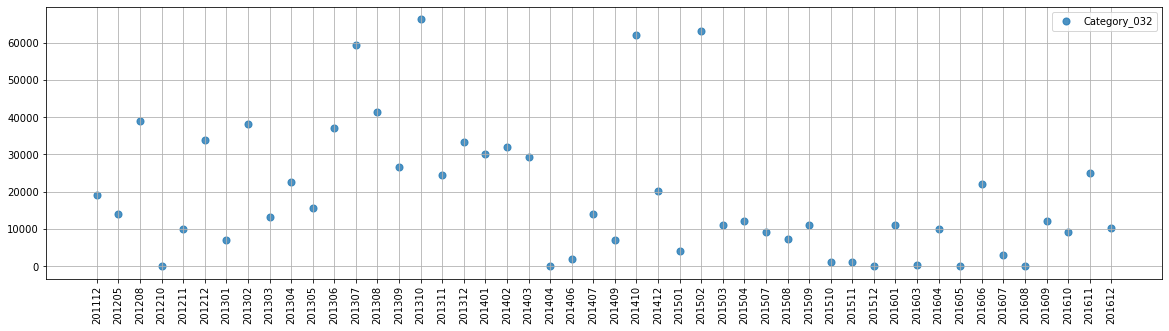

<Figure size 1440x360 with 0 Axes>

In [16]:
categories = df.Product_Category.unique()
region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict
    
for region, category_obj  in region_dict.items():
    print(region)
    for name, obj in category_obj.items():
        plt.scatter(x=obj.md_Date, y=obj.Order_Demand, s=50,label=name, alpha=0.8)
        plt.legend()
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.show()  
plt.savefig("figure.png")

In [17]:
df.to_csv('a131.csv')

In [18]:
cols = list(df.columns)

In [19]:
for col in cols:
    col_zscore = col + '_zscore'
    df['col_zscore'] = (df['Order_Demand'] - df['Order_Demand'].mean())/df['Order_Demand'].std(ddof=0)
df

Product_Category    Date Customer_Region  Order_Demand md_Date  \
3824     Category_023  201109            west          5450  201109   
1686     Category_011  201110           south             2  201110   
4320     Category_028  201111            east         26250  201111   
4597     Category_030  201112            west          2000  201112   
3236     Category_021  201112            west          1130  201112   
...               ...     ...             ...           ...     ...   
4169     Category_026  201612           south           418  201612   
3477     Category_022  201612            east           834  201612   
1052     Category_007  201612            west        123572  201612   
3112     Category_020  201701           south           200  201701   
1968     Category_012  201701           south            70  201701   

      col_zscore  
3824   -0.195949  
1686   -0.196938  
4320   -0.192171  
4597   -0.196575  
3236   -0.196733  
...          ...  
4169   -0.196863  
3477   -0.196787  
1052   -0.174496  
3112   -0.196902  
1968   -0.196926  

[4497 rows x 6 columns]

In [20]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
label = l.fit_transform(df["Product_Category"])

In [21]:
df["Category"]=label

In [22]:
categories_num = df.Category.unique()
categories_num=np.sort(categories_num)
categories_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [23]:
categories=np.sort(categories)
categories


array(['Category_001', 'Category_002', 'Category_003', 'Category_004',
       'Category_005', 'Category_006', 'Category_007', 'Category_008',
       'Category_009', 'Category_010', 'Category_011', 'Category_012',
       'Category_013', 'Category_014', 'Category_015', 'Category_016',
       'Category_017', 'Category_018', 'Category_019', 'Category_020',
       'Category_021', 'Category_022', 'Category_023', 'Category_024',
       'Category_025', 'Category_026', 'Category_027', 'Category_028',
       'Category_029', 'Category_030', 'Category_031', 'Category_032',
       'Category_033'], dtype=object)

In [24]:
res = dict(zip(categories,categories_num))
res

{'Category_001': 0,
 'Category_002': 1,
 'Category_003': 2,
 'Category_004': 3,
 'Category_005': 4,
 'Category_006': 5,
 'Category_007': 6,
 'Category_008': 7,
 'Category_009': 8,
 'Category_010': 9,
 'Category_011': 10,
 'Category_012': 11,
 'Category_013': 12,
 'Category_014': 13,
 'Category_015': 14,
 'Category_016': 15,
 'Category_017': 16,
 'Category_018': 17,
 'Category_019': 18,
 'Category_020': 19,
 'Category_021': 20,
 'Category_022': 21,
 'Category_023': 22,
 'Category_024': 23,
 'Category_025': 24,
 'Category_026': 25,
 'Category_027': 26,
 'Category_028': 27,
 'Category_029': 28,
 'Category_030': 29,
 'Category_031': 30,
 'Category_032': 31,
 'Category_033': 32}

In [25]:
df["map_Category"] = df["Product_Category"].map(res)
df


Product_Category    Date Customer_Region  Order_Demand md_Date  \
3824     Category_023  201109            west          5450  201109   
1686     Category_011  201110           south             2  201110   
4320     Category_028  201111            east         26250  201111   
4597     Category_030  201112            west          2000  201112   
3236     Category_021  201112            west          1130  201112   
...               ...     ...             ...           ...     ...   
4169     Category_026  201612           south           418  201612   
3477     Category_022  201612            east           834  201612   
1052     Category_007  201612            west        123572  201612   
3112     Category_020  201701           south           200  201701   
1968     Category_012  201701           south            70  201701   

      col_zscore  Category  map_Category  
3824   -0.195949        22            22  
1686   -0.196938        10            10  
4320   -0.192171        27            27  
4597   -0.196575        29            29  
3236   -0.196733        20            20  
...          ...       ...           ...  
4169   -0.196863        25            25  
3477   -0.196787        21            21  
1052   -0.174496         6             6  
3112   -0.196902        19            19  
1968   -0.196926        11            11  

[4497 rows x 8 columns]

In [26]:
l_=LabelEncoder()
label_ = l_.fit_transform(df["Customer_Region"])
label_


array([3, 2, 0, ..., 3, 2, 2])

In [27]:
df["region"]=label_

In [28]:
region_num = df.region.unique()
region_num=np.sort(region_num)
region_num

array([0, 1, 2, 3])

In [29]:
regions_=df.Customer_Region.unique()
regions_

array(['west', 'south', 'east', 'north'], dtype=object)

In [30]:
res_ = dict(zip(regions_,region_num))
res_

{'west': 0, 'south': 1, 'east': 2, 'north': 3}

In [31]:
df["num_Region"] = df["Customer_Region"].map(res_)
df

Product_Category    Date Customer_Region  Order_Demand md_Date  \
3824     Category_023  201109            west          5450  201109   
1686     Category_011  201110           south             2  201110   
4320     Category_028  201111            east         26250  201111   
4597     Category_030  201112            west          2000  201112   
3236     Category_021  201112            west          1130  201112   
...               ...     ...             ...           ...     ...   
4169     Category_026  201612           south           418  201612   
3477     Category_022  201612            east           834  201612   
1052     Category_007  201612            west        123572  201612   
3112     Category_020  201701           south           200  201701   
1968     Category_012  201701           south            70  201701   

      col_zscore  Category  map_Category  region  num_Region  
3824   -0.195949        22            22       3           0  
1686   -0.196938        10            10       2           1  
4320   -0.192171        27            27       0           2  
4597   -0.196575        29            29       3           0  
3236   -0.196733        20            20       3           0  
...          ...       ...           ...     ...         ...  
4169   -0.196863        25            25       2           1  
3477   -0.196787        21            21       0           2  
1052   -0.174496         6             6       3           0  
3112   -0.196902        19            19       2           1  
1968   -0.196926        11            11       2           1  

[4497 rows x 10 columns]

In [32]:
df=df.set_index('Date')
df.sort_values(by=['Date'], inplace=True, ascending=True)
df

Product_Category Customer_Region  Order_Demand md_Date  col_zscore  \
Date                                                                        
201109     Category_023            west          5450  201109   -0.195949   
201110     Category_011           south             2  201110   -0.196938   
201111     Category_028            east         26250  201111   -0.192171   
201112     Category_018           north             1  201112   -0.196938   
201112     Category_015           north            25  201112   -0.196934   
...                 ...             ...           ...     ...         ...   
201612     Category_033           north        840000  201612   -0.044380   
201612     Category_021            east         22142  201612   -0.192917   
201612     Category_007            east         38069  201612   -0.190024   
201701     Category_020           south           200  201701   -0.196902   
201701     Category_012           south            70  201701   -0.196926   

        Category  map_Category  region  num_Region  
Date                                                
201109        22            22       3           0  
201110        10            10       2           1  
201111        27            27       0           2  
201112        17            17       1           3  
201112        14            14       1           3  
...          ...           ...     ...         ...  
201612        32            32       1           3  
201612        20            20       0           2  
201612         6             6       0           2  
201701        19            19       2           1  
201701        11            11       2           1  

[4497 rows x 9 columns]

In [33]:
df.columns

Index(['Product_Category', 'Customer_Region', 'Order_Demand', 'md_Date',
       'col_zscore', 'Category', 'map_Category', 'region', 'num_Region'],
      dtype='object')

In [34]:
x_new = df[['map_Category', 'num_Region','Order_Demand','md_Date']]
x_new

map_Category  num_Region  Order_Demand md_Date
Date                                                  
201109            22           0          5450  201109
201110            10           1             2  201110
201111            27           2         26250  201111
201112            17           3             1  201112
201112            14           3            25  201112
...              ...         ...           ...     ...
201612            32           3        840000  201612
201612            20           2         22142  201612
201612             6           2         38069  201612
201701            19           1           200  201701
201701            11           1            70  201701

[4497 rows x 4 columns]

In [35]:
split_date = '201611'
data_train = x_new.loc[x_new.index <= split_date].copy()
data_test = x_new.loc[x_new.index > split_date].copy()

In [36]:
data_train= pd.DataFrame(data=data_train)

In [37]:
X_train = data_train[['map_Category', 'num_Region','md_Date']]
y_train = data_train[['Order_Demand']]
X_test = data_test[['map_Category', 'num_Region','md_Date']]
y_test = data_test[['Order_Demand']]

In [38]:
data_test

map_Category  num_Region  Order_Demand md_Date
Date                                                  
201612            25           2          1585  201612
201612            19           1           200  201612
201612            16           3            45  201612
201612            26           2             6  201612
201612             4           0        153400  201612
...              ...         ...           ...     ...
201612            32           3        840000  201612
201612            20           2         22142  201612
201612             6           2         38069  201612
201701            19           1           200  201701
201701            11           1            70  201701

[80 rows x 4 columns]

**USING DECISION TREE REGRESSOR PREDICTION ON TEST DATASET USING HYPERPARAMETER TUNING**

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [40]:
def bestparam_randCV(model,hyperparam,x_train, y_train, n_iter=1000):
    
    hyperparam = hyperparam
    randomizedCV = RandomizedSearchCV(model, param_distributions = hyperparam, cv = 10,
                                          n_iter = n_iter, scoring = 'neg_mean_squared_error', n_jobs=-1, 
                                          random_state = 42, verbose = True)
    randomizedCV.fit(x_train, y_train)
    

    print ('Best MSE', randomizedCV.score(x_train, y_train))
    print ('Best Param', randomizedCV.best_params_)
    return randomizedCV

In [41]:

reg         = DecisionTreeRegressor()             

hyperparam =  {'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]}
 
n_iter     = 100
best_dt1   = bestparam_randCV(reg, hyperparam, X_train, y_train, n_iter)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.3s finished


Best MSE -210334521266.02863
Best Param {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70}


In [42]:
dt1 = DecisionTreeRegressor(
                        max_features      = best_dt1.best_params_.get('max_features'),
                        max_depth         = best_dt1.best_params_.get('max_depth'),
                        min_samples_split = best_dt1.best_params_.get('min_samples_split'),
                        min_samples_leaf  = best_dt1.best_params_.get('min_samples_leaf'))

result_dt1 = dt1.fit(X_train, y_train)

In [43]:
data_test['SCORE_Prediction_DST_HT'] = result_dt1.predict(X_test).astype(int)


In [44]:
AA=r2_score(y_test['Order_Demand'],data_test['SCORE_Prediction_DST_HT'])
print("ACCURACY OF MODEL FOR PREDICTION OF TEST DATA USING DST HYPER TUNING USING RANDOMIZED SEARCH:{}".format(AA))

ACCURACY OF MODEL FOR PREDICTION OF TEST DATA USING DST HYPER TUNING USING RANDOMIZED SEARCH:0.9999990722462679


In [45]:
data_test

map_Category  num_Region  Order_Demand md_Date  \
Date                                                     
201612            25           2          1585  201612   
201612            19           1           200  201612   
201612            16           3            45  201612   
201612            26           2             6  201612   
201612             4           0        153400  201612   
...              ...         ...           ...     ...   
201612            32           3        840000  201612   
201612            20           2         22142  201612   
201612             6           2         38069  201612   
201701            19           1           200  201701   
201701            11           1            70  201701   

        SCORE_Prediction_DST_HT  
Date                             
201612                     1067  
201612                     1030  
201612                       22  
201612                        7  
201612                   209683  
...                         ...  
201612                   762500  
201612                    23682  
201612                    48875  
201701                     1030  
201701                      221  

[80 rows x 5 columns]

In [47]:
new_date=input("ENTER DATE IN DDDDMM\t")
r_=input("ENTER REGION\t")
c_=input("ENTER CATRGORY\t")
r=res_.get(r_)
c=res.get(c_)
region_dict = dict()
regions = data_test.groupby('num_Region')

for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('map_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict


for region, category_obj in region_dict.items():
  if r==region:
    for name, obj in category_obj.items():
      if c==name:
        d5=obj.loc[obj.index==new_date]
d5=d5[['Order_Demand','SCORE_Prediction_DST_HT']]
d5

ENTER DATE IN DDDDMM	201701
ENTER REGION	south
ENTER CATRGORY	Category_012


Order_Demand  SCORE_Prediction_DST_HT
Date                                         
201701            70                      221

USING DECISION TREE REGRESSOR PREDICTION ON TEST DATASET

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtree2 = DecisionTreeRegressor(max_depth=6)
dtree2.fit(X_train, y_train)

data_test["DST_TWO_TEST"] = dtree2.predict(X_test).astype('int64')


In [49]:
from sklearn.metrics import r2_score

print(r2_score(y_test['Order_Demand'],data_test["DST_TWO_TEST"]))



0.9807504508681326


In [50]:
data_test

map_Category  num_Region  Order_Demand md_Date  \
Date                                                     
201612            25           2          1585  201612   
201612            19           1           200  201612   
201612            16           3            45  201612   
201612            26           2             6  201612   
201612             4           0        153400  201612   
...              ...         ...           ...     ...   
201612            32           3        840000  201612   
201612            20           2         22142  201612   
201612             6           2         38069  201612   
201701            19           1           200  201701   
201701            11           1            70  201701   

        SCORE_Prediction_DST_HT  DST_TWO_TEST  
Date                                           
201612                     1067          2538  
201612                     1030         24076  
201612                       22            22  
201612                        7          2538  
201612                   209683        557007  
...                         ...           ...  
201612                   762500        736000  
201612                    23682         24076  
201612                    48875        112710  
201701                     1030         24076  
201701                      221           328  

[80 rows x 6 columns]

In [52]:
new_date=input("ENTER DATE IN DDDDMM\t")
r_=input("ENTER REGION\t")
c_=input("ENTER CATRGORY\t")
r=res_.get(r_)
c=res.get(c_)
region_dict = dict()
regions = data_test.groupby('num_Region')

for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('map_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict


for region, category_obj in region_dict.items():
  if r==region:
    for name, obj in category_obj.items():
      if c==name:
        d41=obj.loc[obj.index==new_date]
d41=d41[['Order_Demand','DST_TWO_TEST']]
d41

ENTER DATE IN DDDDMM	201701
ENTER REGION	south
ENTER CATRGORY	Category_012


Order_Demand  DST_TWO_TEST
Date                              
201701            70           328

USING RANDOM FOREST REGRESSOR PREDICTION ON TEST DATASET

In [53]:
#RF model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_rf = RandomForestRegressor(n_estimators=5000, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
a=r2_score(y_train, pred_train_rf)
print(a)
data_test['RFR_PREDICTION'] = model_rf.predict(X_test).astype('int64')
ACCURACY=r2_score(y_test['Order_Demand'],data_test['RFR_PREDICTION'])
print("ACCURACY OF MODEL FOR PREDICTION OF TEST DATA USING RANDOM FOREST REGRESSOR:{}".format(ACCURACY))

0.9976878745976485
ACCURACY OF MODEL FOR PREDICTION OF TEST DATA USING RANDOM FOREST REGRESSOR:0.9927434669728891


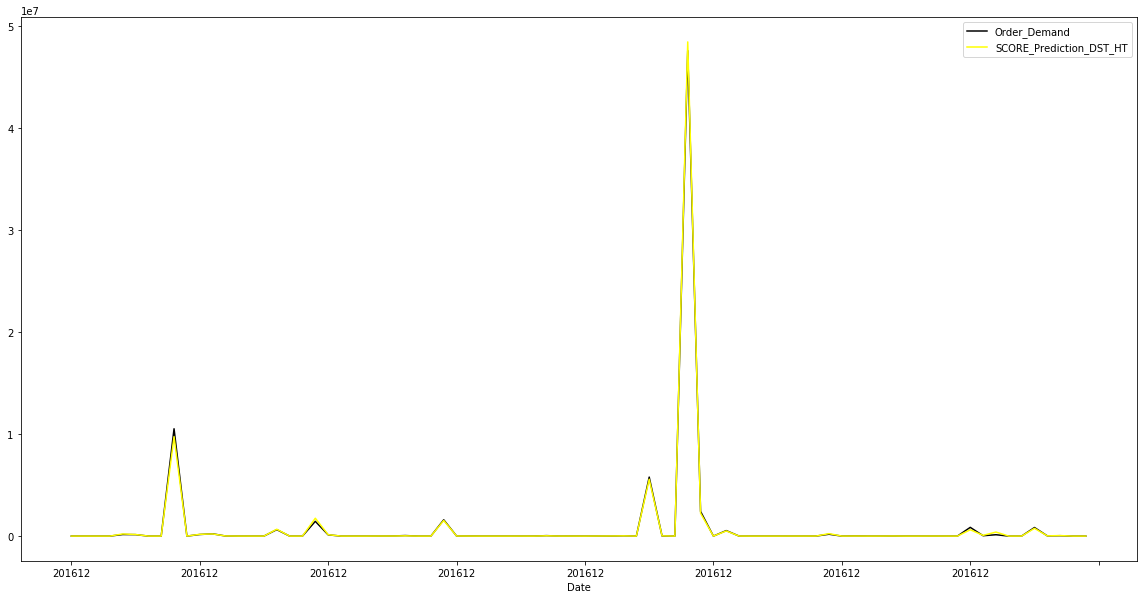

In [130]:
data_test[['Order_Demand','SCORE_Prediction_DST_HT']].plot(figsize=(20, 10),color = ['black', 'yellow'])

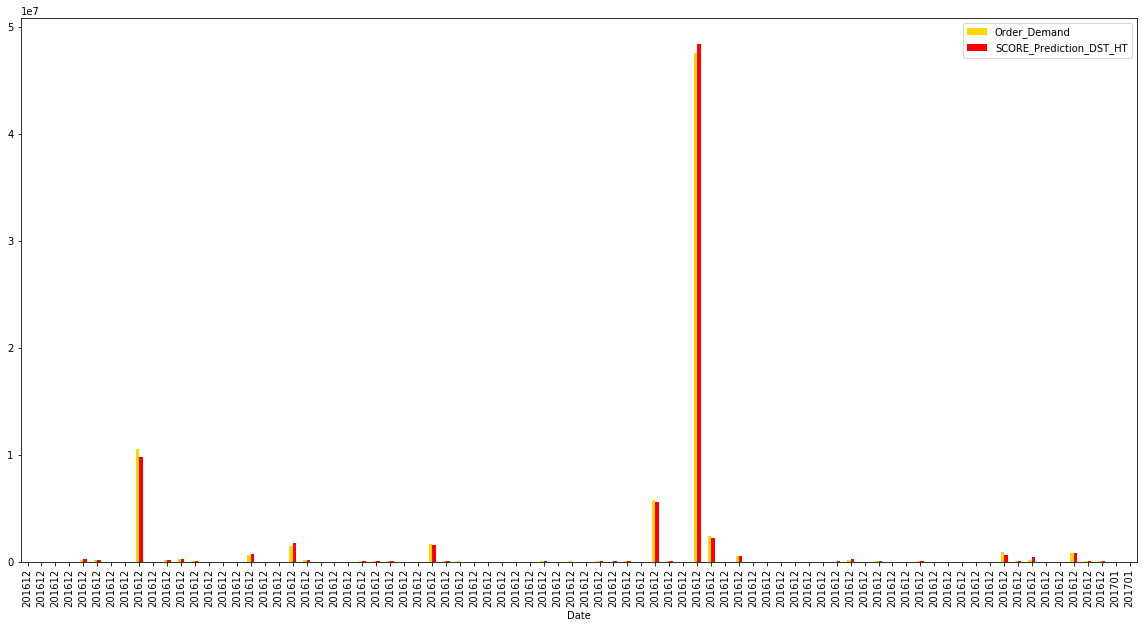

In [113]:
data_test[['Order_Demand','SCORE_Prediction_DST_HT']].plot(figsize=(20, 10),color = ['gold', 'red'],kind='bar')

In [55]:
data_test.to_csv('PREDICTED_DATA.csv')

In [58]:
new_date=input("ENTER DATE IN DDDDMM\t")
r_=input("ENTER REGION\t")
c_=input("ENTER CATRGORY\t")
r=res_.get(r_)
c=res.get(c_)
region_dict = dict()
regions = data_test.groupby('num_Region')

for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('map_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict


for region, category_obj in region_dict.items():
  if r==region:
    for name, obj in category_obj.items():
      if c==name:
        d4=obj.loc[obj.index==new_date]
d4=d4[['Order_Demand','RFR_PREDICTION']]
d4

ENTER DATE IN DDDDMM	201701
ENTER REGION	south
ENTER CATRGORY	Category_012


Order_Demand  RFR_PREDICTION
Date                                
201701            70             295

In [64]:
df_new=data_test
df_new
df_new['map_Category'] =df_new['map_Category'].replace(categories_num,categories)
df_new['num_Region']=df_new['num_Region'].replace(region_num,regions_)
df_new

map_Category num_Region  Order_Demand md_Date  \
Date                                                    
201612  Category_026       east          1585  201612   
201612  Category_020      south           200  201612   
201612  Category_017      north            45  201612   
201612  Category_027       east             6  201612   
201612  Category_005       west        153400  201612   
...              ...        ...           ...     ...   
201612  Category_033      north        840000  201612   
201612  Category_021       east         22142  201612   
201612  Category_007       east         38069  201612   
201701  Category_020      south           200  201701   
201701  Category_012      south            70  201701   

        SCORE_Prediction_DST_HT  DST_TWO_TEST  RFR_PREDICTION  
Date                                                           
201612                     1067          2538            1183  
201612                     1030         24076            1081  
201612                       22            22              24  
201612                        7          2538              12  
201612                   209683        557007          247388  
...                         ...           ...             ...  
201612                   762500        736000          786640  
201612                    23682         24076           22108  
201612                    48875        112710           49003  
201701                     1030         24076            1081  
201701                      221           328             295  

[80 rows x 7 columns]

No handles with labels found to put in legend.


EAST
Category_001


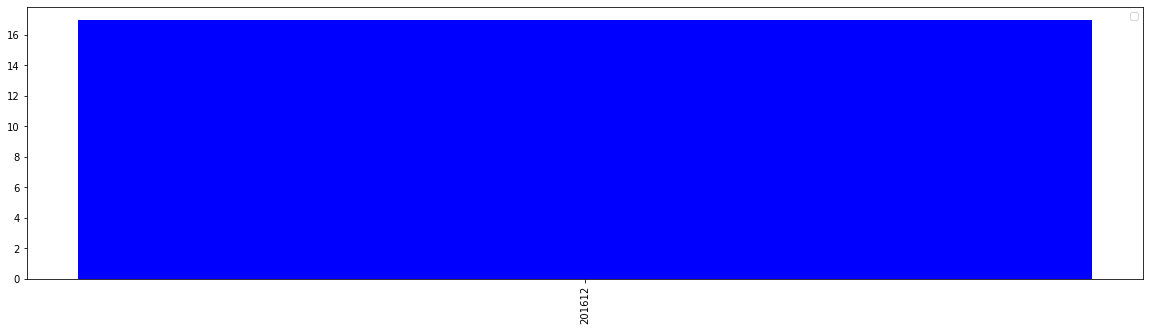

No handles with labels found to put in legend.


Category_003


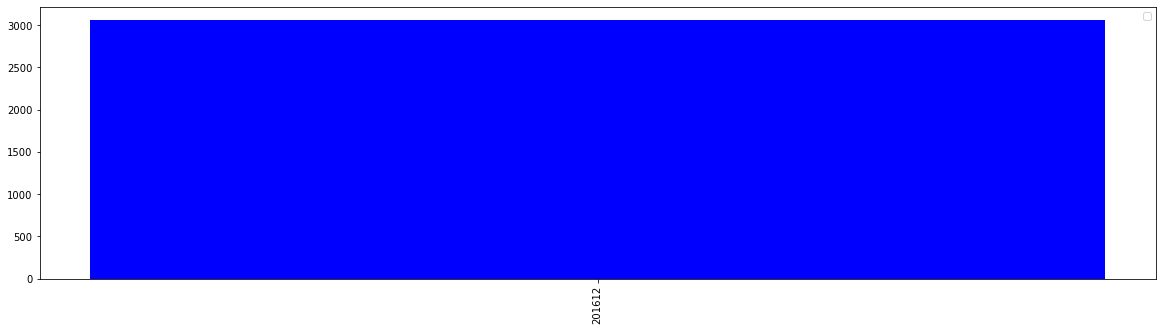

No handles with labels found to put in legend.


Category_006


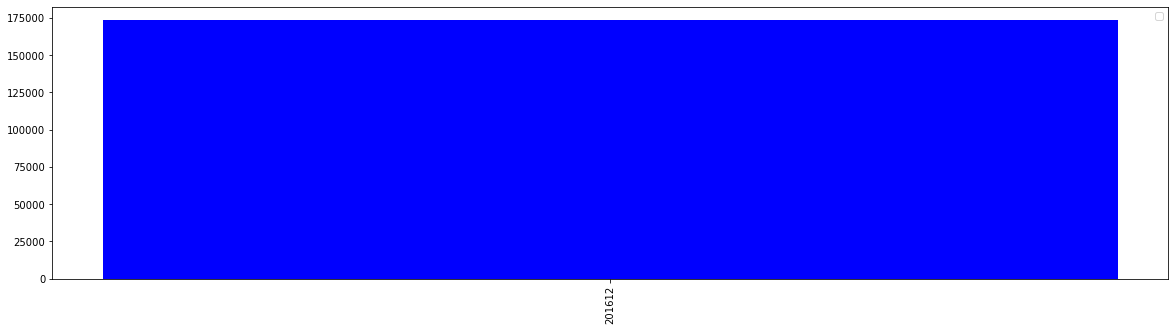

No handles with labels found to put in legend.


Category_007


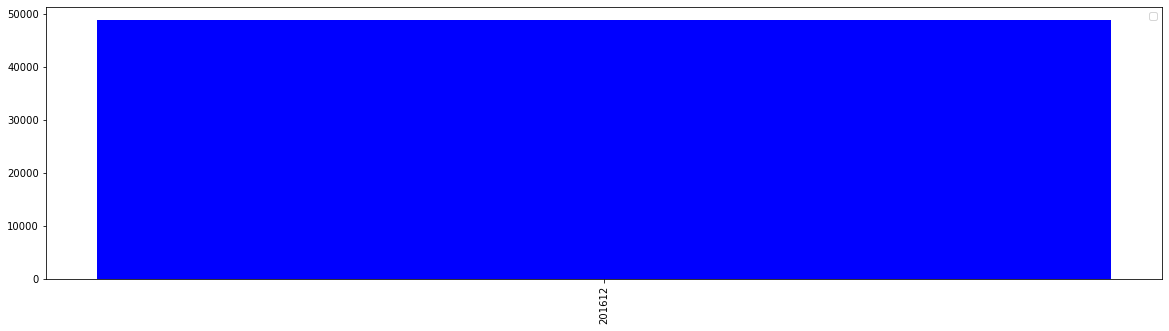

No handles with labels found to put in legend.


Category_008


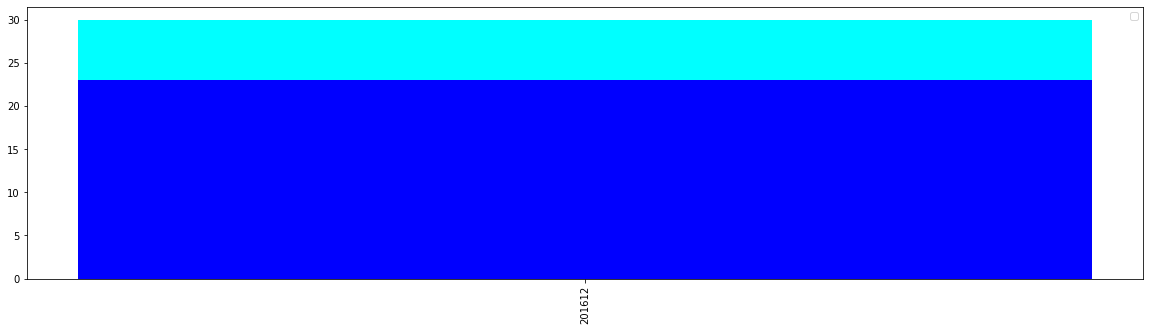

No handles with labels found to put in legend.


Category_009


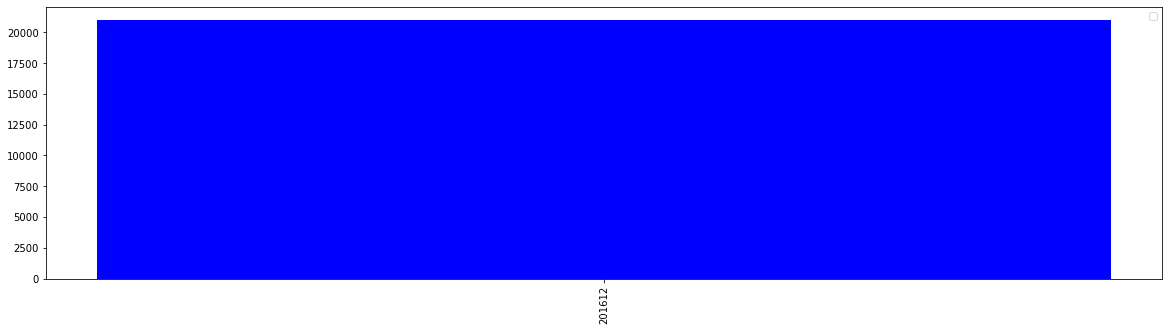

No handles with labels found to put in legend.


Category_010


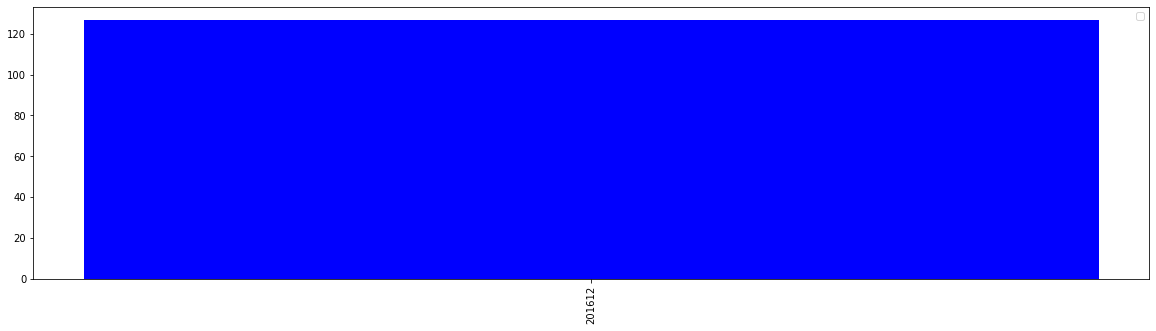

No handles with labels found to put in legend.


Category_011


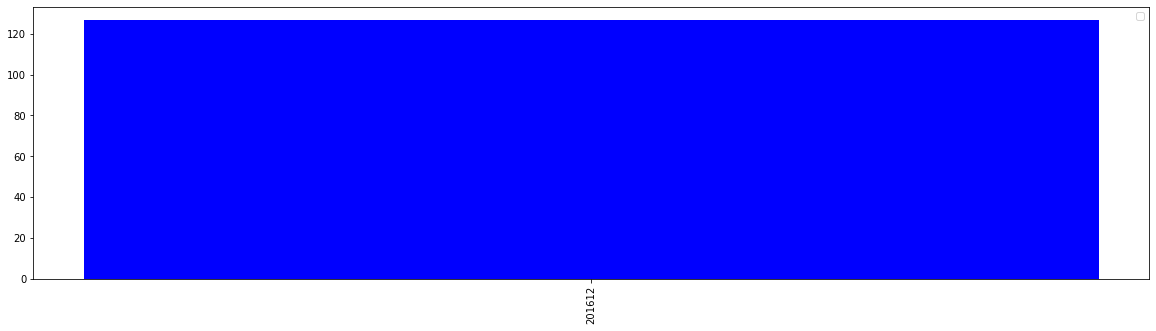

No handles with labels found to put in legend.


Category_012


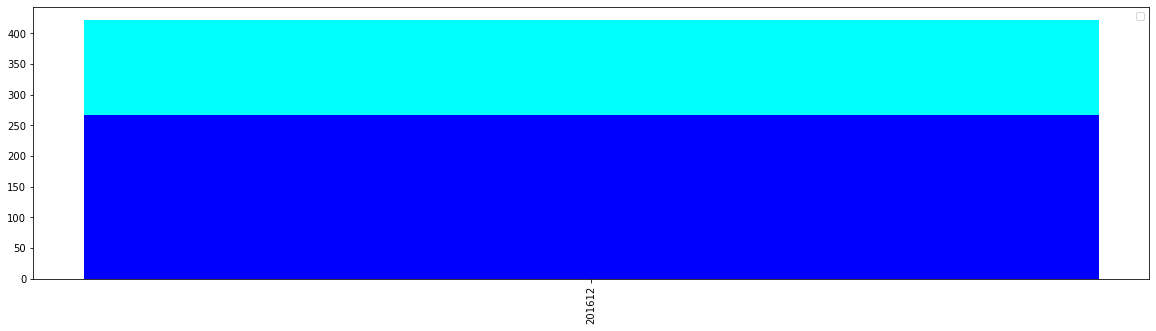

No handles with labels found to put in legend.


Category_013


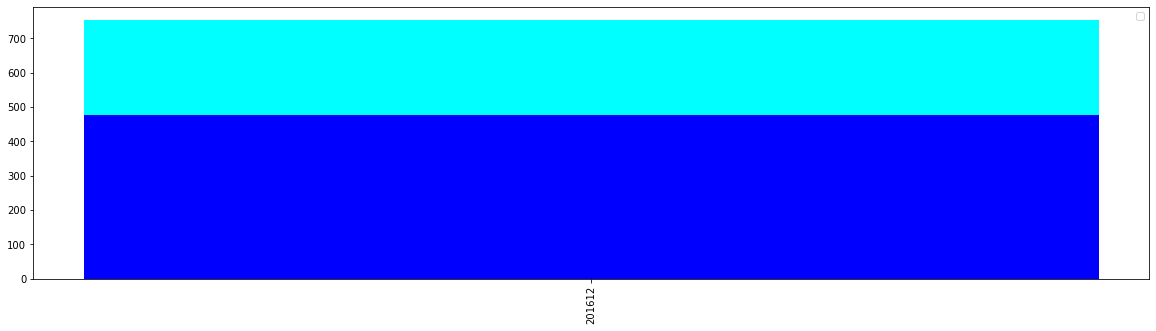

No handles with labels found to put in legend.


Category_015


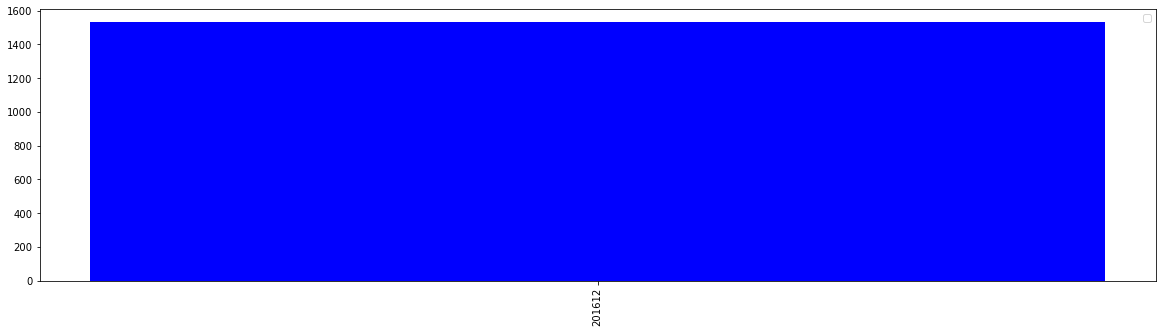

No handles with labels found to put in legend.


Category_017


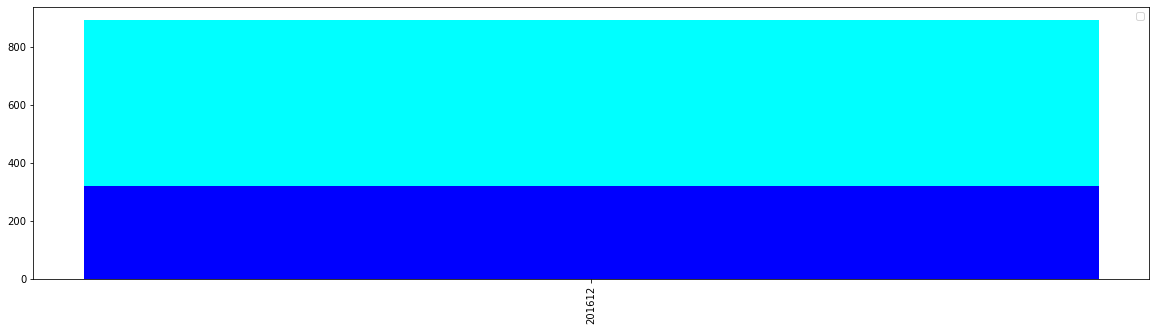

No handles with labels found to put in legend.


Category_018


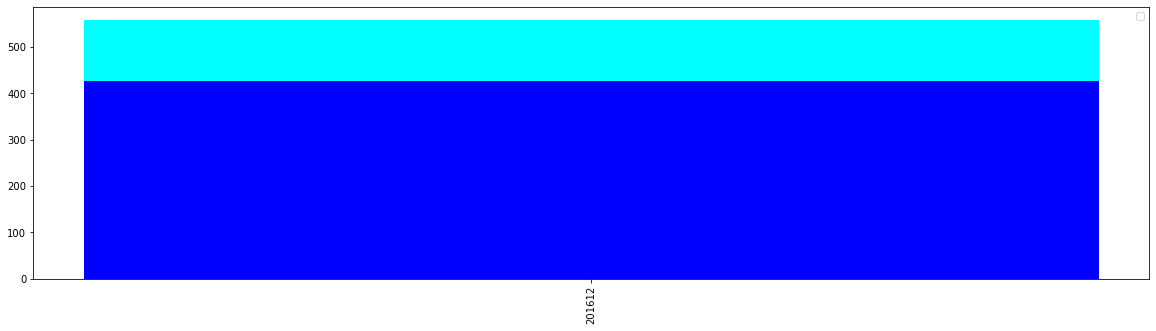

No handles with labels found to put in legend.


Category_019


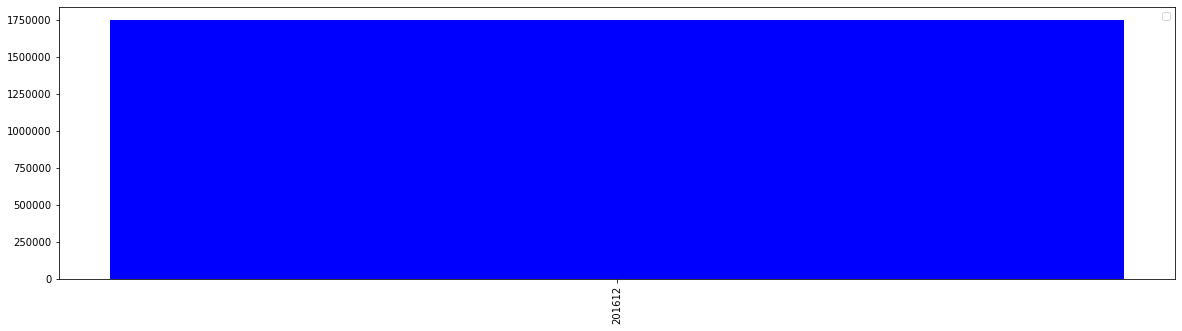

No handles with labels found to put in legend.


Category_021


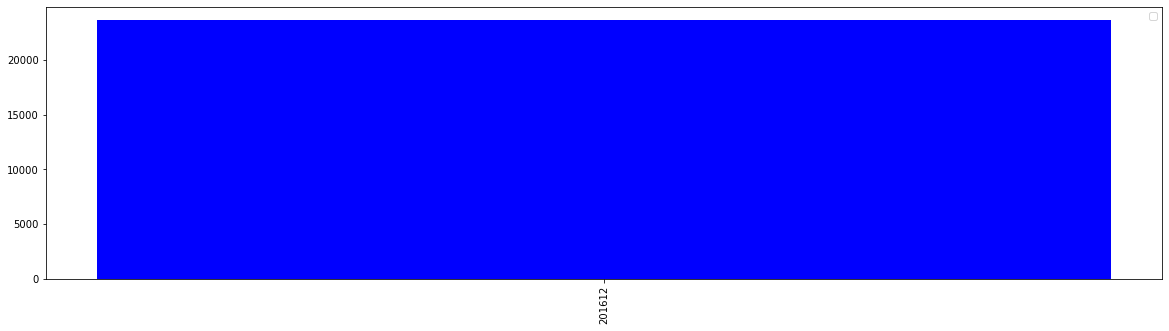

No handles with labels found to put in legend.


Category_022


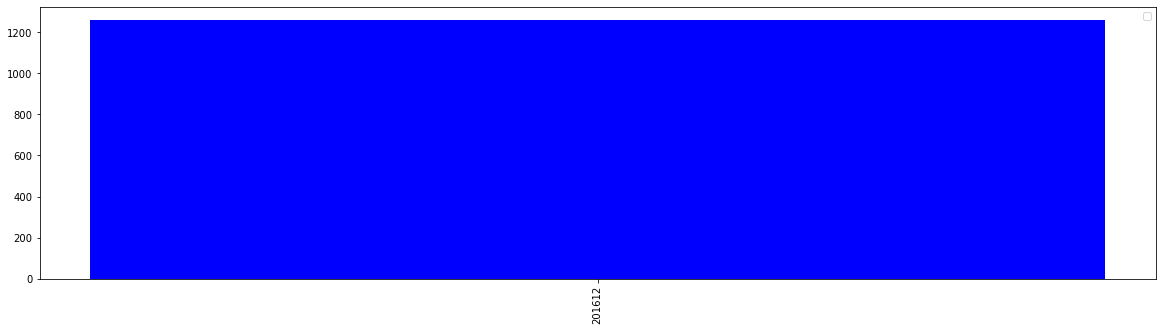

No handles with labels found to put in legend.


Category_023


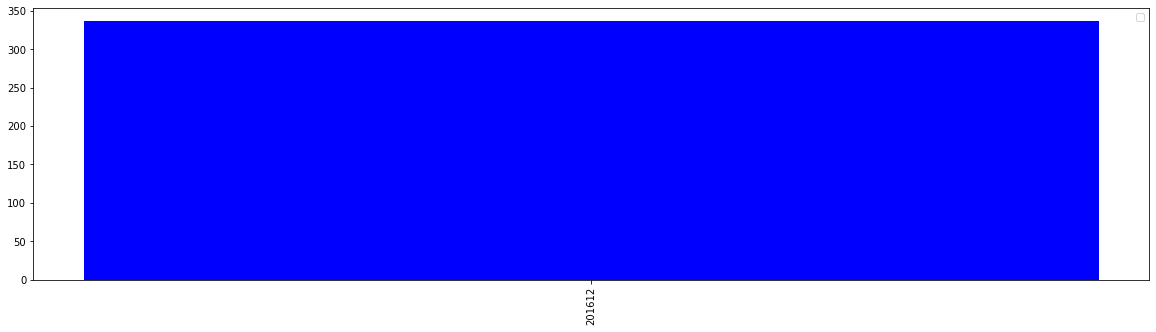

No handles with labels found to put in legend.


Category_024


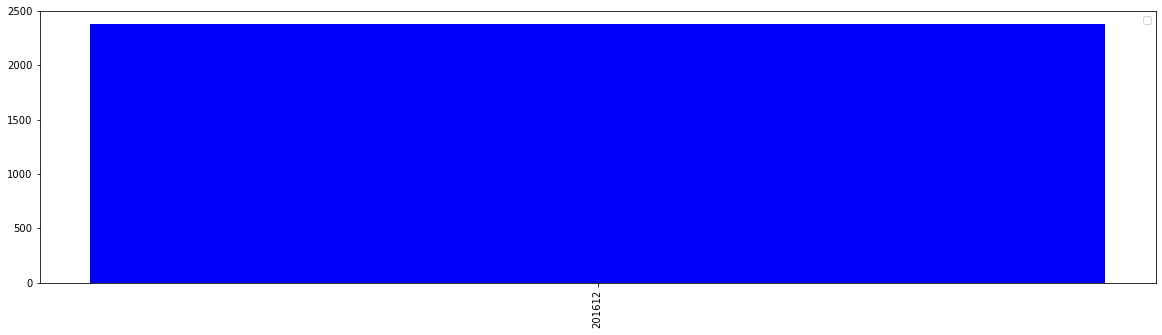

No handles with labels found to put in legend.


Category_026


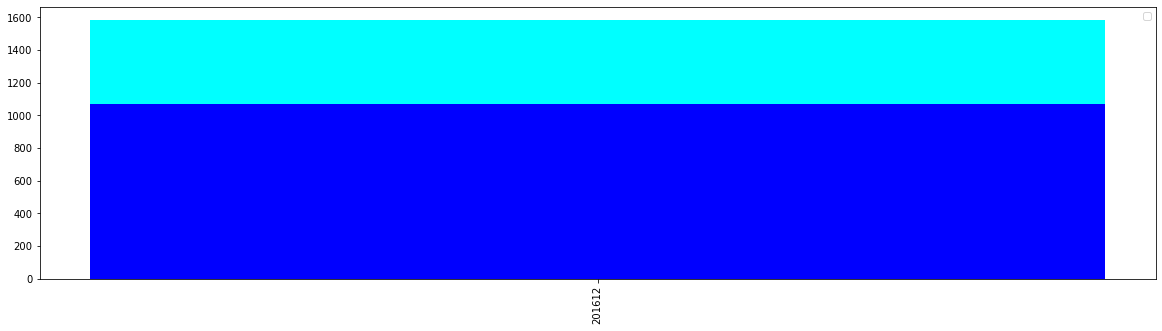

No handles with labels found to put in legend.


Category_027


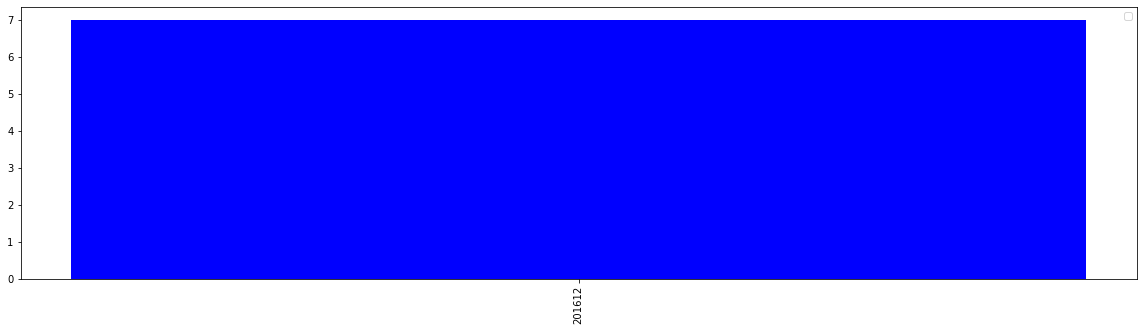

No handles with labels found to put in legend.


Category_028


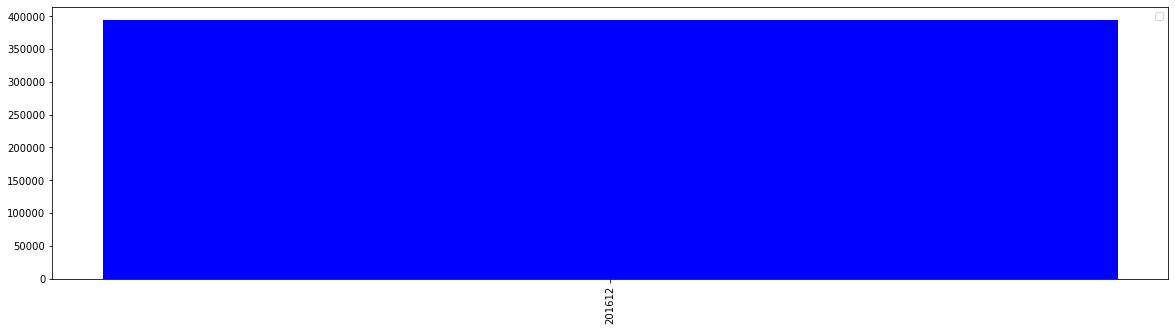

No handles with labels found to put in legend.


Category_029


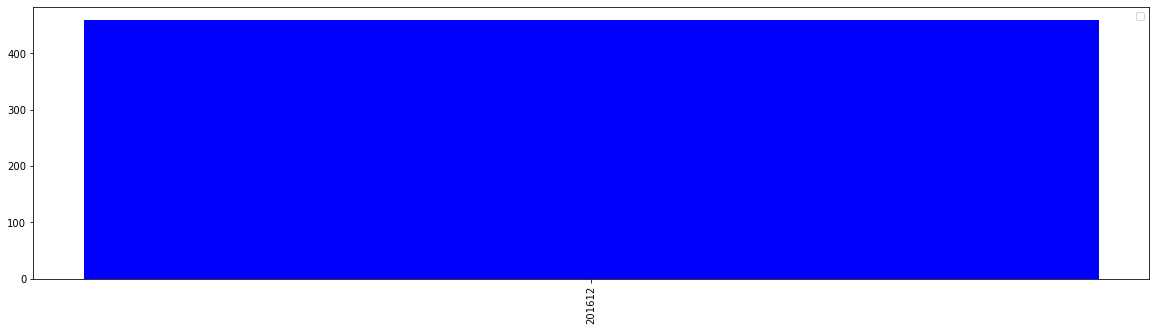

No handles with labels found to put in legend.


Category_031


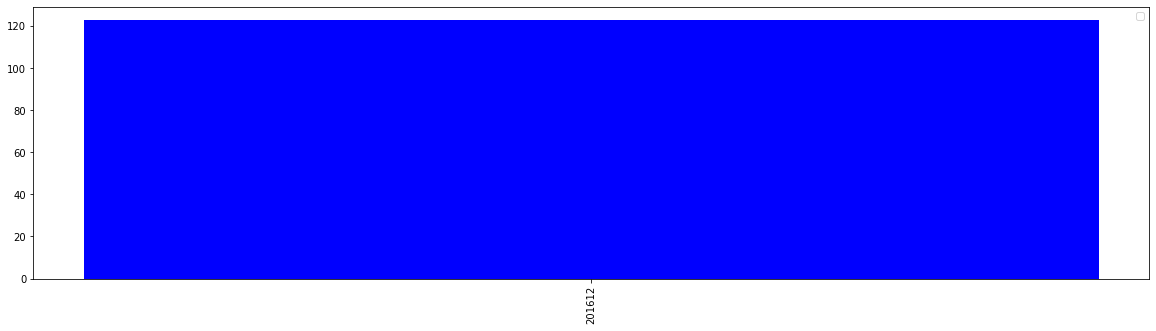

No handles with labels found to put in legend.


NORTH
Category_003


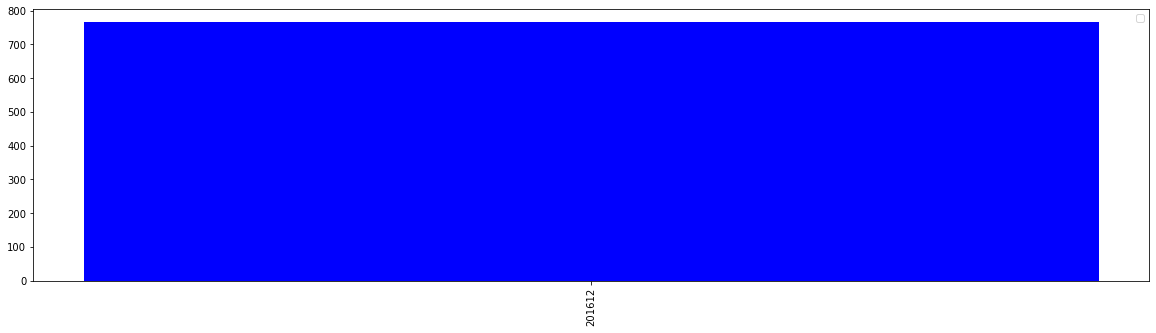

No handles with labels found to put in legend.


Category_005


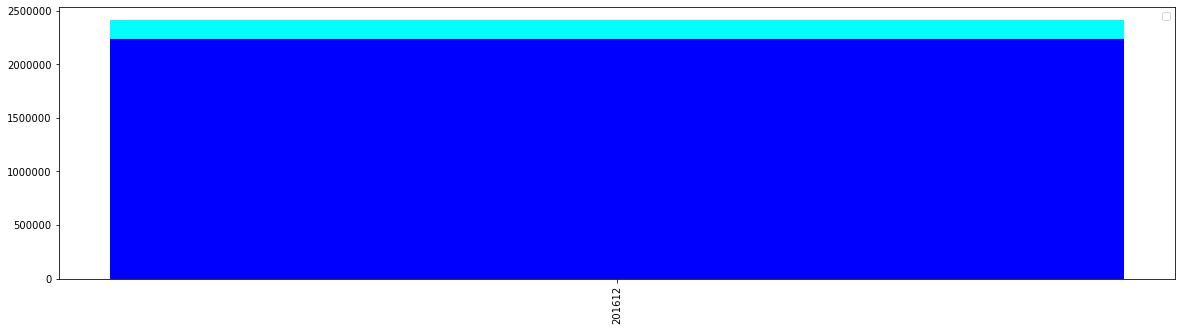

No handles with labels found to put in legend.


Category_006


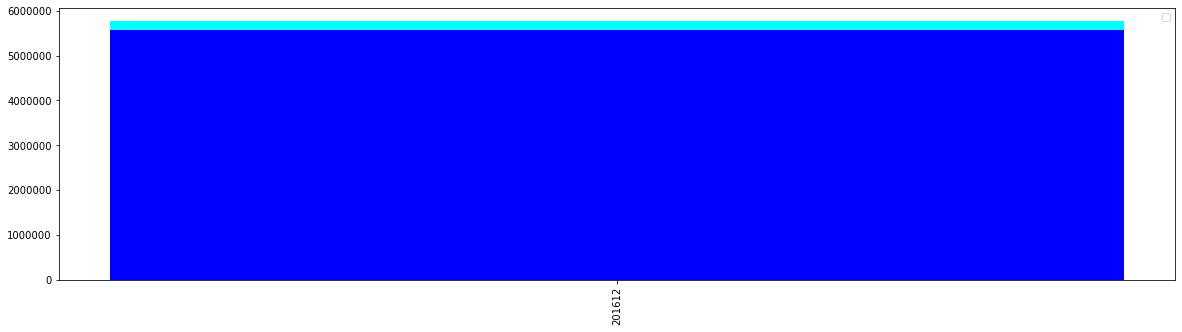

No handles with labels found to put in legend.


Category_007


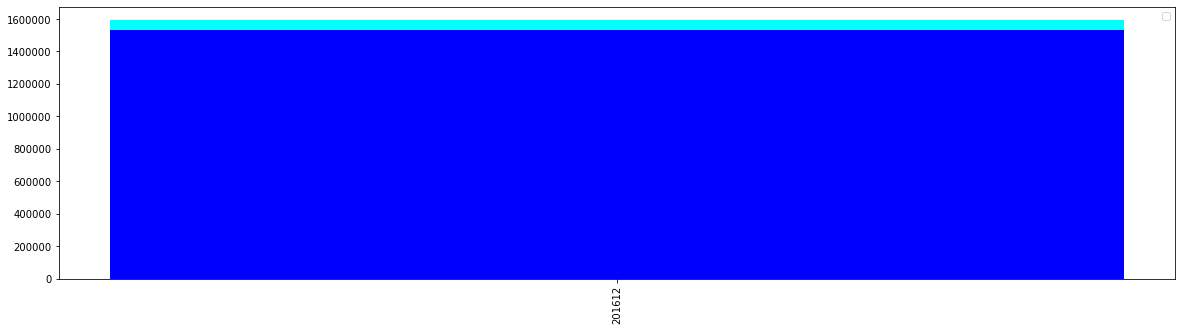

No handles with labels found to put in legend.


Category_008


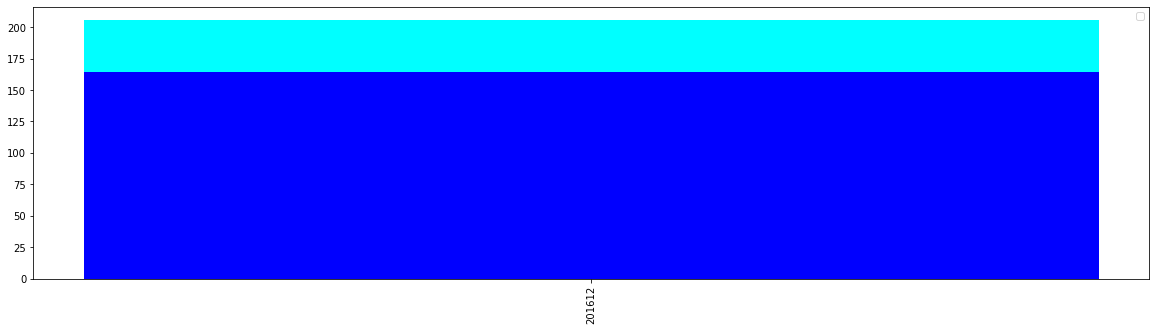

No handles with labels found to put in legend.


Category_009


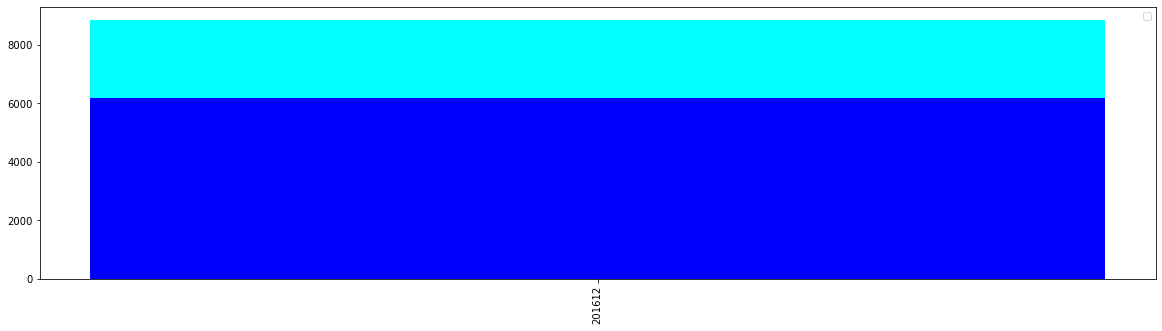

No handles with labels found to put in legend.


Category_010


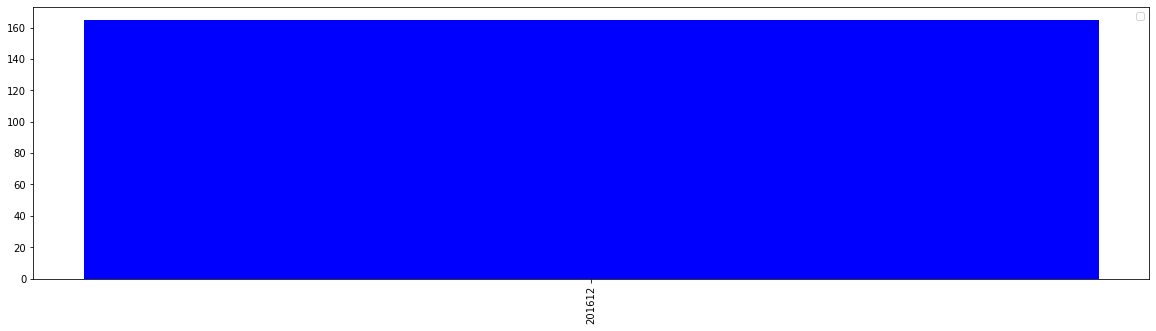

No handles with labels found to put in legend.


Category_012


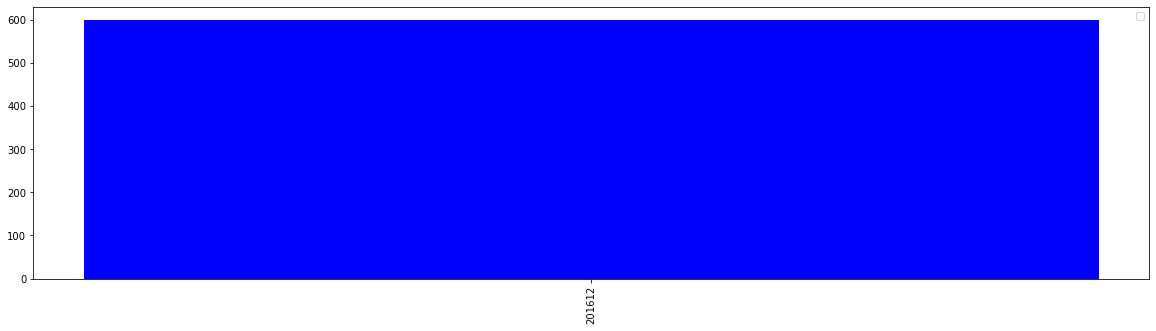

No handles with labels found to put in legend.


In [ ]:
categories = df_new.map_Category.unique()
region_dict = dict()
regions = df_new.groupby('num_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('map_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict
for region, category_obj  in region_dict.items():
    print(region.upper())
    for name, obj in category_obj.items():
        print(name)
        plt.bar(obj.md_Date, obj.Order_Demand, color ='cyan', width = 0.2)
        plt.bar(obj.md_Date, obj.SCORE_Prediction_DST_HT, color ='blue', width = 0.2)
        plt.legend()
        plt.xticks(rotation=90)
   
        plt.show()
        
     